<div style="text-align: center;">
  <h1>TA145 - Redes Neuronales y Aprendizaje Profundo</h1>
  <h2>Trabajo Práctico 2: Perceptrón, MLPs, RBM, CNNs y Autoencoders</h2>
</div>

---
---

<div style="text-align: left;">
  <h2><b>Introducción</b></h3>
</div>


&ensp; En este trabajo se abordan distintos modelos de redes neuronales artificiales con el objetivo de comprender cómo aprenden, qué tipo de problemas pueden resolver y cuáles son sus límites prácticos. El estudio recorre un camino progresivo: desde arquitecturas lineales y sencillas, como el perceptrón simple y los perceptrones multicapa (MLPs), hasta modelos no supervisados y de mayor complejidad, como los *autoencoders*, las máquinas restringidas de Boltzmann (RBMs) y las redes convolucionales (CNNs). Esta diversidad permite analizar no solo distintas estrategias de aprendizaje, sino también diferentes formas de representar la información y generalizar sobre datos reales.

&ensp; A nivel experimental, se evalúan tareas concretas que ponen a prueba las capacidades de cada modelo: la resolución de funciones lógicas, la aproximación de funciones continuas, la clasificación de imágenes y la generación de representaciones latentes. Además, se analizan aspectos claves del entrenamiento como la evolución del error, la influencia del tamaño del *minibatch*, la capacidad de almacenamiento, la reconstrucción de patrones y el impacto de la arquitectura sobre el desempeño final. Esto brinda una visión comparativa que permite entender por qué ciertos modelos resultan insuficientes frente a determinadas tareas y cómo otros logran superar esas limitaciones mediante mayor profundidad, no linealidad o nuevas formas de codificar la información.

---
---

<div style="text-align: left;">
  <h2><b>Desarrollo</b></h3>
</div>

<div style="text-align: left;">
  <h3><b>Librerías utilizadas</b></h3>
</div>

&ensp; Para llevar adelante el trabajo se utilizan librerías orientadas al manejo de datos, visualización, medición de tiempos, generación de combinaciones lógicas y construcción de modelos de aprendizaje automático. Estas herramientas permiten organizar los conjuntos de entrada, mostrar resultados de forma clara y entrenar redes neuronales de manera sencilla, integrando tanto utilidades básicas de $\texttt{Python}$ como funciones específicas de $\texttt{Pytorch}$ para el modelado y el procesamiento de datos.

In [41]:
# --- Basic Imports ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, display
from typing import Tuple
import time

# --- Logic Gate Imports ---
import itertools

# --- Deep Learning Imports (Pytorch) ---
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

---

<div style="text-align: left;">
  <h3><b>Base teórica - Perceptrón simple</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos del perceptrón simple</b></h4>
</div>

&ensp; El perceptrón simple, introducido por Frank Rosenblatt en $1957$, es el modelo más elemental dentro de las redes neuronales artificiales. Consta de una única neurona que recibe un vector de entrada $\mathbf{x} \in \mathbb{R}^n$, lo pondera mediante pesos $\mathbf{w}$ y aplica una función de activación binaria para determinar la clase asignada. Su objetivo es resolver problemas de clasificación linealmente separables.

&ensp; Cada entrada $x_i$ se multiplica por un peso $w_i$, y el modelo incorpora además un sesgo $b$ que desplaza la frontera de decisión. La salida del perceptrón es un valor discreto entre $\{-1, ~ +1\}$ (o entre $\{0, ~ +1\}$, dependiendo la bibliografía), permitiendo distinguir entre dos categorías opuestas.

&ensp; La Figura $1$ muestra un esquema general de esta arquitectura, donde las entradas se combinan linealmente antes de ser procesadas por la función de activación.

<center>
<figure> <img src="https://cdn.jsdelivr.net/gh/felipeperassi/Neural-Networks@9acd5afb38676865c25644a4c57b5565a8ae6314/NN-Models/ReportImages/Perceptron.png" alt="Estructura de un perceptrón" width="700"> <figcaption><i>Figura 1.</i> Estructura de un perceptrón simple.</figcaption> </figure>
</center>

&ensp; A partir de esta estructura, el perceptrón calcula una combinación lineal de las entradas y, según el signo del resultado, asigna la clase correspondiente. Esto puede expresarse mediante la función de activación $h$, cuya salida es:

$$
h = \mathbf{w}^\top \mathbf{x} + b \Longrightarrow
\hat{y} = \text{sgn}(h) =
\begin{cases}
+1, & h \ge 0, \\
-1, & h < 0.
\end{cases}
$$

&ensp; En este contexto, la superficie de decisión está dada por el hiperplano definido por:

$$
\mathbf{w}^\top \mathbf{x} + b = 0.
$$

&ensp;

<div style="text-align: left;">
  <h4><b>Regla de aprendizaje</b></h4>
</div>

&ensp; El entrenamiento del perceptrón se realiza de manera supervisada. Para un par $(\mathbf{x}, y)$ con $y \in {-1, +1}$, el modelo ajusta sus parámetros únicamente cuando la predicción es incorrecta. La regla de actualización es:

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta \, y \, \mathbf{x},
\qquad
b \leftarrow b + \eta \, y,
$$

donde $\eta > 0$ es la tasa de aprendizaje.  

&ensp; De manera intuitiva, el término $(y - \hat{y})$ regula si se debe realizar o no una corrección:

$$\begin{cases}
  y - \hat{y} = 0 \Rightarrow \text{predicción correcta, no se realizan cambios.} \\
  y - \hat{y} \neq 0 \Rightarrow \text{predicción incorrecta, se realizan cambios.}
\end{cases}$$

&ensp;

<div style="text-align: left;">
  <h4><b>Interpretación geométrica</b></h4>
</div>

&ensp; Desde un punto de vista geométrico, el entrenamiento del perceptrón consiste en encontrar un vector normal al hiperplano que separa las dos clases. Cada corrección de parámetros rota o desplaza dicho hiperplano. La región donde $\mathbf{w}^\top \mathbf{x} + b \ge 0$ se asigna a la clase $\hat{y} = +1$, mientras que el lado opuesto corresponde a $\hat{y} = -1$.

---

<div style="text-align: left;">
  <h4><b>Ejercicio 1</b></h4>
</div>

**Implemente un perceptrón simple que aprenda la función lógica AND y la función lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.**

&ensp;

&ensp; En este ejercicio, se implementa un perceptrón simple entrenándolo con conjuntos de datos que representan las tablas de verdad de las funciones lógicas **AND** y **OR**, codificando las entradas y salidas con valores en ${-1, +1}$, como se puede visualizar a continuación.

- Función **AND** de 2 entradas.

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

- Función **AND** de 4 entradas.

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">

<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>
</tr> </table>


- Función **OR** de 2 entradas.

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

- Función **OR** de 4 entradas.

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

&ensp; En base a esto, se comienza realizando la función llamada $\texttt{logic\_vectors}$, que genera automáticamente las combinaciones de entrada y las salidas correspondientes para una compuerta lógica dada. Primero construye todas las combinaciones posibles de valores en $\{1, -1\}$ según la cantidad de entradas especificada. Luego calcula la salida según el tipo de compuerta utilizando reglas lógicas definidas en el código. Finalmente, muestra la tabla de verdad resultante en formato HTML y devuelve las matrices de entradas y salidas listas para su uso en el entrenamiento del perceptrón.

In [7]:
def logic_vectors(gate: str, n_inputs: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates input-output pairs for a specified logic gate with n_inputs.
    """
    X = np.array(list(itertools.product([1, -1], repeat=n_inputs)))

    Y = []
    for x in X:
        if gate.upper() == "AND":
            y = 1 if all(xi == 1 for xi in x) else -1
        elif gate.upper() == "OR":
            y = 1 if any(xi == 1 for xi in x) else -1
        elif gate.upper() == "XOR":
            y = 1 if sum(1 for xi in x if xi == 1) % 2 == 1 else -1
        elif gate.upper() == "NAND":
            y = -1 if all(xi == 1 for xi in x) else 1
        elif gate.upper() == "NOR":
            y = -1 if any(xi == 1 for xi in x) else 1
        else:
            raise ValueError(f"Compuerta no reconocida: {gate}")
        Y.append(y)

    # Display the input-output pairs in an HTML table
    df_x = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(n_inputs)])
    df_y = pd.DataFrame(Y, columns=['Y'])
    html_table = pd.concat([df_x, df_y], axis=1).to_html(index=False)
    display(HTML(html_table))

    return X, np.array(Y)

&ensp; Así, se muestran las tablas correspondientes a las funciones de interés y se contrasta que lo que está devolviendo el código sea correcto.

In [8]:
display(HTML("<h3><b>Truth Tables Generated for Logic Functions</b></h3>"))

display(HTML("<b>AND Function - 2 Inputs</b>"))
X2, YAnd2 = logic_vectors("AND", 2)
display(HTML("<b>AND Function - 4 Inputs</b>"))
X4, YAnd4 = logic_vectors("AND", 4)

display(HTML("<b>OR Function - 2 Inputs</b>"))
X2, YOr2 = logic_vectors("OR", 2)
display(HTML("<b>OR Function - 4 Inputs</b>"))
X4, YOr4 = logic_vectors("OR", 4)

X1,X2,Y
1,1,1
1,-1,-1
-1,1,-1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,-1
1,1,-1,1,-1
1,1,-1,-1,-1
1,-1,1,1,-1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,-1
-1,1,1,1,-1
-1,1,1,-1,-1


X1,X2,Y
1,1,1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,1
1,-1,1,1,1
1,-1,1,-1,1
1,-1,-1,1,1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,1


&ensp; Una vez obtenidas las tablas de verdad correspondientes a cada compuerta lógica, se procede a implementar el perceptrón siguiendo exactamente los conceptos desarrollados en el apartado teórico. En particular, el modelo utiliza la combinación lineal $h = \mathbf{w}^\top \mathbf{x} + b$, la función de activación signo para producir salidas en $\{-1, +1\}$ y la regla de actualización del perceptrón para ajustar los parámetros cuando un patrón es mal clasificado. A continuación se describen los métodos principales de la clase implementada.

- $\texttt{\_\_init\_\_}$: 
    inicializa el perceptrón dejando el vector de pesos $\mathbf{w}$ sin definir y creando la lista donde se registrará la evolución del error. Esto refleja el estado previo al entrenamiento, donde aún no existe un hiperplano  
    $$
    \mathbf{w}^\top \mathbf{x} + b = 0
    $$  
    que separe las dos clases.

- $\texttt{train}$:
    implementa la regla de aprendizaje del perceptrón en su forma incremental (en línea). Primero se extiende cada entrada con el término del *bias*, de modo que la combinación lineal pueda escribirse como
    $$
    h = \tilde{\mathbf{x}}^\top \mathbf{w},
    $$
    e inicializa los pesos con valores aleatorios pequeños. Para cada *epoch*, recorre los pares $(\tilde{\mathbf{x}}, t)$ y, si el patrón está mal clasificado (condición $t\,h \le 0$), actualiza los pesos según la regla
    $$
    \mathbf{w} \leftarrow \mathbf{w} + \eta \, y \, \tilde{\mathbf{x}},
    $$
    presentada en la base teórica. Al final de cada *epoch* se calculan las salidas del modelo,
    $$
    \hat{y} = \text{sgn}(\tilde{X}\mathbf{w}),
    $$
    y el error cuadrático medio correspondiente, que se almacena para analizar la convergencia. El proceso se detiene cuando en un *epoch* no se cometen errores de clasificación o se alcanza el número máximo de iteraciones.

- $\texttt{predict}$:
    evalúa nuevas entradas aplicando la combinación lineal  
    $$
    h = \tilde{\mathbf{x}}^\top \mathbf{w},
    $$  
    y la función signo,  
    $$
    \hat{y} = \text{sgn}(h),
    $$  
    determinando la clase según el lado del hiperplano  
    $$
    \mathbf{w}^\top \mathbf{x} + b = 0
    $$  
    en el que se encuentre cada patrón.

- $\texttt{\_\_MS\_error}$:
    calcula el error cuadrático medio:  
    $$
    E = \frac{1}{N}\sum_i (y_i - \hat{y}_i)^2.
    $$  
    Un error nulo implica que todas las predicciones coinciden con las etiquetas reales.

In [ ]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.error_list = []

    def train(self, input: np.ndarray, target: np.ndarray, learning_rate: float, max_iterations: int = 100) -> None:
        """
        Train the perceptron using the given input and target values.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        self.weights = np.random.randn(input_extended.shape[1]) * 0.01  # Small random weights

        self.error_list = []
        wrong_class = True
        iteration = 0
        while wrong_class and iteration < max_iterations:
            errors_aux = 0
            for x, t in zip(input_extended, target):
                h = x @ self.weights
                if t * h <= 0: 
                    self.weights += learning_rate * t * x
                    errors_aux += 1
            
            # Only for error calculation
            H = input_extended @ self.weights 
            output = np.where(H >= 0, 1, -1)
            error = self.__MS_error(output, target)
            self.error_list.append(error)

            if errors_aux == 0: wrong_class = False
            iteration += 1

    def predict(self, input: np.ndarray, sign_function: bool = True) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        if self.weights is None:
            self.weights = np.random.randn(input_extended.shape[1]) * 0.01  # Small random weights
        
        h = input_extended @ self.weights
        if not sign_function:
            return h
        
        return np.where(h >= 0, 1, -1)
    
    def capacity(self, n_patterns: int, n_features: int, n_problems: int) -> float:
        """
        Calculates the capacity of the perceptron for a given number of patterns.
        """
        n_linear_sep = 0
        iteration = 0
        while iteration < n_problems:
            input = np.random.rand(n_patterns, n_features) * 2 - 1  # Random inputs in [-1, 1]
            target = np.random.choice([-1, 1], size=n_patterns)  # Random targets

            self.train(input, target, learning_rate=0.1)
            if self.error_list[-1] == 0:
                n_linear_sep += 1
            
            iteration += 1
        
        return n_linear_sep / n_problems    
    
    # --- Auxiliary method ---

    def __MS_error(self, output: np.ndarray, target: np.ndarray) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

&ensp; Luego de la implementación del perceptrón, se realiza la siguiente función auxiliar que grafica la evolución del error cuadrático medio a lo largo de las iteraciones para distintas tasas de aprendizaje. Esto permite visualizar cómo varía la convergencia del perceptrón según el valor del *learning rate* $\eta$.

In [125]:
def plot_errors(errors, learning_rates, title, iteration) -> None:
    """
    Plots the mean squared error over iterations for different learning rates.
    """
    if iteration == 1:
        plt.figure(figsize=(10, 6))
    
    plt.plot(errors, marker='o', label=f"LR: {learning_rates[iteration-1]:.2f}")
    plt.title(title)
    plt.xlabel("iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    
    if iteration == len(learning_rates):
        plt.grid()
        plt.show()

&ensp; A continuación se analiza la evolución del error cuadrático medio durante el entrenamiento del perceptrón para las funciones lógicas AND y OR. En el caso de $2$ entradas, se observa una menor variabilidad entre los gráficos, es decir, la mayoría de las configuraciones convergen rápidamente y las diferencias entre tasas de aprendizaje se hacen visibles principalmente en valores alrededor de $\eta \approx 1$. En estos casos, la variación en la velocidad de descenso del error es perceptible, pero el número total de iteraciones necesarias para alcanzar error cero sigue siendo bajo.

&ensp; En cambio, para $4$ entradas, aparecen más combinaciones de patrones y la separación lineal puede necesitar de un mayor número de iteraciones. Se observan curvas donde la convergencia es más lenta y otras donde se alcanza la solución más rápidamente, evidenciando una mayor dispersión en el comportamiento del error. Esto refleja que, al aumentar la dimensionalidad, el ajuste de la frontera de decisión depende más fuertemente tanto de la tasa de aprendizaje $\eta$ como de la configuración inicial de los pesos, generando diferentes trayectorias de convergencia.

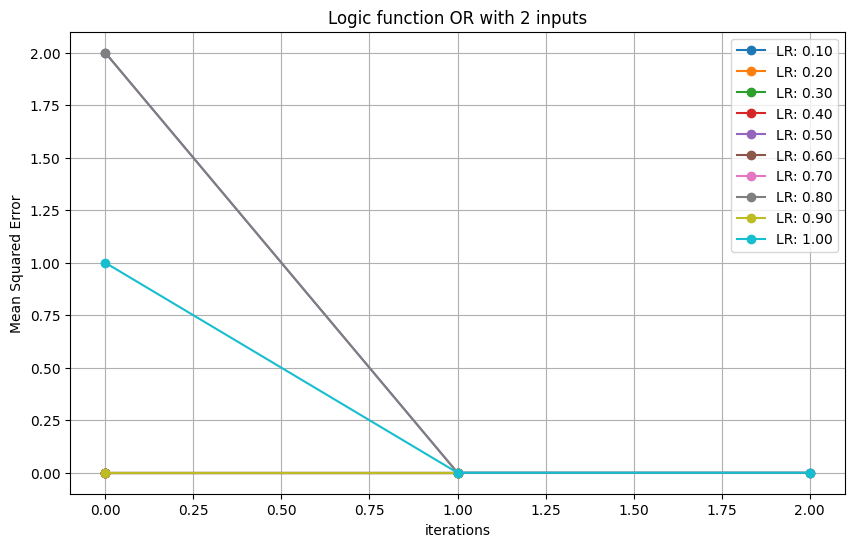

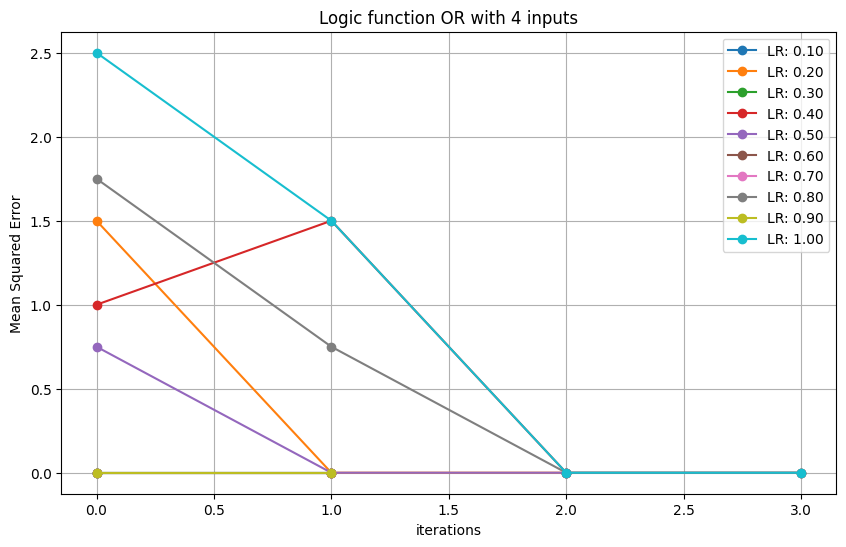

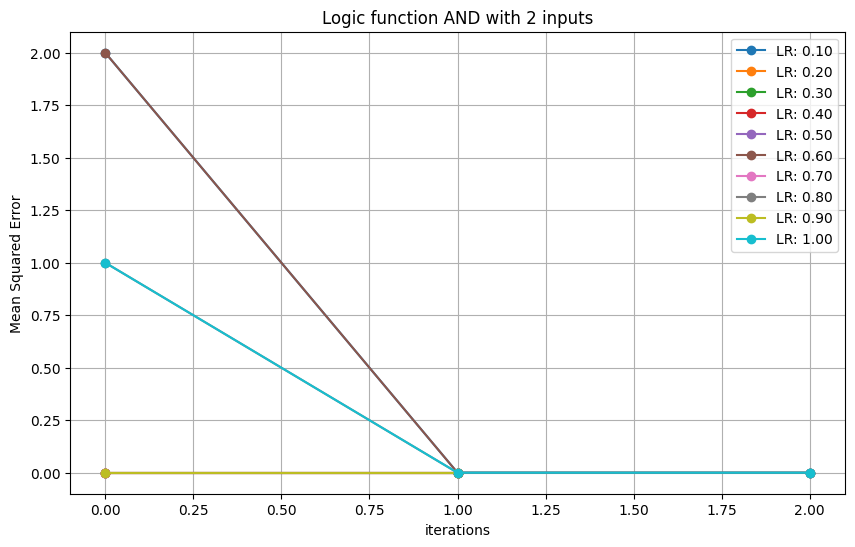

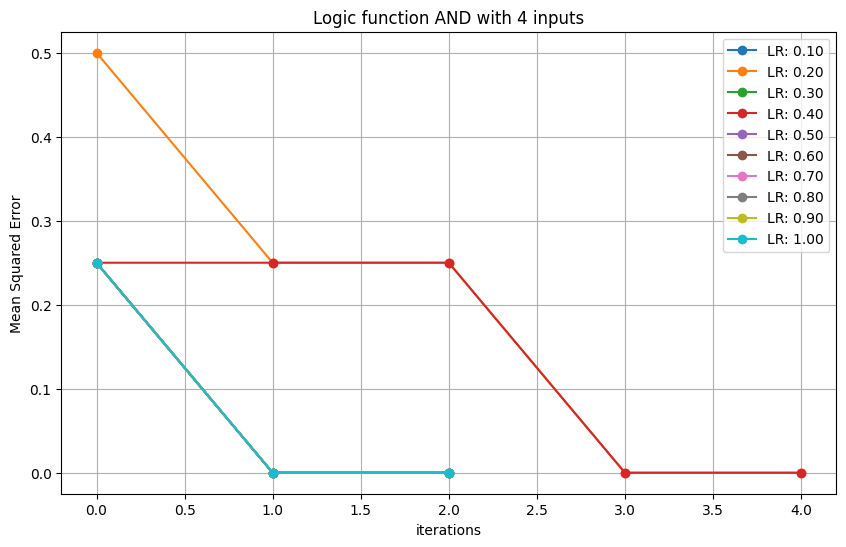

In [133]:
learning_rates = np.arange(0.1, 1.1, 0.1)
Xs = [X2, X4, X2, X4]
Ys = [YOr2, YOr4, YAnd2, YAnd4]

for x, y in zip(Xs, Ys):
    for i, nu in enumerate(learning_rates):
        per = Perceptron()
        per.train(x, y, nu)

        gate_type = "OR" if np.array_equal(y, YOr2) or np.array_equal(y, YOr4) else "AND"
        plot_errors(per.error_list, learning_rates, f"Logic function {gate_type} with {x.shape[1]} inputs", i+1)

&ensp; A fin de complementar el análisis del error durante el entrenamiento, se incorpora una visualización del perceptrón en el plano bidimensional. En este caso, el objetivo es mostrar gráficamente cómo el modelo separa las dos clases mediante una recta, la cual actúa como frontera de decisión. Para ello se utiliza una función que entrena el perceptrón y luego representa los puntos de entrada junto con la frontera obtenida, que se corresponde con la expresión teórica:
$$
    \mathbf{w}^\top \mathbf{x} + b = 0.
$$  

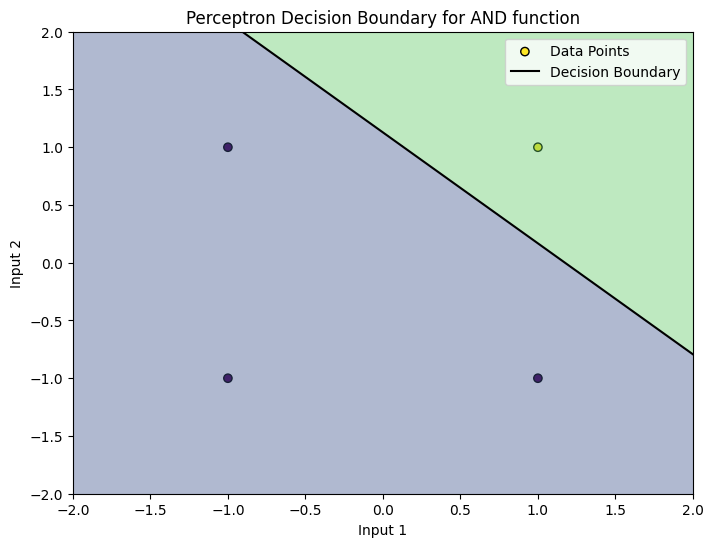

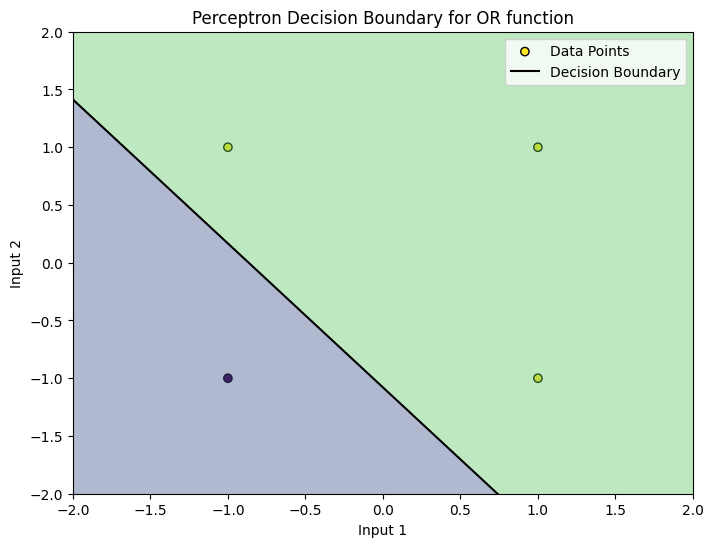

In [149]:
def plot_perceptron(input, target, title) -> None:
    """
    Plots the decision boundary of the trained perceptron along with the data points.
    """
    per = Perceptron()
    per.train(input, target, learning_rate=0.1)

    plt.figure(figsize=(8, 6))

    # Data points
    plt.scatter(input[:, 0], input[:, 1], c=target, edgecolors='k', label='Data Points')

    # Decision boundary
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    XX, YY = np.meshgrid(x, y)
    grid = np.column_stack((XX.ravel(), YY.ravel()))
    Z = per.predict(grid).reshape(XX.shape)
    plt.contourf(XX, YY, Z, levels = [-1, 0, 1], alpha = 0.4, linestyles = 'solid')

    # Decision boundary line
    plt.plot(x, (-per.weights[1] * x - per.weights[0]) / per.weights[2], color='black', label='Decision Boundary')

    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.legend()
    plt.show()

plot_perceptron(X2, YAnd2, "Perceptron Decision Boundary for AND function")
plot_perceptron(X2, YOr2, "Perceptron Decision Boundary for OR function")

---

<div style="text-align: left;">
  <h3><b>Base teórica - Capacidad del perceptrón simple</b></h3>
</div>

&ensp; La capacidad del perceptrón simple es la cantidad máxima de patrones que pueden ser correctamente clasificados en función de la dimensión $N$ del espacio de entrada. Desde un punto de vista combinatorio, un perceptrón no puede realizar todas las posibles particiones de un conjunto de $P$ patrones, sino sólo aquellas que se pueden obtener mediante hiperplanos. Para patrones en posición general, el número máximo de casos linealmente separables viene dado por la función de Cover:
$$
C(P,N) = 2 \sum_{k=0}^{N-1} \binom{P-1}{k}.
$$
Cuando $C(P,N) = 2^P$, todas las asignaciones posibles de etiquetas son realizables por algún hiperplano y, por lo tanto, cualquier problema binario con $P$ patrones es linealmente separable. A medida que $P$ crece, $C(P,N)$ deja de alcanzar $2^P$ y sólo una fracción de las asignaciones resulta separable.

&ensp; Para analizar esta idea resulta útil introducir la carga, que es la división entre cantidad de patrones y la dimensión del espacio de entrada:
$$
\alpha = \frac{P}{N}.
$$
En el límite de $P, ~N$ grandes, con $\alpha$ fijo, se demuestra que existe un valor crítico $\alpha_c \approx 2$ tal que:

- Para $\alpha < \alpha_c$ la mayoría de las asignaciones de etiquetas son linealmente separables, es decir, hay una alta probabilidad de encontrar pesos que clasifiquen todos los patrones.
- Para $\alpha > \alpha_c$ la probabilidad de que un conjunto aleatorio de etiquetas sea separable cae rápidamente hacia cero.

&ensp; En otras palabras, la capacidad del perceptrón simple escala de manera proporcional a la dimensión del espacio de entrada y, para patrones aleatorios, puede almacenar del orden de
$$
P_{\max} \approx 2N
$$
patrones antes de que la separación lineal deje de ser típicamente posible.

---


<div style="text-align: left;">
  <h4><b>Ejercicio 2</b></h4>
</div>

**Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.**

&ensp; Para estudiar cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados, se modificó la clase $\texttt{Perceptron}$ presentada en el punto anterior. Si bien su funcionamiento general se mantiene sin cambios, se incorporó un método específico orientado a este análisis: $\texttt{capacity}$.

&ensp; Este método evalúa la capacidad del perceptrón de manera empírica. Para un número dado de patrones $P$ y una dimensión $N$, genera múltiples problemas aleatorios con entradas en un rango acotado y etiquetas binarias en ${-1, +1}$. Cada problema se entrena mediante el perceptrón y se considera exitoso cuando el error final es cero, es decir, cuando existe un hiperplano capaz de separar correctamente todos los patrones. La capacidad estimada se calcula como:

$$
\text{Capacidad} = \frac{\text{\# Problemas separables}}{\text{\# Total de problemas}},
$$

lo que proporciona una aproximación a la probabilidad de separabilidad lineal para ese número de patrones. De esta forma, el método $\texttt{capacity}$ permite verificar de manera experimental el concepto teórico de capacidad del perceptrón simple, analizando cómo la separabilidad disminuye a medida que crece la cantidad de patrones respecto de la dimensión del espacio.

&ensp; En base a esto, resulta útil visualizar cómo dicha capacidad varía cuando se modifican tanto la cantidad de patrones $P$ como la dimensión del espacio $N$. Para esto se implementó la función $\texttt{plot\_capacities}$, cuyo objetivo es graficar la fracción de problemas linealmente separables en función del número de patrones enseñados, comparando distintos valores de $N$.

In [3]:
def plot_capacities(patterns_range, features_range, n_problems) -> None:
    """
    Plots the capacity of the perceptron for different numbers of features.
    """
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    plt.figure(figsize=(10, 6))
    for idx, n_features in enumerate(features_range):
        capacities = []
        for n_patterns in patterns_range:
            per = Perceptron()
            capacity = per.capacity(n_patterns, n_features, n_problems)
            capacities.append(capacity)

        plt.plot(patterns_range, capacities, color=colors[idx], label=f"N features = {n_features}")
        plt.axvline(x=2*n_features, linestyle='--', color=colors[idx], alpha=0.7, label=f'$2 N_\\text{{features}} = {2*n_features}$')
        plt.title(f"Perceptron Capacity")
        plt.xlabel("Number of Patterns")
        plt.ylabel("Capacity")
        plt.grid()
        plt.legend()

    plt.show()

&ensp; El gráfico obtenido permite visualizar cómo varía la capacidad del perceptrón simple a medida que aumenta el número de patrones $P$ para distintas dimensiones del espacio ($N = 10, 20, 30$). En todos los casos, la capacidad se mantiene cercana a $1$ mientras $P$ es relativamente pequeño, indicando que la gran mayoría de los problemas aleatorios son linealmente separables. Sin embargo, aparece el punto crítico marcado alrededor de $P \approx 2N$ indicado con líneas verticales punteadas, a partir del cual la curva de la capacidad cambia de concavidad como se puede observar.

&ensp; Otra cuestión que se puede destacar claramente de los diagramas es que, al aumentar la dimensión $N$, la curva se desplaza hacia la derecha, lo que confirma que una mayor dimensionalidad permite separar un número mayor de patrones antes de perder separabilidad, reforzando la relación lineal entre capacidad y dimensión del espacio.

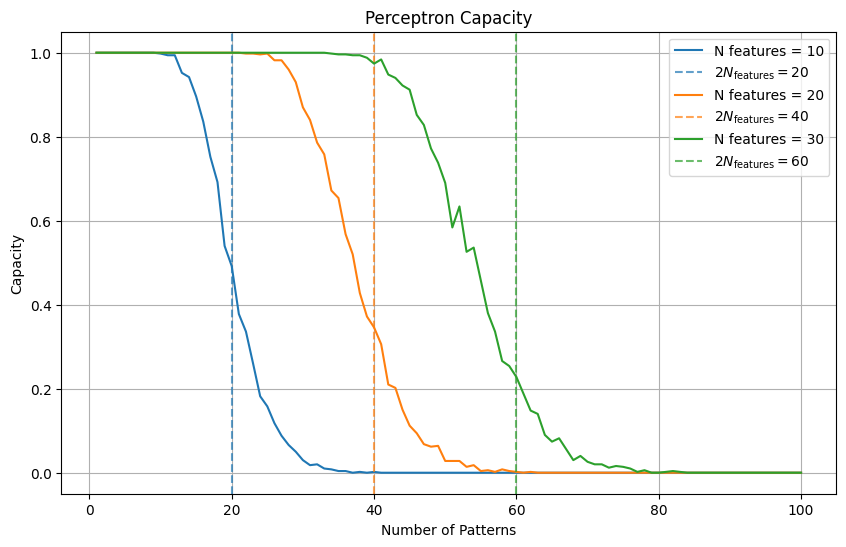

In [4]:
patterns_range = range(1, 101)
features_range = [10, 20, 30]
plot_capacities(patterns_range, features_range, n_problems=500)

---

<div style="text-align: left;">
  <h3><b>Base teórica - Perceptrón Multicapa (MLP)</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp;   El perceptrón multicapa o MLP (del inglés *Multilayer Perceptron*) es una arquitectura de red neuronal, en la que la información fluye únicamente desde la capa de entrada hacia la capa de salida sin retroalimentación interna. Su estructura se organiza en tres componentes principales:

- Capa de entrada, cuya cantidad de neuronas está determinada por el número de características del vector de entrada $\mathbf{x} \in \mathbb{R}^n$. 

- Capas ocultas o intermedias, formadas por neuronas que aplican transformaciones no lineales. Tanto la cantidad de capas como el número de neuronas en cada una se definen como hiperparámetros del modelo, ajustándose según la complejidad de la tarea a resolver.

- Capa de salida, cuya dimensión depende directamente del tipo de salida deseada y produce la respuesta final del modelo.

Esta estructura puede visualizarse en la Figura 2, donde se observa el flujo de información desde las entradas hasta la salida, pasando por una capa oculta.

<center>
<figure> <img src="https://cdn.jsdelivr.net/gh/felipeperassi/Neural-Networks@9acd5afb38676865c25644a4c57b5565a8ae6314/NN-Models/ReportImages/MLPs.png" alt="Estructura de una MLP" width="700"> <figcaption><i>Figura 2.</i> Estructura de un MLP.</figcaption> </figure>
</center>

&ensp; Desde un punto de vista matemático, un MLP puede verse como la composición secuencial de funciones, donde cada capa realiza dos operaciones: primero una transformación lineal mediante pesos y un *bias*, y luego una transformación no lineal a través de una función de activación. Esta estructura se expresa como:

$$
f(\mathbf{x}) = g_2\!\left( W_2 \, g_1(W_1 \mathbf{x} + \mathbf{b}_1 ) + \mathbf{b}_2 \right)
$$

donde $W_1$ y $W_2$ son las matrices de pesos, $\mathbf{b}_1$ y $\mathbf{b}_2$ son los biases, y $g_1$, $g_2$ representan las funciones de activación no lineales aplicadas en cada capa. Es precisamente esta combinación entre operaciones lineales y no lineales la que otorga al MLP su capacidad para modelar dependencias complejas que no podrían ser capturadas por un modelo puramente lineal.

&ensp; 

<div style="text-align: left;">
  <h4><b>Proceso de entrenamiento</b></h4>
</div>

&ensp; El entrenamiento de un perceptrón multicapa consiste en calcular la salida del modelo con los pesos actuales, medir el error cometido y ajustar los parámetros para reducirlo. Este proceso se repite iterativamente y consta de tres etapas principales: *forward pass*, cálculo del error y *backpropagation*.

$$\textit{forward pass} \rightarrow \text{cálculo del error} \rightarrow \textit{backpropagation} \rightarrow \text{actualización de pesos}$$

1. **Forward pass:** es el proceso mediante el cual un patrón de entrada atraviesa la red para generar una salida. En la capa oculta, cada neurona calcula:
   $$
   h_j = \sum_{k=1}^{N} w_{jk} x_k + b_j
   $$

   y aplica una función de activación $g(\cdot)$:

   $$
   v_j = g(h_j)
   $$

   &ensp; Luego, la salida de la red se obtiene combinando estas activaciones:

   $$
   \hat{y} = g\!\left( \sum_{j=1}^{M} w_j v_j + b \right)
   $$

   Este proceso no modifica los pesos, sólo evalúa la salida del modelo para los parámetros actuales.

2. **Función de costo:** permite cuantificar qué tan lejos está la salida obtenida respecto del valor deseado. Una de las elecciones más comunes es el **Error Cuadrático Medio (MSE)**, que se utiliza en el presente trabajo práctico:

   $$
   E = \frac{1}{N} \sum_p^N (y^{(p)} - \hat{y}^{(p)})^2
   $$

   El objetivo del entrenamiento es minimizar $E$, ya que un error menor implica que la red está produciendo salidas más cercanas a las esperadas.

3. **Backpropagation:** es el proceso mediante el cual el error calculado en la salida se propaga hacia atrás por la red para determinar cómo contribuyó cada peso al error final. Se definen señales locales de error (deltas), cuyo cálculo depende de la capa en la que se encuentre la neurona dentro de la red.

   - Delta en la capa de salida:
   $$
   \delta_i = g'(h_i)\,(y_i - \hat{y}_i)
   $$

   - Delta en la capa oculta:
   $$
   \delta_j = g'(h_j)\sum_i w_{ij}\,\delta_i
   $$

   Estos deltas indican la dirección en la que deben ajustarse los pesos para reducir el error.

4. **Actualización de pesos y biases:** una vez calculados los deltas, los parámetros de la red se ajustan siguiendo la regla de gradiente descendente, moviendo los valores en la dirección que reduce el error.

   - Actualización de los pesos:
   $$
   \Delta w_{ij} = \eta\,\delta_i\,v_j
   $$
   $$
   w_{ij} \leftarrow w_{ij} + \Delta w_{ij}
   $$

   - Actualización de los biases:
   $$
   \Delta b_i = \eta\,\delta_i
   $$
   $$
   b_i \leftarrow b_i + \Delta b_i
   $$

   donde $\eta > 0$ es la tasa de aprendizaje. Este paso completa una iteración de ajuste de parámetros durante el entrenamiento del modelo.

&ensp;

<div style="text-align: left;">
  <h4><b> Tipos de entrenamiento </b></h4>
</div>

&ensp; En un MLP, la regla de actualización obtenida por backpropagation puede aplicarse de distintas maneras según cuántos patrones se utilicen antes de modificar los pesos.

- **Batch:** la red procesa todos los patrones del conjunto de entrenamiento antes de realizar una única actualización de los pesos. La corrección se calcula acumulando el aporte de cada patrón al gradiente:

   $$
   \Delta w_{ij} = \eta \sum_{p} \delta_i^{(p)}\, v_j^{(p)}
   $$

   Esto produce una trayectoria del error más estable y suave, aunque con un mayor costo computacional por *epoch*, ya que los pesos solo se ajustan después de evaluar todos los datos.

- **Stochastic Gradient Descent (SGD):** la actualización se realiza después de cada patrón individual, utilizando únicamente su contribución al gradiente:

   $$
   \Delta w_{ij} = \eta \,\delta_i^{(p)}\, v_j^{(p)}
   $$

   El entrenamiento se vuelve más irregular y variable, ya que cada muestra puede cambiar la dirección del ajuste, pero tiende a converger más rápido en número de actualizaciones y resulta adecuado para conjuntos grandes.

- **Mini-Batch:** este enfoque constituye un punto intermedio entre los anteriores. Los datos se dividen en lotes pequeños (*mini-batches*) y los pesos se actualizan después de procesar cada lote:

   $$
   \Delta w_{ij} = \eta \sum_{p \in \text{batch}} \delta_i^{(p)}\, v_j^{(p)}
   $$

   Combina la estabilidad del entrenamiento batch con la agilidad del entrenamiento estocástico, reduciendo la variabilidad entre iteraciones y mejorando la eficiencia computacional. Es el método más utilizado en la práctica.

&ensp;

<div style="text-align: left;">
  <h4><b>Importancia de los hiperparámetros </b></h4>
</div>

&ensp; El desempeño de un MLP no depende únicamente del algoritmo de entrenamiento, sino también de un conjunto de hiperparámetros que deben definirse antes del proceso de aprendizaje. Entre los más relevantes se encuentran la función de activación, el esquema de inicialización de pesos, la tasa de aprendizaje $\eta$, el tamaño y número de capas ocultas y el tipo de entrenamiento. Estos valores no se ajustan automáticamente durante el entrenamiento y, por lo tanto, influyen de manera directa en la velocidad de convergencia, la estabilidad del gradiente y la capacidad de generalización del modelo.

&ensp; En consecuencia, el rendimiento final del MLP puede variar significativamente según cómo se seleccionen estos hiperparámetros. Una elección adecuada puede facilitar el aprendizaje y conducir a errores bajos, mientras que configuraciones desfavorables pueden provocar oscilaciones, estancamiento o incluso impedir que la red aprenda patrones complejos. Por su flexibilidad y capacidad para aproximar una amplia variedad de funciones, el MLP constituye un modelo central dentro del aprendizaje supervisado, pero su eficacia depende en gran medida de una correcta configuración inicial.


---

<div style="text-align: left;">
  <h4><b>Ejercicio 3</b></h4>
</div>

**Implemente un perceptrón multicapa que aprenda la función lógica XOR de $2$ y de $4$ entradas (utilizando el algoritmo *Backpropagation* y actualizando en *batch*). Muestre cómo evoluciona el error durante el entrenamiento.**


&ensp; En este ejercicio se aborda una función lógica que no es linealmente separable: la compuerta **XOR**. A diferencia de **AND** y **OR**, esta función no puede ser resuelta por un perceptrón simple, lo que motiva el uso de un perceptrón multicapa. El objetivo es entrenar una red capaz de aprender la correspondencia entre las entradas y salidas definidas por la tabla de verdad de **XOR**, utilizando *backpropagation* y actualización en *batch*.

&ensp; Para ello, se construyen los conjuntos de datos correspondientes a las versiones de $2$ entradas y $4$ entradas, codificando cada valor en el dominio ${-1, +1}$. Las tablas de verdad utilizadas para el entrenamiento se muestran a continuación.

- Función **XOR** de $2$ entradas.

<table align="center"> 
  <tr> 
    <th style="text-align:center;">X₁</th> 
    <th style="text-align:center;">X₂</th> 
    <th style="text-align:center;">Y</th> 
  </tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> 
</table>

- Función **XOR** de $4$ entradas.

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

&ensp; Así, haciendo uso de la función creada con antelación, se realizan las tablas de verdad de la función **XOR**.

In [9]:
display(HTML("<h3><b>Truth Tables Generated for Logic Gates</b></h3>"))

display(HTML("<b>OR Function - 2 Inputs</b>"))
X2, YXor2 = logic_vectors("XOR", 2)

display(HTML("<b>XOR Function - 4 Inputs</b>"))
X4, YXor4 = logic_vectors("XOR", 4)

X1,X2,Y
1,1,-1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,-1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,-1
1,-1,1,1,1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,-1


&ensp; Una vez establecida la base teórica del perceptrón multicapa, se procede a implementar la clase $\text{MultiLayerPerceptron}$ siguiendo el esquema de *forward pass*, cálculo del error, *backpropagation* y actualización de parámetros mediante gradiente descendente (en sus variantes *batch*, *mini-batch* o estocástica), tal como se describió en el apartado anterior. A continuación se resumen los métodos principales de la clase implementada.


- $\texttt{\_\_init\_\_}$: configura la arquitectura del MLP a partir del vector `layers_config`, define las funciones de activación de la capa oculta y de salida, y llama al inicializador de pesos y *bias*. De esta manera, el modelo queda estructurado en capas totalmente conectadas, con parámetros iniciales listos para comenzar el entrenamiento.

- $\texttt{forward\_pass}$: implementa el *forward pass* a través de todas las capas de la red, de acuerdo con
  $$
  h^{(\ell)} = V^{(\ell-1)} W^{(\ell)} + b^{(\ell)}, \qquad
  V^{(\ell)} = g^{(\ell)}\!\big(h^{(\ell)}\big),
  $$
  donde $V^{(0)}$ corresponde a las entradas.

- $\texttt{backpropagation}$: entrena el MLP mediante el algoritmo de *backpropagation* utilizando gradiente descendente. El procedimiento sigue el ciclo teórico:

  1. *Forward pass* para obtener $\hat{y}^{(p)}$.

  2. Cálculo del error cuadrático medio:
     $$ E = \frac{1}{N}\sum_{p}^N (y^{(p)} - \hat{y}^{(p)})^2. $$

  3. Cálculo de los deltas en la capa de salida:
     $$
      \delta^{(L)} = g'\!\big(h^{(\ell)}\big)\, \big(y - \hat{y}\big)
     $$

  4. *Backpropagation* de los deltas hacia las capas ocultas:
     $$
      \delta^{(\ell)} = g'\!\big(h^{(\ell)}\big)\, \big(\delta^{(\ell+1)} {W^{(\ell+1)}}^\top\big)
     $$

  5. Actualización de pesos y *bias* mediante gradiente descendente, promediando sobre el *batch*:
     $$
      \Delta W^{(\ell)} = \eta\,\frac{1}{B}\,{V^{(\ell-1)}}^\top \delta^{(\ell)}
      $$
      $$
      \Delta b^{(\ell)} = \eta\,\frac{1}{B} \sum_{p \in \text{batch}} \delta^{(\ell,p)}
      $$
      $$
      W^{(\ell)} \leftarrow W^{(\ell - 1)} + \Delta W^{(\ell)}, \qquad
      b^{(\ell)} \leftarrow b^{(\ell - 1)} + \Delta b^{(\ell)}
      $$

  El método permite usar entrenamiento *batch* (`batch_size = N`), *SGD* (`batch_size = 1`) o *mini-batch* (`batch_size < N`), mezcla los datos en cada *epoch* mediante $\texttt{\_\_shuffle\_data}$, calcula y almacena el error de entrenamiento y, opcionalmente, el de validación. El proceso se detiene cuando el error cae por debajo de una tolerancia o se alcanza el número máximo de épocas. Devuelve la cantidad de épocas efectivamente utilizadas y el error final.

- $\texttt{predict}$: utiliza $\texttt{forward\_pass}$ para calcular la salida de la red sobre nuevos datos y aplica una regla de decisión acorde a la activación de salida. Implementa la etapa de inferencia del MLP sin modificar los parámetros.

- $\texttt{\_\_initialize\_weights}$: inicializa las matrices de pesos y los *bias* de cada capa de acuerdo con el tamaño de entrada y salida $(n_{\text{in}}, n_{\text{out}})$, utilizando una distribución uniforme acotada por
  $$
  \mathcal{U}\!\left(-\sqrt{\frac{6}{n_{\text{in}}+n_{\text{out}}}}, \;\; \sqrt{\frac{6}{n_{\text{in}}+n_{\text{out}}}}\right),
  $$
  lo que corresponde a una inicialización de tipo *Xavier*, adecuada para activaciones sigmoide o $\tanh$. Los *bias* se inicializan en cero.

- $\texttt{\_\_shuffle\_data}$: desordena de forma conjunta las matrices de entrada y de objetivos cuando el tamaño de *batch* es menor que el número total de patrones, implementando la aleatorización estándar utilizada en entrenamiento *batch* y *mini-batch* para evitar que el orden de los datos introduzca sesgos en el gradiente.

- $\texttt{\_\_MS\_error}$: calcula el error cuadrático medio:  
    $$
    E = \frac{1}{N} \sum_{p=1}^{N} \big(y^{(p)} - \hat{y}^{(p)}\big)^2
    $$

    Un valor de error igual a cero indica que todas las predicciones coinciden exactamente con los valores objetivo.

In [47]:
class MultiLayerPerceptron:
    def __init__(self, layers_config, act_hidden, der_act_hidden, act_output, der_act_output):

        if layers_config is None or layers_config[-1] != 1:
            raise ValueError("A valid layers configuration must be provided.")
        if act_output is None or der_act_output is None:
            raise ValueError("Output activation function and its derivative must be provided.")
        if act_hidden is None or der_act_hidden is None:
            raise ValueError("Hidden activation function and its derivative must be provided.")
        
        self.layers = layers_config

        self.act_hidden = act_hidden
        self.der_act_hidden = der_act_hidden
        self.act_hidden_name = act_hidden.__name__.lower()

        self.act_output = act_output
        self.der_act_output = der_act_output
        self.act_output_name = act_output.__name__.lower()

        self.weights, self.biases = self.__initialize_weights()
        self.errors = None
        self.val_errors = None

    def forward_pass(self, input) -> Tuple[np.ndarray, np.ndarray, list, list]:
        """ 
        Perform a forward pass through the network.
        """
        preacts, acts = [], [input]

        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            preact = input @ W + b
            input = self.act_hidden(preact)
            preacts.append(preact)
            acts.append(input)

        output_preact = input @ self.weights[-1] + self.biases[-1]
        output = self.act_output(output_preact)
        preacts.append(output_preact)
        acts.append(output)

        return output, output_preact, preacts, acts

    def backpropagation(self, input, target, learning_rate, batch_size=None, val_input=None, val_target=None, tol=0.005, max_epochs=10000) -> Tuple[int, float]:
        """
        Train the MLP using backpropagation.
        """
        target = target.reshape(-1, 1) # Ensure target is a column vector
        if self.act_output_name == 'sigmoid':
            target = (target + 1) / 2

        N = input.shape[0]
        if batch_size is None or batch_size > N: # Added batch size check
            batch_size = N

        output, output_preact, preacts, acts = self.forward_pass(input)
        error = self.__MS_error(output, target)
        
        self.errors = []
        self.val_errors = []
        epochs = 0
        while error >= tol and epochs < max_epochs:
            input, target = self.__shuffle_data(input, target, batch_size)

            for start in range(0, N, batch_size):
                end = start + batch_size
                input_batch, target_batch = input[start:end], target[start:end]

                output, output_preact, preacts, acts = self.forward_pass(input_batch)
                
                deltas = [None] * len(self.weights)
                deltas[-1] = (output - target_batch) * self.der_act_output(output_preact)

                for idx_layer in reversed(range(len(self.weights) - 1)):
                    deltas[idx_layer] = self.der_act_hidden(preacts[idx_layer]) * (deltas[idx_layer + 1] @ self.weights[idx_layer + 1].T)
            
                for idx_layer in range(len(self.weights)):
                    grad_weights = (acts[idx_layer].T @ deltas[idx_layer]) / input_batch.shape[0]
                    grad_bias = np.mean(deltas[idx_layer], axis=0, keepdims=True)

                    self.weights[idx_layer] -= learning_rate * grad_weights
                    self.biases[idx_layer] -= learning_rate * grad_bias

            if val_input is not None and val_target is not None:
                val_target = val_target.reshape(-1, 1)
                val_output, _, _, _ = self.forward_pass(val_input)
                val_error = self.__MS_error(val_output, val_target)
                self.val_errors.append(val_error)

            output, output_preact, preacts, acts = self.forward_pass(input)
            error = self.__MS_error(output, target)
            self.errors.append(error)
            epochs += 1
        
        return epochs, error
    
    def simulated_annealing(self, input, target, initial_temp=1.0, alpha=0.9, step_size=0.1, val_input=None, val_target=None, tol=0.005, max_epochs=10000) -> Tuple[int, float]:
        """
        Train the MLP using simulated annealing.
        """
        target = target.reshape(-1, 1) # Ensure target is a column vector
        if self.act_output_name == 'sigmoid':
            target = (target + 1) / 2

        output, _, _, _ = self.forward_pass(input)
        current_error = self.__MS_error(output, target)

        best_error = current_error
        best_weights = [W.copy() for W in self.weights]
        best_biases = [b.copy() for b in self.biases]
        
        T = initial_temp
        self.errors = []
        self.val_errors = []
        epoch = 0
        while best_error > tol and epoch < max_epochs:
            old_weights = [W.copy() for W in self.weights]
            old_biases = [b.copy() for b in self.biases]

            # Weights perturbation
            w_idx = np.random.randint(len(self.weights))
            W = self.weights[w_idx]
            wi, wj = np.random.randint(W.shape[0]), np.random.randint(W.shape[1])
            self.weights[w_idx][wi, wj] += step_size * np.random.normal()

            # Bias perturbation
            b_idx = np.random.randint(len(self.biases))
            B = self.biases[b_idx]
            bk = np.random.randint(B.shape[1])
            self.biases[b_idx][0, bk] += step_size * np.random.normal()

            output, _, _, _ = self.forward_pass(input)
            new_error = self.__MS_error(output, target)
            delta_error = new_error - current_error

            if delta_error <= 0 or np.random.rand() < np.exp(-delta_error / T):
                current_error = new_error
                if new_error < best_error:
                    best_error = new_error
                    best_weights = [W.copy() for W in self.weights]
                    best_biases = [b.copy() for b in self.biases]
            
            else:
                self.weights = old_weights
                self.biases = old_biases

            if val_input is not None and val_target is not None:
                val_target = val_target.reshape(-1, 1)
                val_output, _, _, _ = self.forward_pass(val_input)
                val_error = self.__MS_error(val_output, val_target)
                self.val_errors.append(val_error)

            self.errors.append(current_error)

            T *= alpha
            epoch += 1

        self.weights = best_weights
        self.biases = best_biases

        return epoch, best_error

    def predict(self, input) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        output, _, _, _ = self.forward_pass(input)
        
        if self.act_output_name == 'tanh':
            return np.where(output >= 0, 1, -1)
        elif self.act_output_name == 'linear':
            return output
        else:
            return np.where(output >= 0.5, 1, -1)
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> Tuple[list, list]:
        """
        Initialize weights and biases for each layer.
        """
        acts_supported = ['sigmoid', 'tanh', 'relu', 'linear']
        if not any(name in self.act_hidden_name for name in acts_supported):
            raise ValueError(f"act function '{self.act_hidden_name}' is not supported.")
        if not any(name in self.act_output_name for name in acts_supported):
            raise ValueError(f"output act function '{self.act_output_name}' is not supported.")

        W, b = [], []
        for n_in, n_out in zip(self.layers[:-1], self.layers[1:]):
            # if act_name == acts_supported[2]: # ReLU
            #     W_aux = np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out))
            #     W.append(W_aux)
        
            lim = np.sqrt(6. / (n_in + n_out))
            W_aux = np.random.uniform(-lim, lim, (n_in, n_out))
            W.append(W_aux)
            b.append(np.zeros((1, n_out)))
            
        return W, b

    def __shuffle_data(self, input, target, batch_size) -> Tuple[np.ndarray, np.ndarray]:
        """
        Shuffle input and target data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]
            target = target[idx_perm]

        return input, target
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

&ensp; Luego de realizar la descripción de la clase, se implementan las funciones de activación y sus derivadas.

In [48]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def der_sigmoid(x): return sigmoid(x) * (1 - sigmoid(x))
def der_tanh(x): return 1 - np.tanh(x) ** 2
def linear(x): return x
def der_linear(x): return np.ones_like(x)

&ensp; Para visualizar el desempeño del MLP durante el entrenamiento, se implementa la función $\texttt{plot\_errors\_mlp}$. Esta entrena la red utilizando *backpropagation* o *simulated annealing* y registra el error cuadrático medio a lo largo de las *epochs*. Luego, grafica la evolución del error de entrenamiento,  permitiendo analizar la convergencia del modelo y comparar distintos esquemas de entrenamiento. Al finalizar, muestra el error final alcanzado y la cantidad total de *epochs* utilizadas.

In [49]:
def plot_errors_mlp(mlp, input, target, learning_rate, max_epochs, title, val_input=None, val_target=None, batch_size=None, sa=False):
    """
    Plot training and validation errors over epochs for the MLP.
    """
    if sa:
        epochs, last_error = mlp.simulated_annealing(input, target, val_input=val_input, val_target=val_target, max_epochs=max_epochs)
    else:
        epochs, last_error = mlp.backpropagation(input, target, learning_rate, val_input=val_input, val_target=val_target, max_epochs=max_epochs, batch_size=batch_size)
    
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.errors, label='Training Error')
    if val_input is not None and val_target is not None:
        plt.plot(mlp.val_errors, label='Validation Error')
    
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))
    if val_input is not None and val_target is not None:
        display(HTML(f"<b>Final MSE for validation after {epochs} epochs: {mlp.val_errors[-1]:.4f}</b>"))

&ensp; A partir de las tablas de verdad de la función **XOR** de $2$ y $4$ entradas, se entrenan distintos perceptrones multicapa variando tanto la arquitectura de la red (cantidad de neuronas ocultas y número de capas) como la función de activación utilizada en las capas internas y de salida. En particular, se consideran configuraciones con activación $\tanh$ y sigmoide, y estructuras de la forma ***[entradas, capa oculta, salida]*** y **[entradas, capa oculta 1, capa oculta 2, salida]**. 

&ensp; Para cada una de estas arquitecturas se entrena el modelo mediante el método de *backpropagation* con actualización en *batch*, registrando la evolución del error cuadrático medio a lo largo de las *epochs* mediante la función $\texttt{plot\_errors\_mlp}$. De este modo, es posible comparar visualmente la convergencia de las distintas configuraciones y analizar cómo influyen la profundidad de la red, el número de neuronas ocultas y la elección de la función de activación sobre la capacidad del MLP para aprender la función **XOR**. 

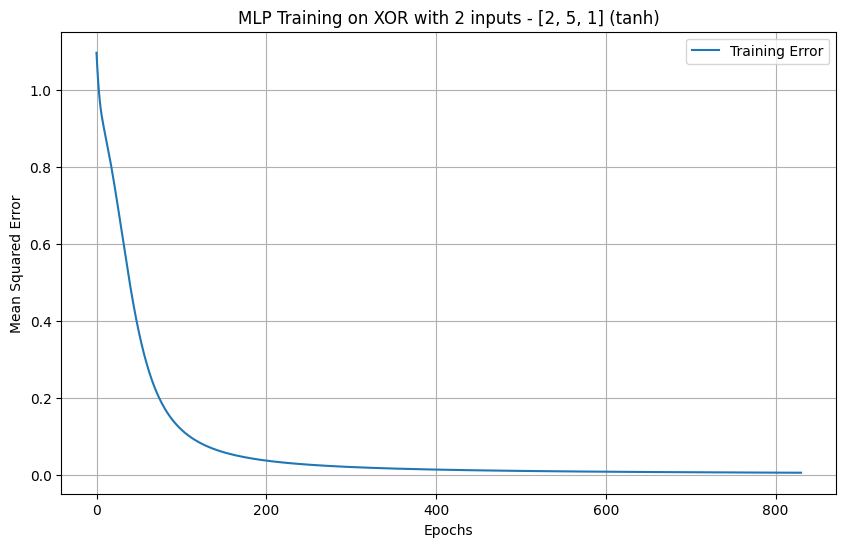

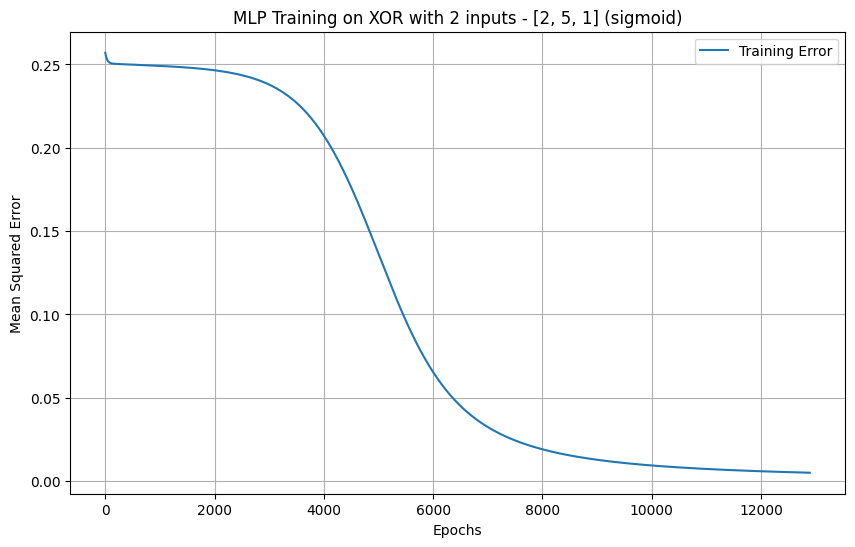

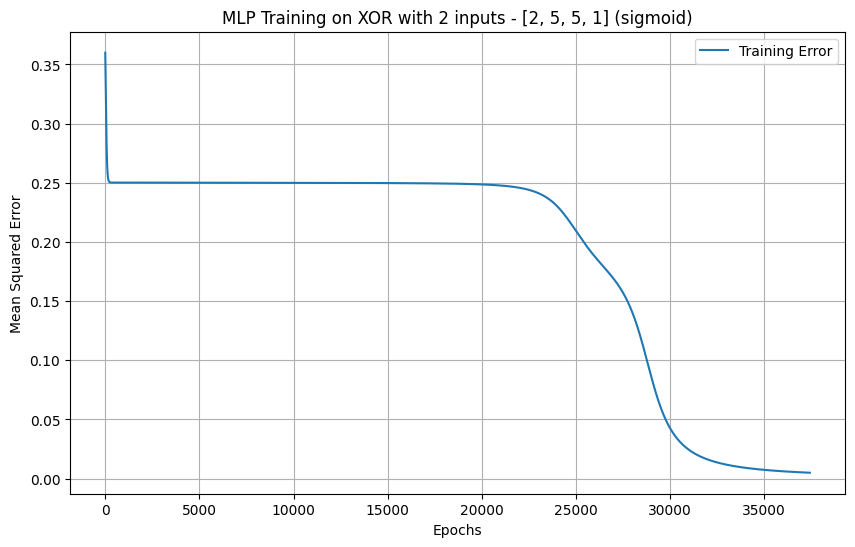

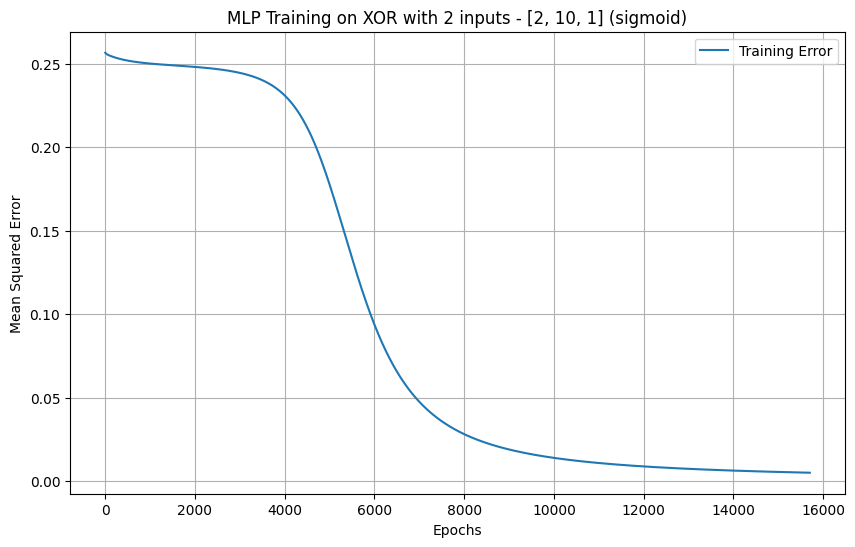

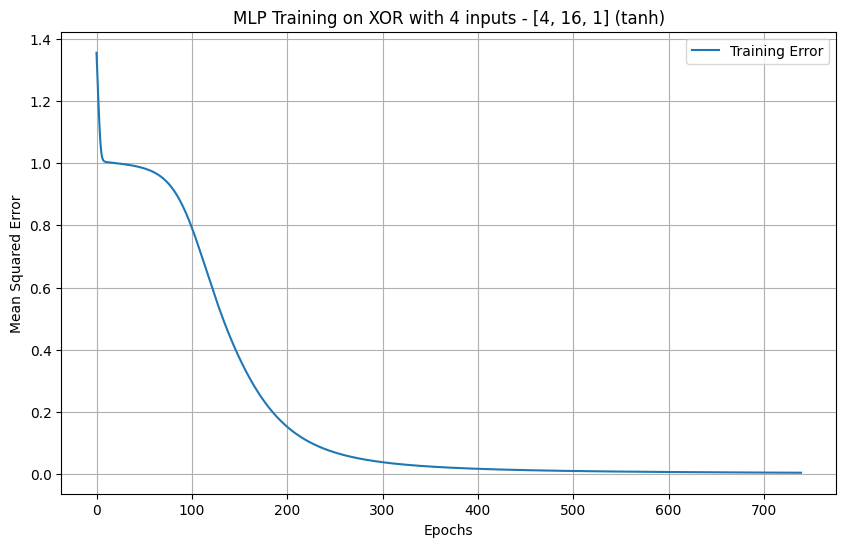

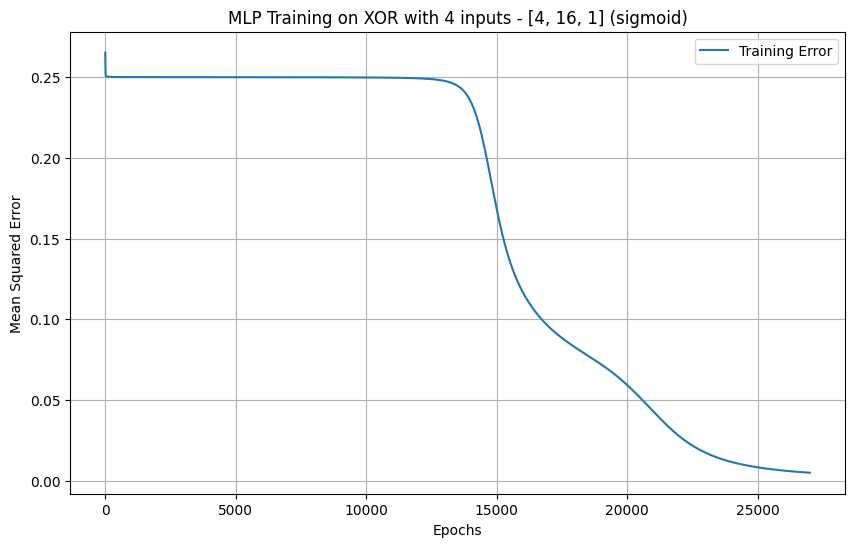

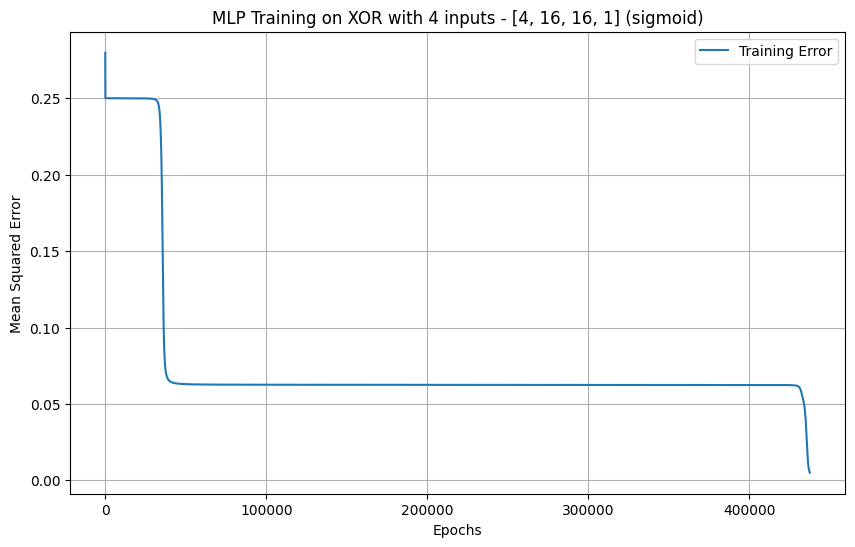

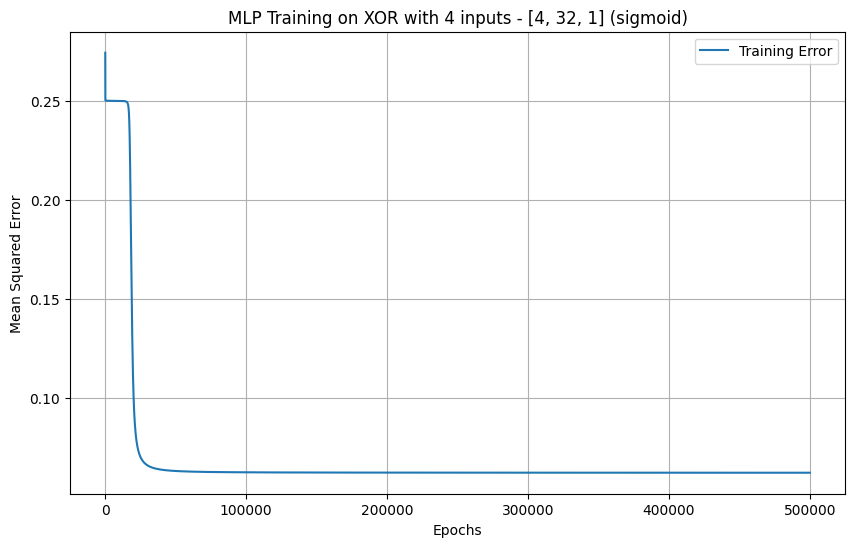

In [72]:
# MLP tanh for XOR with 2 inputs
MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (tanh)")

# MLP sigmoid for XOR with 2 inputs
MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 10, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 10, 1] (sigmoid)")

# MLP tanh for XOR with 4 inputs
MLP4_tanh = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP4_tanh, X4, YXor4, learning_rate=0.2, max_epochs=100000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (tanh)")

# MLP sigmoid for XOR with 4 inputs
MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 32, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 32, 1] (sigmoid)")


&ensp; A continuación se resumen las arquitecturas evaluadas.

<div align="center">

| Función XOR | Arquitectura `layers_config` | Activación oculta / salida | $\eta$ | Máx. epochs | Epochs utilizados | MSE final         |
|------------:|:----------------------------:|----------------------------|:------:|:-----------:|:-----------------:|:-----------------:|
| 2 entradas  | [2, 5, 1]                    | tanh / tanh               | 0.1    | 10 000      |        831        |       0.005       |
| 2 entradas  | [2, 5, 1]                    | sigmoid / sigmoid         | 0.1    | 100 000     |        12 894     |       0.005       |
| 2 entradas  | [2, 5, 5, 1]                 | sigmoid / sigmoid         | 0.1    | 100 000     |        37 420     |       0.005       |
| 2 entradas  | [2, 10, 1]                   | sigmoid / sigmoid         | 0.1    | 100 000     |        15 704     |       0.005       |
| 4 entradas  | [4, 16, 1]                   | tanh / tanh               | 0.2    | 100 000     |        740        |       0.005       |
| 4 entradas  | [4, 16, 1]                   | sigmoid / sigmoid         | 0.3    | 500 000     |        27 002     |       0.005       |
| 4 entradas  | [4, 16, 16, 1]               | sigmoid / sigmoid         | 0.3    | 500 000     |        437 534    |       0.005       |
| 4 entradas  | [4, 32, 1]                   | sigmoid / sigmoid         | 0.3    | 500 000     |        500 000    |       0.0625      |

</div>

&ensp;

&ensp; A partir de los resultados obtenidos, se observa una diferencia marcada entre las configuraciones que utilizan $\tanh$ y aquellas basadas en la sigmoide. En particular, las redes con activación $\tanh$ lograron alcanzar el umbral de error en muchas menos *epochs*, tanto para la función **XOR** de $2$ como de $4$ entradas. Esto sugiere un mejor desempeño en términos de velocidad de convergencia, lo cual es consistente con el hecho de que $\tanh$ posee valores centrados en cero y gradientes más equilibrados, facilitando la propagación del error durante el entrenamiento.

&ensp; Por otro lado, se probaron arquitecturas más profundas y con mayor cantidad de neuronas ocultas bajo la hipótesis de que una red más grande podría aprender más rápido. Sin embargo, los resultados muestran lo contrario: al agregar más capas o más neuronas, el número de *epochs* necesario para converger aumentó significativamente. En algunos casos, como la arquitectura **[4, 32, 1]** con sigmoide, el modelo ni siquiera alcanzó el error objetivo dentro del límite establecido, quedando con un MSE final mayor.

&ensp; Esto indica que redes más grandes no garantizan un aprendizaje más rápido. En problemas simples como **XOR**, un incremento excesivo en la cantidad de parámetros introduce mayor complejidad, hace más difícil la optimización y puede ralentizar el descenso del error. En cambio, arquitecturas compactas con activación $\tanh$ demostraron ser más eficientes, alcanzando la convergencia en muchas menos iteraciones.

---

<div style="text-align: left;">
  <h4><b>Ejercicio 4</b></h4>
</div>

**(A). Implemente una red con aprendizaje *Backpropagation* que aprenda la siguiente función:**

$$ f(x, ~ y, ~ z) = \sin (x) + \cos(y) + z$$

**donde: $x, ~ y \in [0, ~ 2\pi]$ y $z\in [-1, ~1]$. Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre la evolución del error de entrenamiento y de evaluación en función de las épocas de entrenamiento.** 

&ensp; Para entrenar y evaluar el modelo se utiliza la función `generate_dataset`, que construye automáticamente el conjunto de datos. Primero genera $n_{\text{samples}}$ triples de entrada $(x, y, z)$ muestreados de forma uniforme en los rangos indicados:

$$  x \sim \mathcal{U}(0, 2\pi), \quad y \sim \mathcal{U}(0, 2\pi), \quad z \sim \mathcal{U}(-1, 1)
$$

A partir de estas entradas se calcula la salida objetivo:

$$
f = \sin(x) + \cos(y) + z.
$$

Con esto se construyen dos matrices:

- La matriz de entradas  
  $$
  X = 
  \begin{bmatrix}
  x^{(1)} & y^{(1)} & z^{(1)} \\
  x^{(2)} & y^{(2)} & z^{(2)} \\
  \vdots  & \vdots  & \vdots  \\
  x^{(N)} & y^{(N)} & z^{(N)}
  \end{bmatrix}
  \in \mathbb{R}^{N \times 3},
  $$
  donde cada fila corresponde a un patrón de entrada con tres características.

- El vector columna de salidas
  $$
  Y = 
  \begin{bmatrix}
  f^{(1)} \\
  f^{(2)} \\
  \vdots \\
  f^{(N)}
  \end{bmatrix}
  \in \mathbb{R}^{N \times 1},
  $$
  donde cada elemento $f^{(p)}$ es el valor de la función evaluada en $(x^{(p)}, y^{(p)}, z^{(p)})$.

&ensp; Finalmente, el conjunto completo se separa en un subconjunto de entrenamiento y otro de evaluación usando el parámetro `train_size`. Para `train_size = 0.8`, por ejemplo, las primeras $0.8\,N$ filas de $(X, Y)$ se asignan a $(X_{\text{train}}, Y_{\text{train}})$ y el resto a $(X_{\text{test}}, Y_{\text{test}})$. De este modo, se obtiene un conjunto de entrenamiento con filas del estilo

$$
(x^{(p)},\, y^{(p)},\, z^{(p)}) \;\;\longrightarrow\;\; f^{(p)} = \sin(x^{(p)}) + \cos(y^{(p)}) + z^{(p)},
$$

que sirve para ajustar los parámetros de la red y un conjunto de evaluación con la misma estructura para medir el error fuera de la muestra.

In [ ]:
def generate_dataset(n_samples, train_size=0.8):
    """
    Generate a dataset for the function f(x, y, z) = sin(x) + cos(y) + z
    where x, y in [0, 2pi] and z in [-1, 1].  
    """
    if n_samples <= 0:
        raise ValueError("n_samples must be a positive integer.")
    
    x = np.random.uniform(0, 2 * np.pi, n_samples)
    y = np.random.uniform(0, 2 * np.pi, n_samples)
    z = np.random.uniform(-1, 1, n_samples)
    f = np.sin(x) + np.cos(y) + z
    
    X = np.column_stack((x, y, z))
    Y = f.reshape(-1, 1)

    train_samples = int(n_samples * train_size)
    X_train, X_test = X[:train_samples], X[train_samples:]
    Y_train, Y_test = Y[:train_samples], Y[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

&ensp; Se generan $N = 1000$ muestras y se utiliza un $80 \%$ para entrenamiento. Entonces, el conjunto queda dividido en:

- $800$ patrones de entrenamiento, correspondientes al $0.8$ de las muestras.
- $200$ patrones de *testeo*, utilizados exclusivamente para evaluar el desempeño del modelo fuera de la muestra.

Esto permite ajustar los parámetros del MLP con $X_{\text{train}}, Y_{\text{train}}$ y medir su capacidad de generalización con $X_{\text{test}}, Y_{\text{test}}$.

In [ ]:
n_samples = 1000
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.8)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

&ensp; Para entrenar una red neuronal como un MLP, no solo importa la arquitectura, sino también cómo se actualizan los pesos durante el aprendizaje. En este caso se comparan los tres esquemas de entrenamiento mencionados con antelación:

- *Full-Batch Gradient Descent*.

- *Mini-Batch Gradient Descent*.

- *Stochastic Gradient Descent (SGD)*.

Los tres usan la misma red **[3, 50, 1]** con activación $\tanh$ en la capa oculta y salida lineal, el mismo conjunto de datos y el mismo *learning_rate*. Esto permite analizar cómo varían la estabilidad del entrenamiento, la velocidad de convergencia, el ruido en el error y el desempeño final según el método elegido.

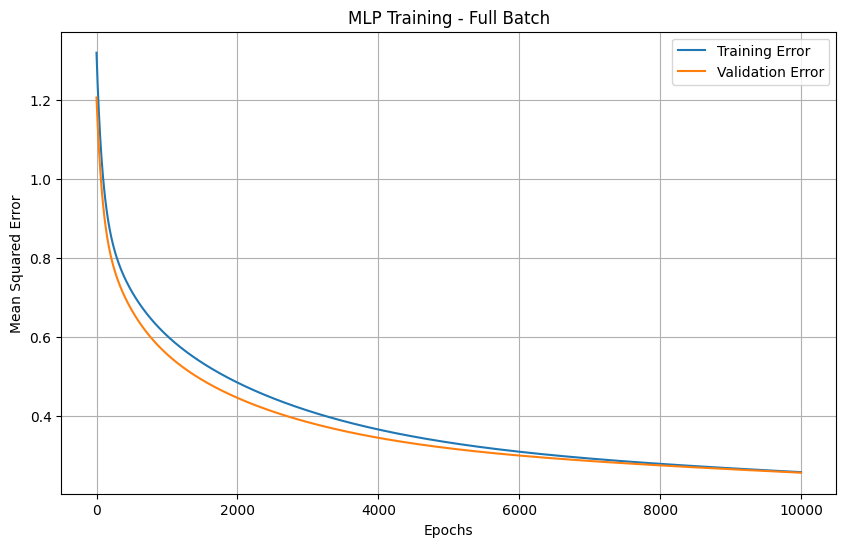

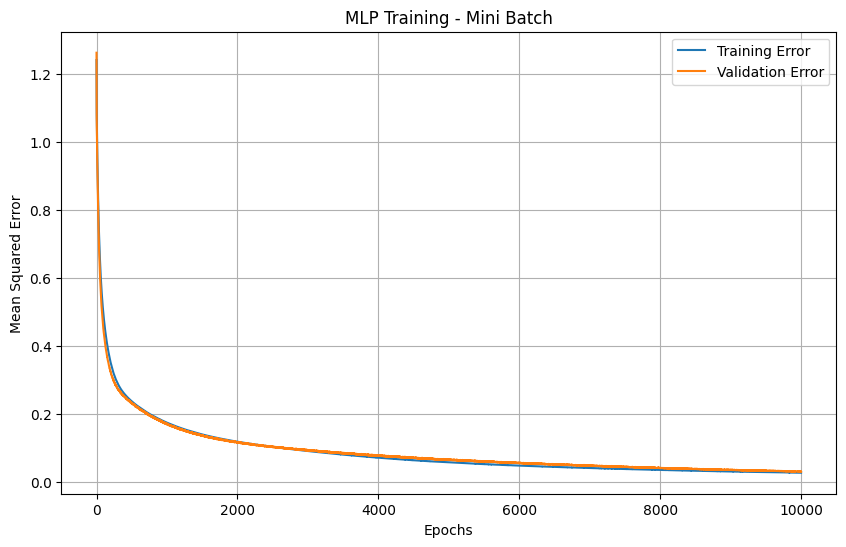

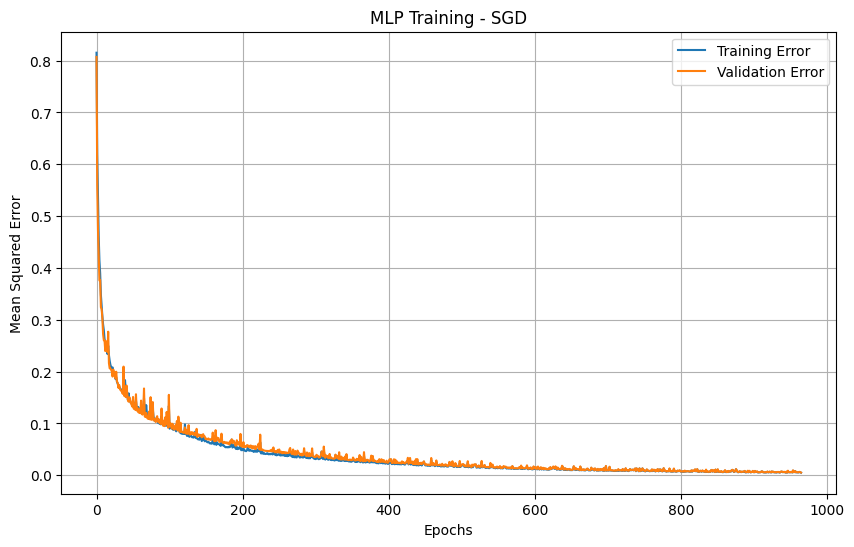

In [75]:
# Full-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Full Batch", val_input=X_test, val_target=Y_test)

# Mini-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Mini Batch", val_input=X_test, val_target=Y_test, batch_size=32)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)


&ensp; Así, se presentan los resultados obtenidos en cada caso:

<div align="center">

| Entrenamiento            | Arquitectura `layers_config` | Activación oculta / salida | Tamaño de batch | $\eta$  | Máx. epochs | Epochs utilizados | *Train Error* | *Test Error* |
|-------------------------:|:----------------------------:|----------------------------|:---------------:|:-------:|:-----------:|:-----------------:|:-------------:|:-------------:|
| *Full-Batch*            | [3, 50, 1]                   | tanh / lineal              |     Full        | 0.001   |   10 000    |      10 000       |       0.2572         |         0.2557       |
| *Mini-Batch*            | [3, 50, 1]                   | tanh / lineal              |      32         | 0.001   |   10 000    |      10 000       |      0.0267          |      0.0303          |
| *SGD*                   | [3, 50, 1]                   | tanh / lineal              |       1         | 0.001   |   10 000    |        965        |      0.0049      |     0.0052      |

</div>

&ensp; Los tres métodos se entrenaron con la misma arquitectura y tasa de aprendizaje, por lo que las diferencias surgen únicamente del esquema de actualización. En el caso de *Full-Batch*, el error de entrenamiento y prueba se mantiene alto (aproximadamente $0.25$) incluso después de las $10000$ *epochs*. Esto muestra que, aunque el método es estable, el avance por actualización es muy pequeño y la convergencia resulta extremadamente lenta, quedando muy lejos del desempeño logrado por los otros enfoques.

&ensp; Utilizando una actualización del tipo *Mini-Batch* con tamaño de *batch* de $32$ el entrenamiento se vuelve más eficiente, ya que el error cae a valores cercanos a $0.03$ tanto en entrenamiento como en prueba, lo que indica una buena capacidad de generalización. Este método permite un aprendizaje más efectivo, logrando una convergencia clara dentro del mismo número máximo de *epochs*.

&ensp; Por último, *SGD* alcanza el mejor desempeño con errores cercanos a $0.005$ y además lo hace en solo $965$ *epochs*. Sin embargo, su naturaleza estocástica genera un comportamiento particular, la curva de error presenta ruido y oscilaciones visibles durante el entrenamiento, producto de actualizar los pesos muestra a muestra. Ese ruido no impide la convergencia; de hecho, puede favorecerla al acelerar el descenso y evitar estancamientos en mínimos locales como en este caso. 

**(B). Estudie la evolución de los errores durante el entrenamiento de una red con una capa oculta de $30$ neuronas cuando el conjunto de entrenamiento contiene $40$ muestras. ¿Qué ocurre si el minibatch tiene tamaño $40$? ¿Y si tiene tamaño $1$?**

&ensp; Para este ejercicio se generó un conjunto de datos sintético con `n_samples = 100`, del cual el $40\%$ se utilizó para entrenamiento. Esto da como resultado un conjunto de $40$ muestras de entrenamiento y $60$ de prueba, que impone un escenario pequeño y sensible a la forma en que se actualizan los pesos durante el aprendizaje.

In [76]:
n_samples = 100
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.4)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

&ensp;  Sobre este conjunto se entrena una red neuronal con una sola capa oculta de $30$ neuronas, analizando cómo evoluciona el error según el tamaño del minibatch utilizado.

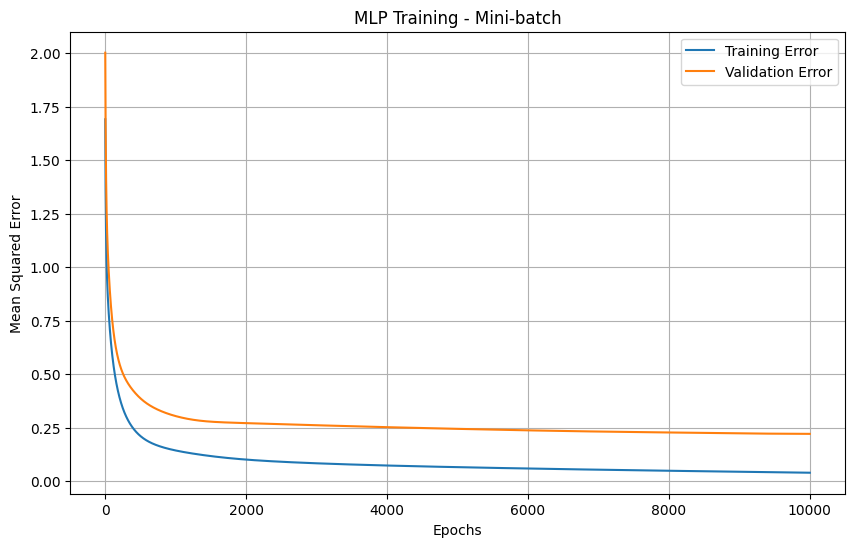

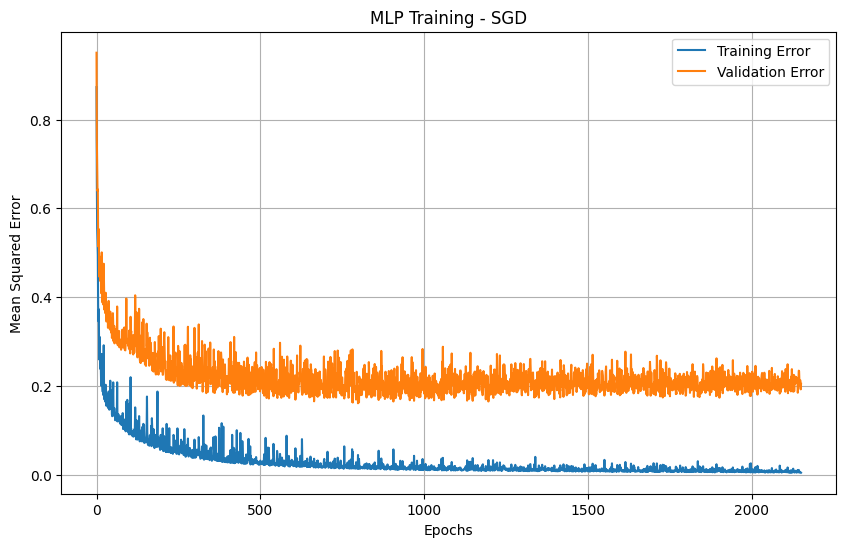

In [77]:
# Mini-batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - Mini-batch", val_input=X_test, val_target=Y_test, batch_size=40)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)

&ensp; A partir de esto, se tienen los siguientes resultados:

<div align="center">

| Entrenamiento            | Arquitectura `layers_config` | Activación oculta / salida | Tamaño de batch | $\eta$  | Máx. epochs | Epochs utilizados | *Train Error* | *Test Error* |
|-------------------------:|:----------------------------:|----------------------------|:---------------:|:-------:|:-----------:|:-----------------:|:-------------:|:-------------:|
| *Mini-Batch*            | [3, 30, 1]                   | tanh / lineal              |     40          | 0.01   |   10 000    |      10 000       |       0.0390         |         0.2207       |
| *SGD*                   | [3, 30, 1]                   | tanh / lineal              |       1         | 0.01   |   10 000    |        965        |      0.0048      |     0.2051      |

</div>

&ensp; Como ya se ha mencionado, se utilizó la arquitectura **[3, 30, 1]** con una tasa de aprendizaje $\eta = 0.01$ y un conjunto de entrenamiento extremadamente reducido de solo $40$ muestras. Con un *batch size* de $40$, el entrenamiento equivale a un esquema *Full-Batch*, donde solo se realiza una actualización por época. En este caso, el error de entrenamiento alcanza un valor de $0.0390$, pero el error de prueba asciende a $0.2207$, mostrando una clara falta de capacidad de generalización. Esto no solo refleja la lentitud del método, que avanza de manera suave pero poco eficiente, sino también que la red está siendo entrenada con muy pocos datos y luego evaluada sobre un conjunto de prueba incluso mayor que el de entrenamiento, por lo que no dispone de información suficiente para aprender patrones que generalicen correctamente más allá de esas $40$ muestras.

&ensp; Por otro lado, cuando el *batch size* es de $1$, el entrenamiento pasa al régimen de *Stochastic Gradient Descent*. Tal como se mencionó en el inciso anterior, este método introduce ruido en la evolución del error debido a su naturaleza estocástica, generando oscilaciones visibles durante el aprendizaje. Aun así, converge más rápido, finalizando a los $965$ *epochs*, con un error de entrenamiento muy bajo de $0.0048$. Sin embargo, el error de prueba sigue siendo elevado, con un valor de $0.2051$. Esto vuelve a poner en evidencia que, al entrenar con tan pocas muestras, la red tiende a ajustar excesivamente los datos disponibles sin lograr capturar una representación que generalice adecuadamente. En otras palabras, el problema no es solo el método de actualización, sino el hecho de que se está testeando sobre muchas más muestras de las que se usan para entrenar, lo que explica que el error de *testeo* sea tan alto en ambos casos.

&ensp; A modo de conclusión y en relación con la pregunta del punto actual, cuando el minibatch tiene tamaño $40$, el entrenamiento se comporta como *Full-Batch*: la curva de error es estable y sin ruido, pero el aprendizaje es lento y puede resultar ineficiente en términos de convergencia. En cambio, cuando el minibatch tiene tamaño $1$, se obtiene un entrenamiento del tipo *SGD*, donde el error evoluciona con fluctuaciones ruidosas y la convergencia en términos de *epochs* puede ser más rápida, a costa de una trayectoria irregular con fluctuaciones.

---

<div style="text-align: left;">
  <h3><b>Base teórica - Máquina de Boltzmann</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp; La Máquina de Boltzmann fue introducida en $1985$ por Geoffrey Hinton, David Ackley y Terrence Sejnowski como uno de los primeros modelos neuronales estocásticos con fundamento explícito en la física estadística. Su nombre hace referencia a Ludwig Boltzmann y a la distribución que inspira su formulación probabilística. La idea central del modelo es aprender una distribución conjunta sobre los datos, asignando mayor probabilidad a las configuraciones que se observan con frecuencia en el entorno de entrenamiento. 

&ensp; A diferencia de las arquitecturas *feedforward*, la Máquina de Boltzmann está formada por neuronas binarias conectadas entre sí mediante pesos simétricos:

$$
w_{ij} = w_{ji}
$$

lo que convierte a la red en un sistema completamente recurrente, sin un flujo direccional de información. Cada neurona se actualiza de manera estocástica, reflejando un proceso de exploración del espacio de estados similar al comportamiento de sistemas físicos en equilibrio térmico. Este enfoque permitió, por primera vez, vincular redes neuronales con principios probabilísticos formales, sentando las bases teóricas de los modelos generativos en aprendizaje automático.

&ensp;

<div style="text-align: left;">
  <h4><b>Función de energía y distribución de probabilidad</b></h4>
</div>

&ensp; Cada configuración del estado de la red posee una energía asociada. Para un vector de activaciones $\mathbf{v}$, la energía se define como:

$$
E(\mathbf{v}) = -\frac{1}{2} \sum_{i}\sum_{j} w_{ij} v_i v_j - \sum_i b_i v_i
$$

&ensp; Las configuraciones con energía baja son más probables, y esta relación se modela mediante la distribución de Boltzmann:

$$
P(\mathbf{v}) = \frac{e^{-E(\mathbf{v})}}{\sum_{\mathbf{v}} e^{-E(\mathbf{v})}}
$$

Este marco convierte al modelo en un sistema estadístico capaz de representar dependencias complejas entre variables.

&ensp;

<div style="text-align: left;">
  <h4><b>Dinámica estocástica</b></h4>
</div>

&ensp; Las neuronas se actualizan probabilísticamente en función del estado del resto de la red:

$$
P(v_i = 1) = \sigma\!\left(\sum_j w_{ij} v_j + b_i\right)
$$

donde $\sigma(\cdot)$ es la sigmoide logística. Esto permite explorar configuraciones alternativas y evita quedar atrapado en mínimos locales, a costa de un proceso de simulación lento.

&ensp;

<div style="text-align: left;">
  <h3><b>Base teórica - Máquina de Boltzmann Restringida (RBM)</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp; La Máquina de Boltzmann Restringida (RBM) surge como una evolución directa del modelo original. Su estructura fue propuesta inicialmente por Paul Smolensky en $1986$ bajo el nombre de *harmonium*, y posteriormente retomada y formalizada por Geoffrey Hinton y colaboradores como una versión más simple y entrenable de la Máquina de Boltzmann completa. El objetivo fue resolver una limitación histórica: el costo computacional extremadamente alto del entrenamiento del modelo original.

&ensp; La RBM organiza la red en dos capas:

- Capa visible $\mathbf{v}$, que representa los datos observables.
- Capa oculta $\mathbf{h}$, que aprende dependencias latentes.

La restricción clave es que no existen conexiones dentro de una misma capa, solo conexiones entre visibles y ocultas, lo cual elimina ciclos directos y simplifica significativamente el modelo. Esta estructura se muestra en la Figura $3$ y constituye el elemento que permitió, años más tarde, desarrollar métodos de entrenamiento prácticos como *Contrastive Divergence*, impulsando el uso real de las RBMs en aprendizaje profundo.

<center>
<figure> <img src="https://cdn.jsdelivr.net/gh/felipeperassi/Neural-Networks@9acd5afb38676865c25644a4c57b5565a8ae6314/NN-Models/ReportImages/RBM.png" alt="Estructura de una RBM" width="900"> <figcaption><i>Figura 3.</i> Estructura de una RBM.</figcaption> </figure>
</center>

&ensp; Esta estructura elimina ciclos directos y simplifica la energía del sistema de la siguiente forma:

$$
E(\mathbf{v},\mathbf{h}) = -\sum_i b_i v_i - \sum_j c_j h_j - \sum_{i,j} v_i w_{ij} h_j
$$

&ensp;

<div style="text-align: left;">
  <h4><b>Independencia condicional</b></h4>
</div>

&ensp; Gracias a la restricción estructural, las unidades visibles son condicionalmente independientes entre sí dado $\mathbf{h}$ y las ocultas son independientes entre sí dado $\mathbf{v}$. Esto permite muestrear alternadamente ambas capas:

$$
P(h_j = 1|\mathbf{v}) = \sigma(W^\top \mathbf{v} + \mathbf{c})
$$

$$
P(v_i = 1|\mathbf{h}) = \sigma(W \mathbf{h} + \mathbf{b})
$$

Este resultado es esencial porque hace posible un entrenamiento eficiente, como se describe a continuación.

&ensp;

<div style="text-align: left;">
  <h4><b>Entrenamiento</b></h4>
</div>

&ensp; La regla de aprendizaje mantiene la misma lógica fundamental que en la Máquina de Boltzmann general: los parámetros del modelo se ajustan reforzando las correlaciones presentes en los datos reales y debilitando aquellas generadas internamente por el modelo. En el caso de los pesos, esto se expresa como:

$$
\Delta W = \eta \left( \langle \mathbf{v}\mathbf{h}^\top \rangle_{\text{datos}} - \langle \mathbf{v}\mathbf{h}^\top \rangle_{\text{modelo}} \right)
$$

&ensp; De forma coherente con este principio, los *bias* también se actualizan comparando las activaciones promedio bajo los datos reales y bajo el modelo:

- **Bias visible:**
$$
\Delta \mathbf{b} = \eta \left( \langle \mathbf{v} \rangle_{\text{datos}} - \langle \mathbf{v} \rangle_{\text{modelo}} \right)
$$

- **Bias oculto:**
$$
\Delta \mathbf{c} = \eta \left( \langle \mathbf{h} \rangle_{\text{datos}} - \langle \mathbf{h} \rangle_{\text{modelo}} \right)
$$

&ensp; Sin embargo, a diferencia de la Máquina de Boltzmann completa, en una RBM estas expectativas pueden aproximarse de manera eficiente mediante el algoritmo *Contrastive Divergence*. En su versión más simple, *CD-1*:

1. Se fija $\mathbf{v}$ a un dato real.

2. Se muestrea $\mathbf{h}$ desde $P(\mathbf{h}|\mathbf{v})$.

3. Se reconstruye $\tilde{\mathbf{v}}$ desde $P(\mathbf{v}|\mathbf{h})$.

4. Se vuelve a muestrear $\tilde{\mathbf{h}}$ desde $P(\mathbf{h}|\tilde{\mathbf{v}})$ (fase negativa).

5. Se actualizan los pesos como:

$$
\Delta W = \eta \left( \mathbf{v}\mathbf{h}^\top - \tilde{\mathbf{v}}\tilde{\mathbf{h}}^\top \right), \quad W \leftarrow W + \Delta W
$$

6. Se actualizan los *bias* como:
    
    - *Bias* visible:
      $$
      \Delta \mathbf{b} = \eta \left( \mathbf{v} - \tilde{\mathbf{v}} \right), \quad \mathbf{b} \leftarrow \mathbf{b} + \Delta \mathbf{b}
      $$

    - *Bias* oculto:
      $$
      \Delta \mathbf{c} = \eta \left( \mathbf{h} - \tilde{\mathbf{h}} \right), \quad \mathbf{c} \leftarrow \mathbf{c} + \Delta \mathbf{c}
      $$

&ensp; Este procedimiento evita calcular la constante de partición y hace posible entrenar RBMs de forma práctica y escalable, a diferencia de la Máquina de Boltzmann completa.


---

<div style="text-align: left;">
  <h4><b>Ejercicio 5</b></h4>
</div>

**Siguiendo el trabajo de Hinton y Salakhutdinov ($2006$), entrene una máquina restringida de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de recontrucción durante el entrenamiento, y ejemplos de cada uno de los dígitos reconstruidos.**

&ensp; Una vez presentada la base teórica de la Máquina de Boltzmann Restringida, se implementa la clase $\texttt{RestrictedBoltzmannMachine}$, cuyo objetivo es aprender una representación probabilística de los datos y reconstruir patrones visibles a partir de las activaciones ocultas. A continuación se describen sus métodos principales.

- $\texttt{\_\_init\_\_}$: inicializa los atributos fundamentales del modelo: número de unidades visibles y ocultas, matriz de pesos y *bias*. En esta etapa no se asignan valores definitivos, sino que se prepara la estructura del modelo para ser configurada cuando se conozca la dimensión visible. Esto es consistente con la formulación de una RBM, donde los parámetros $W$, $\mathbf{b}$ y $\mathbf{c}$ son los elementos a aprender durante el entrenamiento.

- $\texttt{train}$: implementa el procedimiento de entrenamiento utilizando *Contrastive Divergence*. El método sigue las fases teóricas de una RBM:

    1. Configuración de $n_{\text{visible}}$, $n_{\text{hidden}}$ e inicialización de parámetros mediante $\texttt{\_\_initialize\_weights}$.

    2. Aleatorización de datos mediante $\texttt{\_\_shuffle\_data}$ para implementar entrenamiento *mini-batch* o estocástico.

    3. Fase positiva: cálculo de $P(\mathbf{h}|\mathbf{v})$ a partir de datos reales.

    4. Fase negativa: reconstrucción $\tilde{\mathbf{v}}$ mediante $P(\mathbf{v}|\mathbf{h})$ y nueva activación oculta $\tilde{\mathbf{h}}$.

    5. Actualización de parámetros según las reglas teóricas:
    $$
      W \leftarrow W + \eta \left( \mathbf{v}\mathbf{h}^\top - \tilde{\mathbf{v}}\tilde{\mathbf{h}}^\top \right)
    $$

    $$
      \mathbf{b} \leftarrow \mathbf{b} + \eta \left( \mathbf{v} - \tilde{\mathbf{v}} \right)
    $$
    
    $$
      \mathbf{c} \leftarrow \mathbf{c} + \eta \left( \mathbf{h} - \tilde{\mathbf{h}} \right)
    $$

&ensp; Registra el error de reconstrucción utilizando el MSE y devuelve la cantidad de *epochs* efectivamente utilizadas junto con el error final, en concordancia con el objetivo de minimizar la diferencia entre datos reales y reconstruidos.

- $\texttt{reconstruct}$: implementa la etapa de inferencia en una RBM. Dado un patrón visible, activa la capa oculta mediante $P(\mathbf{h}|\mathbf{v})$ y luego genera una reconstrucción $\tilde{\mathbf{v}}$ mediante $P(\mathbf{v}|\mathbf{h})$. Este método evalúa qué tan bien el modelo representa los datos sin modificar los parámetros aprendidos.

- $\texttt{\_\_initialize\_weights}$: inicializa los pesos $W$ a partir de una distribución normal de media cero y baja varianza, evitando saturaciones tempranas en la función sigmoide, y fija los *bias* visibles $\mathbf{b}$ y ocultos $\mathbf{c}$ en cero. Esta estrategia es consistente con las prácticas estándar en RBMs.

- $\texttt{\_\_sigmoid}$: implementa la función sigmoide:
    $$
    \sigma(x) = \frac{1}{1 + e^{-x}}
    $$

    que define la probabilidad de activación de cada unidad visible u oculta, acorde con el modelo probabilístico de la RBM.

- $\texttt{\_\_shuffle\_data}$: desordena los patrones de entrada cuando el tamaño del *batch* es menor que el conjunto completo, evitando sesgos derivados del orden de los datos durante el entrenamiento *mini-batch* o estocástico.

- $\texttt{\_\_transform}$: implementa la fase positiva de la RBM. Calcula las probabilidades ocultas:
    $$
    P(\mathbf{h}|\mathbf{v}) = \sigma(W^\top \mathbf{v} + \mathbf{c})
    $$
    y genera un estado oculto binario mediante muestreo estocástico, consistente con la dinámica probabilística del modelo.


- $\texttt{\_\_inverse\_transform}$: implementa la fase negativa o reconstrucción:
    $$
    P(\mathbf{v}|\mathbf{h}) = \sigma(W \mathbf{h} + \mathbf{b})
    $$
    produciendo una reconstrucción de los datos visibles y cerrando el ciclo *CD-1* del entrenamiento.


- $\texttt{\_\_MS\_error}$: calcula el error cuadrático medio entre el patrón original y su reconstrucción:
    $$
    E = \frac{1}{N} \sum (v - \tilde{v})^2
    $$
    sirviendo como medida práctica de la fidelidad del modelo respecto a la distribución real de los datos.



In [14]:
class RestrictedBoltzmannMachine:
    
    def __init__(self) -> None:
        self.n_hidden = None
        self.n_visible = None
        self.weights = None
        self.visible_bias = None
        self.hidden_bias = None
        self.errors = None

    def train(self, input, n_hidden, learning_rate, batch_size, max_epochs=1000) -> Tuple[int, float]:
        """
        Train the RBM using Contrastive Divergence.
        """
        N, self.n_visible = input.shape
        self.n_hidden = n_hidden
        self.__initialize_weights()

        self.errors = []
        epoch = 0
        while epoch < max_epochs:
            input_batch = self.__shuffle_data(input, batch_size)

            epoch_error = 0
            real_size = 0
            for start in range(0, N, batch_size):
                end = start + batch_size
                input_state = input_batch[start:end]
                batch_size = input_state.shape[0]

                hidden_prob, hidden_state = self.__transform(input_state)
                recon_prob, recon_state = self.__inverse_transform(hidden_state)
                hidden_prob_recon, _ = self.__transform(recon_state)

                self.weights += learning_rate * ((input_state.T @ hidden_prob - recon_state.T @ hidden_prob_recon) / batch_size)
                self.visible_bias += learning_rate * np.mean(input_state - recon_state, axis=0)
                self.hidden_bias += learning_rate * np.mean(hidden_prob - hidden_prob_recon, axis=0)

                batch_error = self.__MS_error(recon_prob, input_state)
                epoch_error += batch_error * batch_size # Scale by batch size (it can be smaller at the end)
                real_size += batch_size

            epoch += 1
            self.errors.append(epoch_error / real_size)
        
        return epoch, epoch_error / real_size

    def reconstruct(self, input) -> np.ndarray:
        """
        Reconstruct the input data through the RBM.
        """
        _, hidden_state = self.__transform(input)
        recon_prob, _ = self.__inverse_transform(hidden_state)

        return recon_prob
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> None:
        """
        Initialize weights and biases.
        """
        self.weights = np.random.normal(0, 0.01, (self.n_visible, self.n_hidden))
        self.visible_bias = np.zeros(self.n_visible)
        self.hidden_bias = np.zeros(self.n_hidden)

    def __sigmoid(self, x) -> np.ndarray:
        """
        Sigmoid activation function.
        """
        return 1.0 / (1 + np.exp(-x))
    
    def __shuffle_data(self, input, batch_size) -> np.ndarray:
        """
        Shuffle input data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]

        return input

    def __transform(self, input) -> np.ndarray:
        """
        Transform input data to hidden representation.
        """
        hidden_prob = self.__sigmoid(input @ self.weights + self.hidden_bias)
        hidden_state = (hidden_prob >= np.random.rand(*hidden_prob.shape)).astype(float)
        return hidden_prob, hidden_state

    def __inverse_transform(self, hidden) -> np.ndarray:
        """
        Transform hidden representation back to visible data.
        """
        visible_prob = self.__sigmoid(hidden @ self.weights.T + self.visible_bias)
        visible_state = (visible_prob >= np.random.rand(*visible_prob.shape)).astype(float)
        return visible_prob, visible_state
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

&ensp; Luego de haber implementado la clase correspondiente a una RBM y definido su estructura básica de funcionamiento, es útil contar con herramientas auxiliares que permitan trabajar con los datos de entrada, especialmente cuando estos se encuentran en formato de imagen. En este sentido, la función $\texttt{plot\_images}$ se incorpora como un recurso de visualización que facilita la visualización de los patrones utilizados en el modelo.

In [15]:
def plot_images(images, labels) -> None:
    """
    Plots a list of images in a single row.
    """
    if (len(images) == 0):
        raise ValueError("No images to display.")

    elif (len(images) == 1):
        plt.figure(figsize=(3.5, 5))
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')

    else:
        size = (10, 5) if len(images) <= 5 else (20, 10)
        fig, axes = plt.subplots(1, len(images), figsize=size)
        for i, ax in enumerate(axes):
            ax.set_title(f"Label: {labels[i]}", fontsize=10, pad=10)
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

&ensp; Una vez definida la función de visualización, se procede a trabajar con un conjunto de datos real que permita aplicar la RBM sobre patrones significativos. Para este propósito se utiliza el *dataset* **MNIST**, uno de los conjuntos más clásicos y ampliamente empleados en aprendizaje profundo. **MNIST** está compuesto por imágenes en escala de grises de $28 \times 28$ píxeles que representan dígitos manuscritos del $0$ al $9$. En total, contiene $60000$ imágenes para entrenamiento y $10000$ para prueba, cada una acompañada por su etiqueta correspondiente. Su simplicidad, tamaño y naturaleza visual lo convierten en un punto de partida ideal para modelos generativos como las RBMs, ya que permite analizar cómo el modelo representa y reconstruye patrones numéricos reales.

&ensp; En este paso se carga el *dataset* utilizando la función $\texttt{mnist.load\_data}$, dividiéndolo automáticamente en conjuntos de entrenamiento y prueba. Para verificar que los datos hayan sido importados correctamente y observar la apariencia de las imágenes originales, se seleccionan aleatoriamente diez muestras del conjunto de entrenamiento y se visualizan mediante la función $\texttt{plot\_images}$:

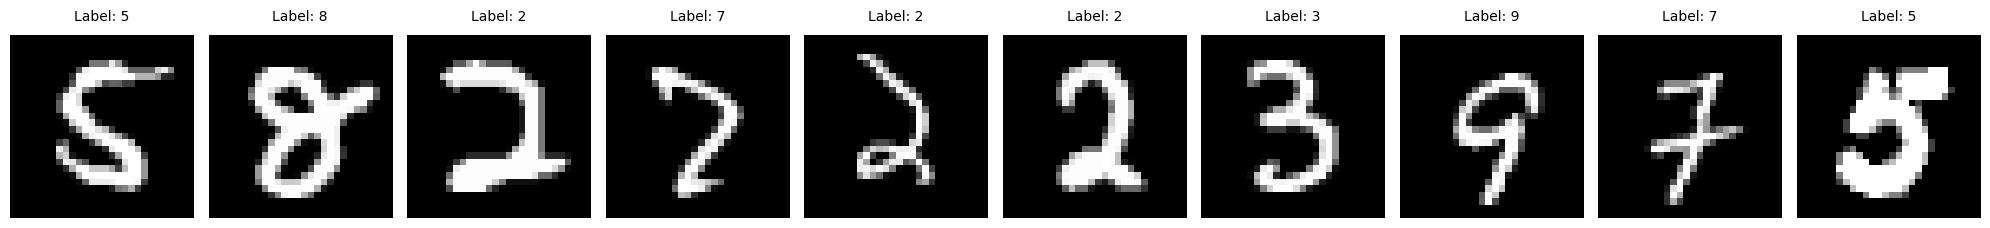

In [16]:
from tensorflow.keras.datasets import mnist # type: ignore

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 10 random images from the training set to verify the data loading
indices = np.random.choice(X_train.shape[0], size=10, replace=False)
plot_images(X_train[indices], Y_train[indices])

&ensp; Para analizar de manera sencilla cómo se comporta la RBM durante el entrenamiento, se incorpora la función $\texttt{plot\_errors\_rbm}$. Esta entrena una RBM con los parámetros indicados y grafica la evolución del MSE a lo largo de las *epochs*. Además, devuelve las reconstrucciones obtenidas sobre el conjunto de prueba, permitiendo continuar luego con una evaluación visual del modelo.

In [ ]:
def plot_errors_rbm(train_set, test_set, n_hidden, learning_rate, batch_size, max_epochs, title)-> np.ndarray:
    """
    Train RBM and plot training error over epochs.
    """

    display(HTML(f"<b>---- Training with {n_hidden} hidden units & lr = {learning_rate} ----</b>"))

    RBM = RestrictedBoltzmannMachine()
    epochs, last_error = RBM.train(train_set, n_hidden, learning_rate, batch_size, max_epochs)
    reconstructions = RBM.reconstruct(test_set)

    plt.figure(figsize=(10, 6))
    plt.plot(RBM.errors, marker='x', label='Training Error')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))

    return reconstructions.reshape(-1, 28, 28)

&ensp; Posteriormente a haber preparado el conjunto de datos y ser entrenada la RBM, se seleccionan diez dígitos aleatorios del conjunto de prueba, uno correspondiente a cada clase del $0$ al $9$. Estas muestras sirven como casos representativos para evaluar el desempeño del modelo, permitiendo observar cómo la RBM procesa y reconstruye distintos patrones numéricos. Antes de la selección, las imágenes se normalizan y se aplanan para adaptarlas al formato de entrada requerido por la red, y posteriormente se visualizan para verificar cuáles serán los dígitos utilizados en la evaluación.

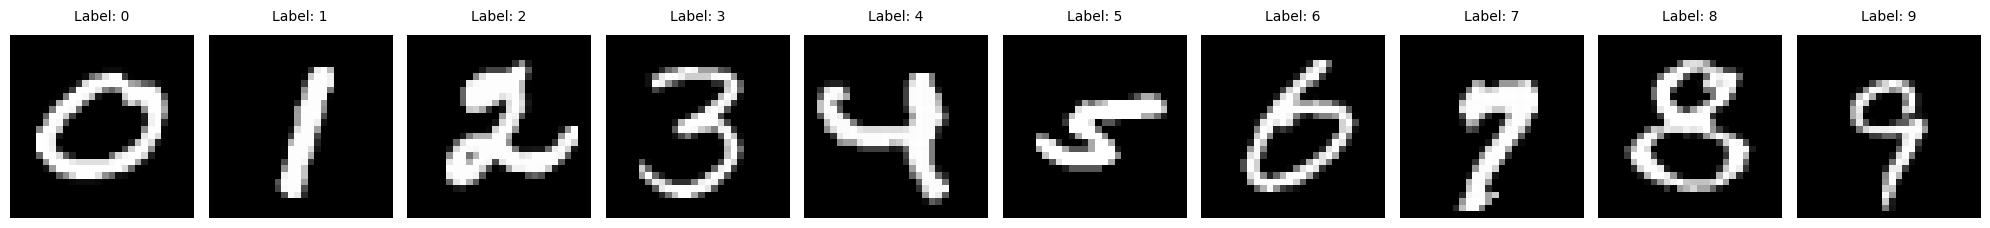

In [17]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

X_test_sample = []
aux_plot = []
Y_test_sample = []
for i in range(10):
    idx = np.where(Y_test == i)[0][np.random.choice(len(np.where(Y_test == i)[0]))] # Get random index for each digit
    X_test_sample.append(X_test[idx])
    Y_test_sample.append(Y_test[idx])
    aux_plot.append(X_test[idx].reshape(28, 28))

plot_images(aux_plot, Y_test_sample)

&ensp; Por último, se realiza una evaluación experimental variando dos hiperparámetros clave de la RBM: la cantidad de unidades ocultas y la tasa de aprendizaje. Para cada combinación de estos valores, el modelo se entrena durante $15$ *epochs* y se registran tanto la evolución del error como las reconstrucciones obtenidas. Este procedimiento permite observar cómo cambia el desempeño de la RBM frente a arquitecturas más grandes o actualizaciones más agresivas y analizar qué configuraciones favorecen una mejor capacidad de reconstrucción sobre los dígitos seleccionados del conjunto de prueba.

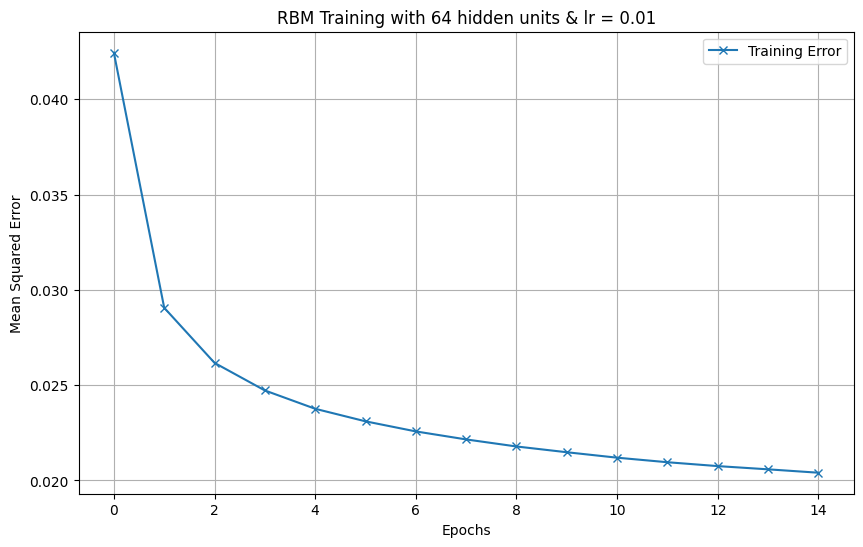

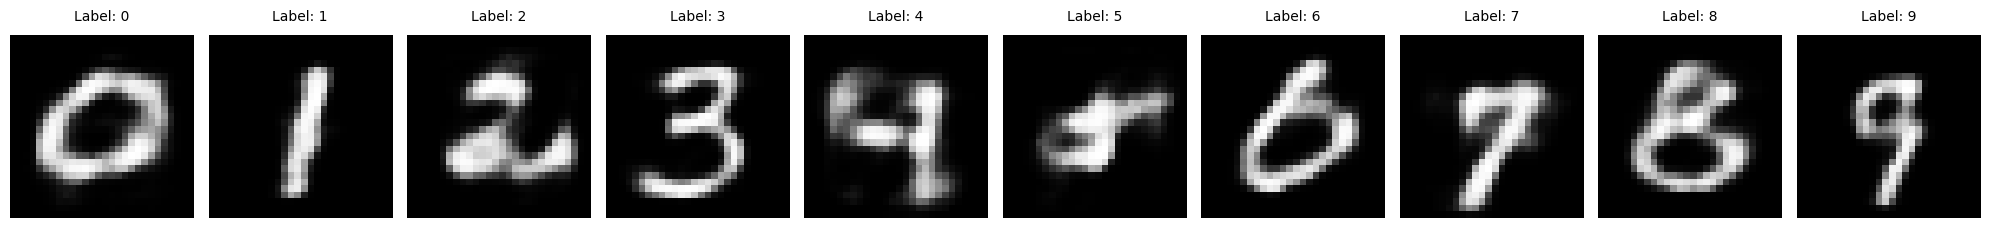

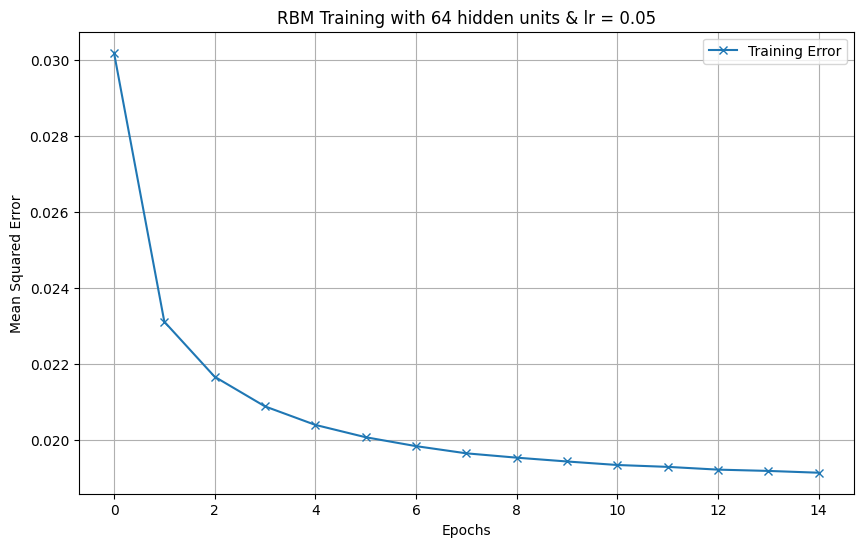

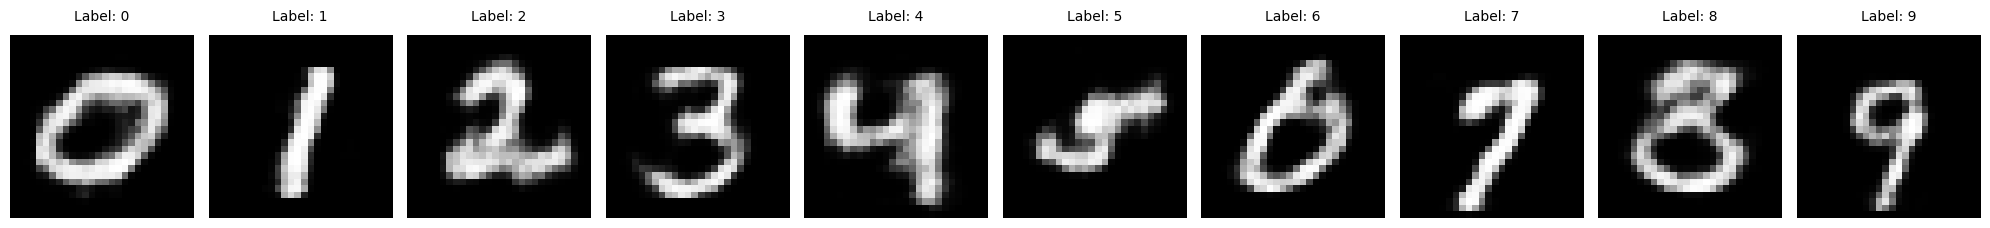

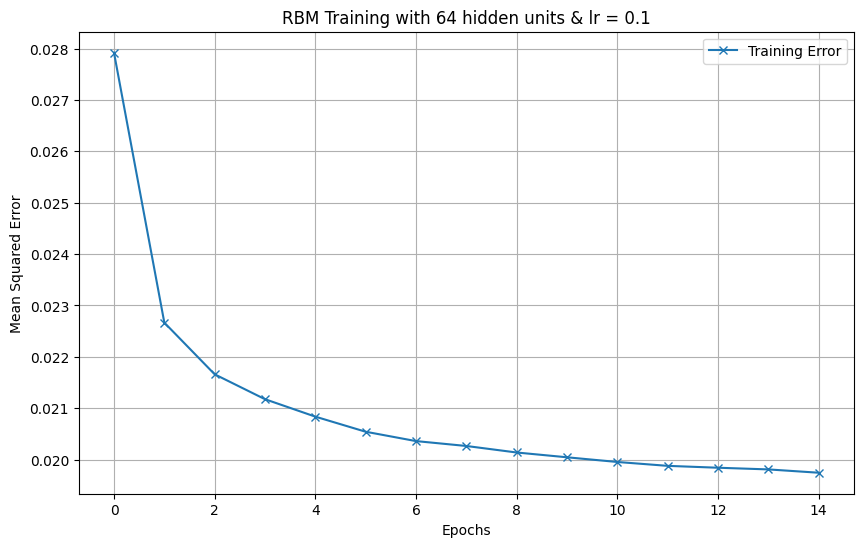

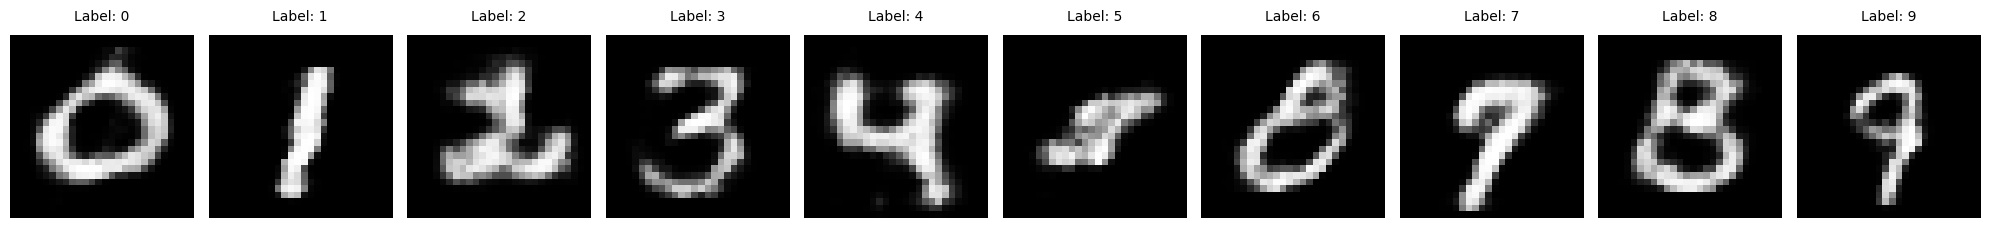

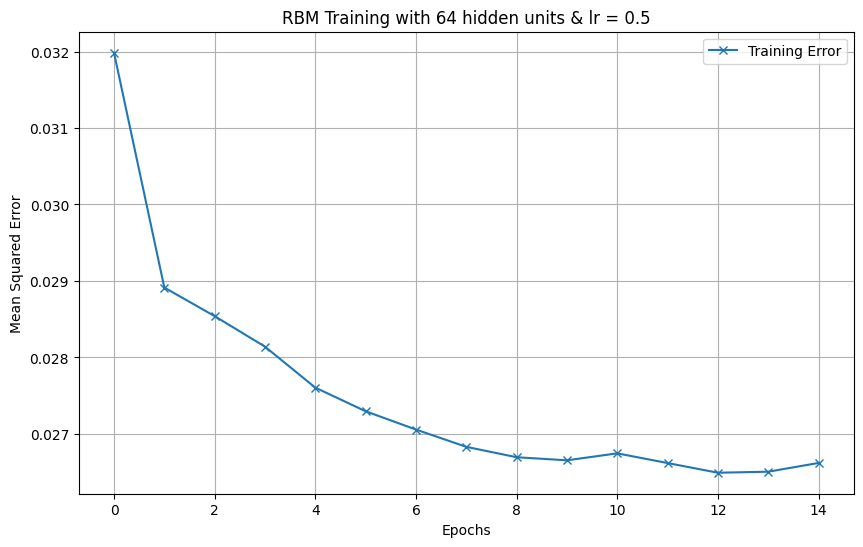

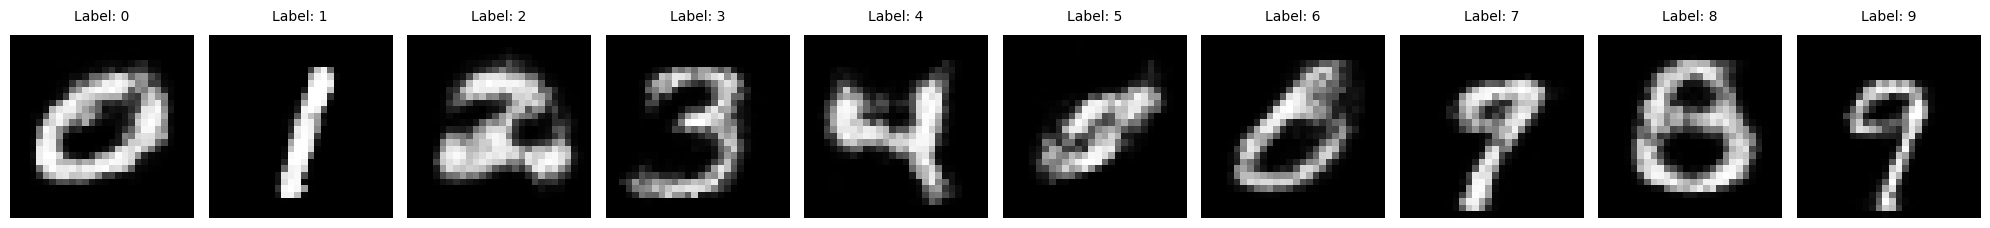

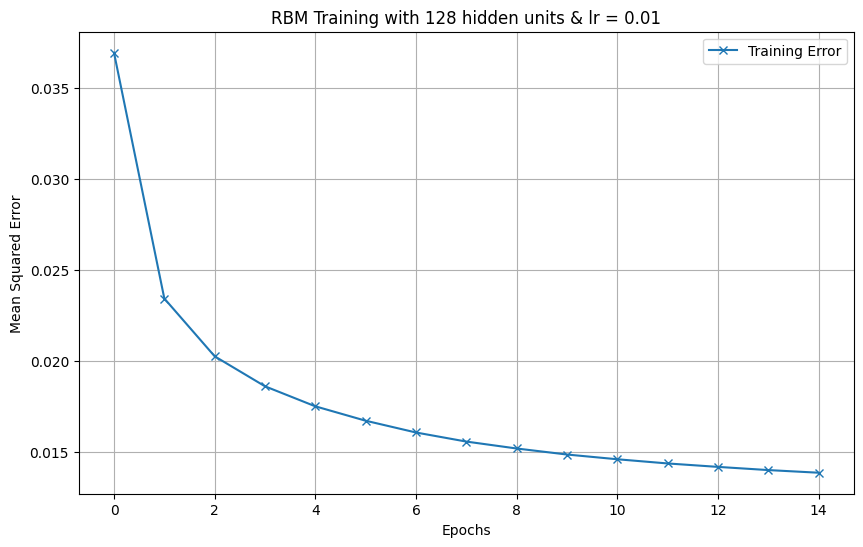

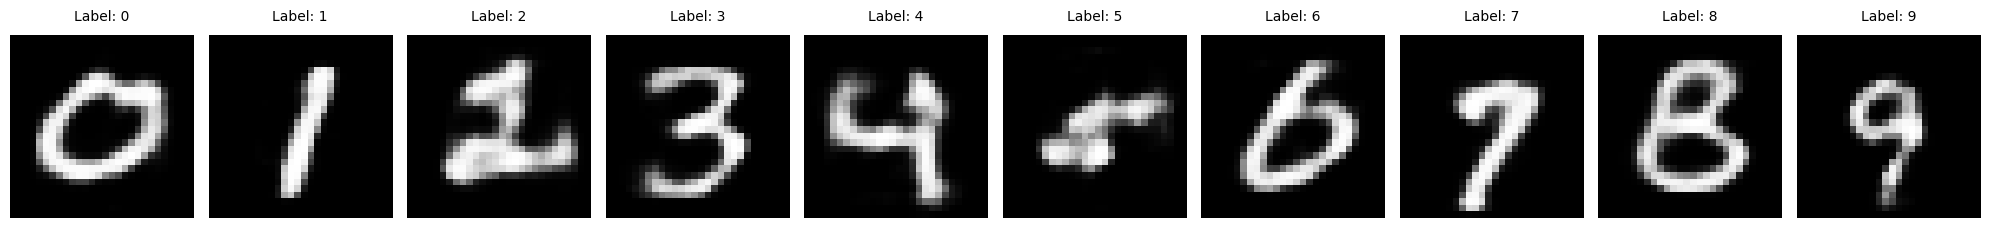

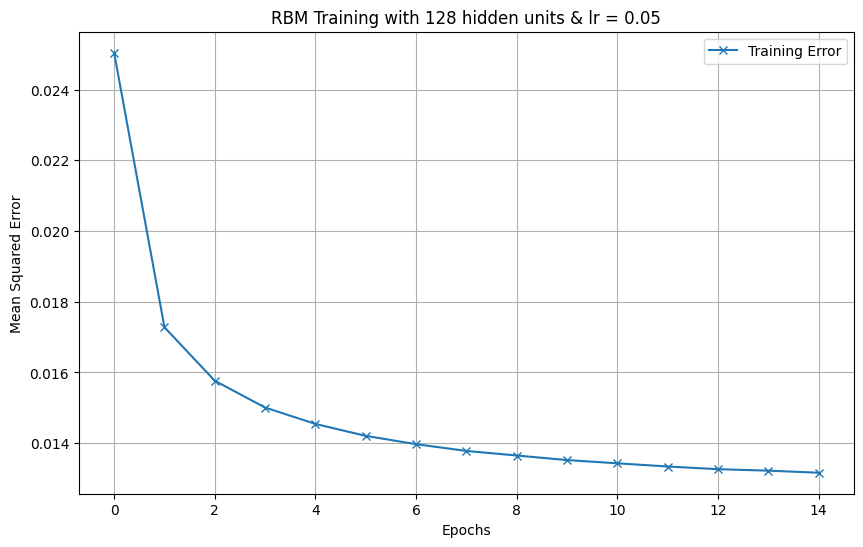

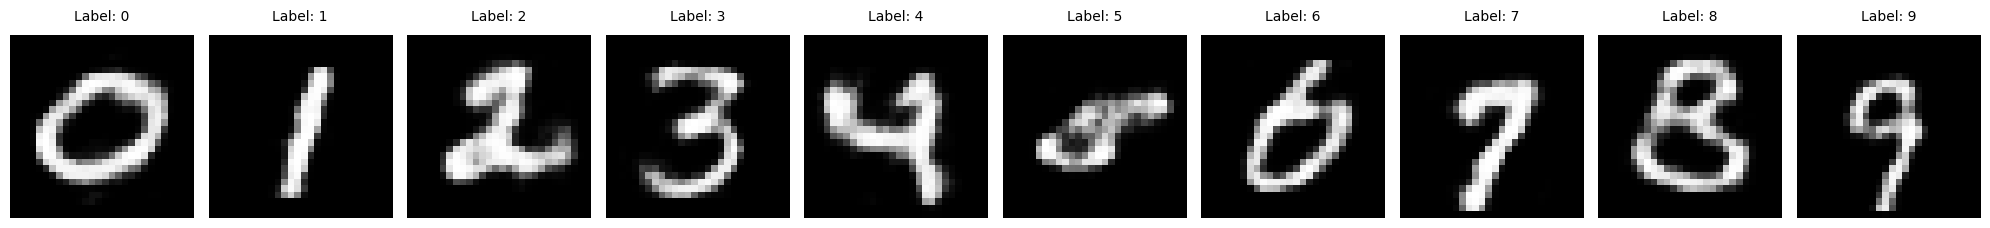

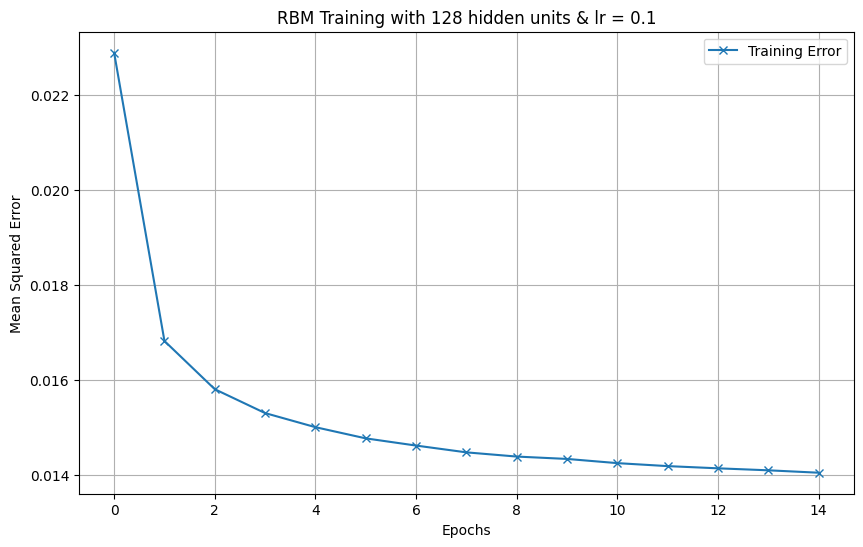

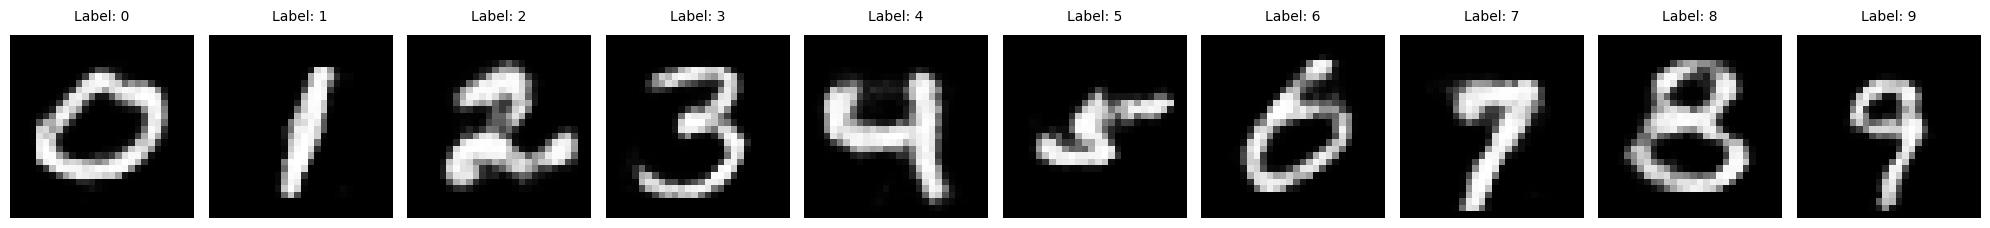

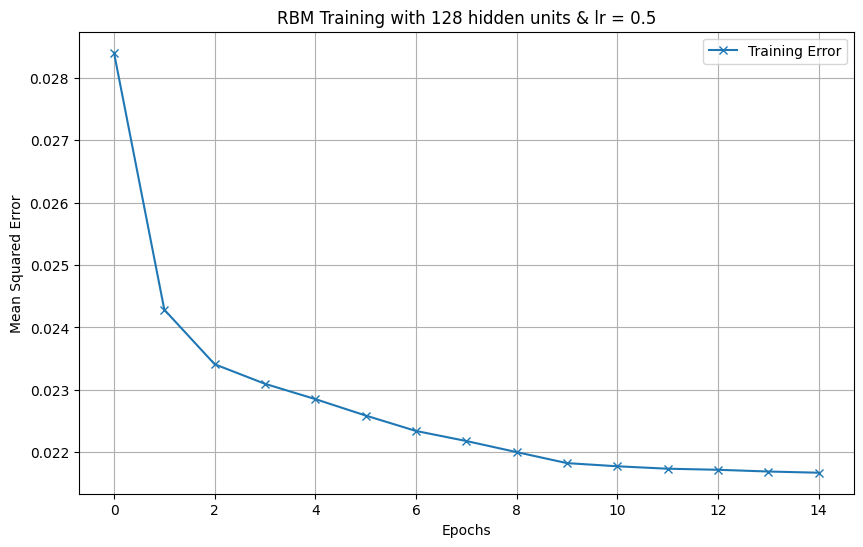

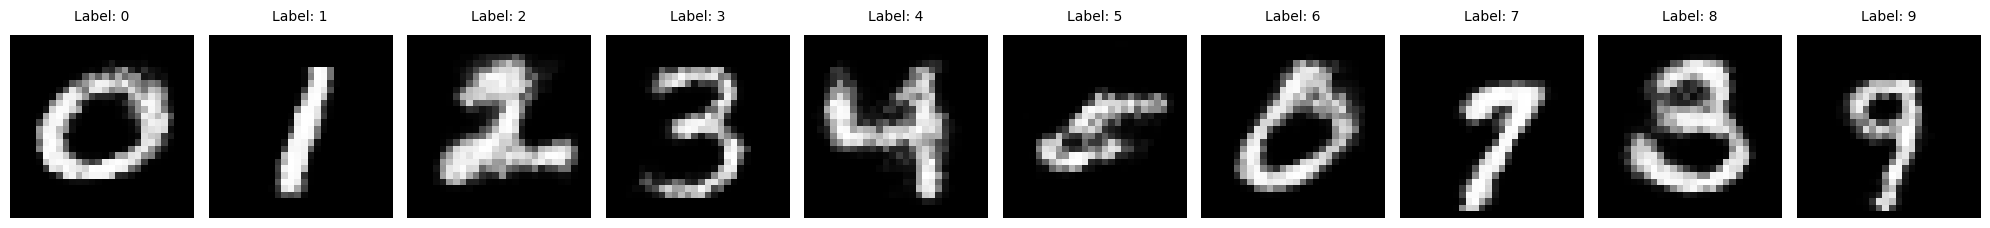

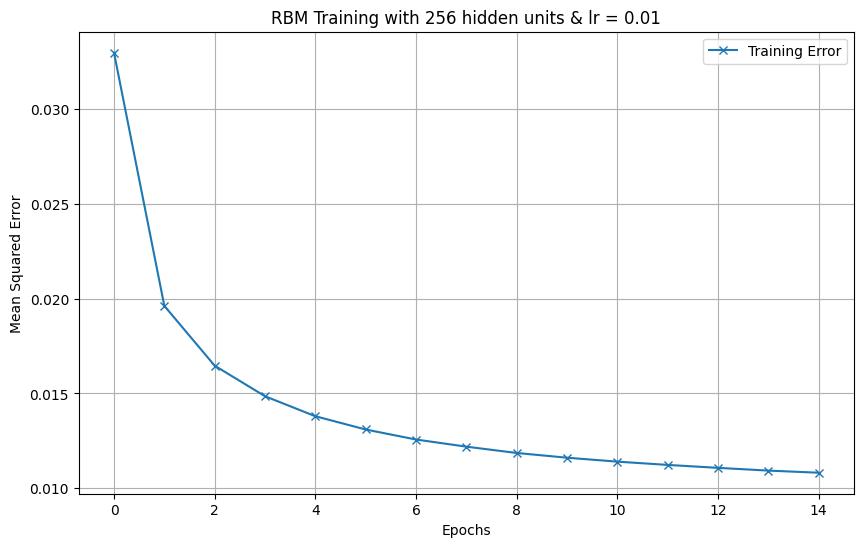

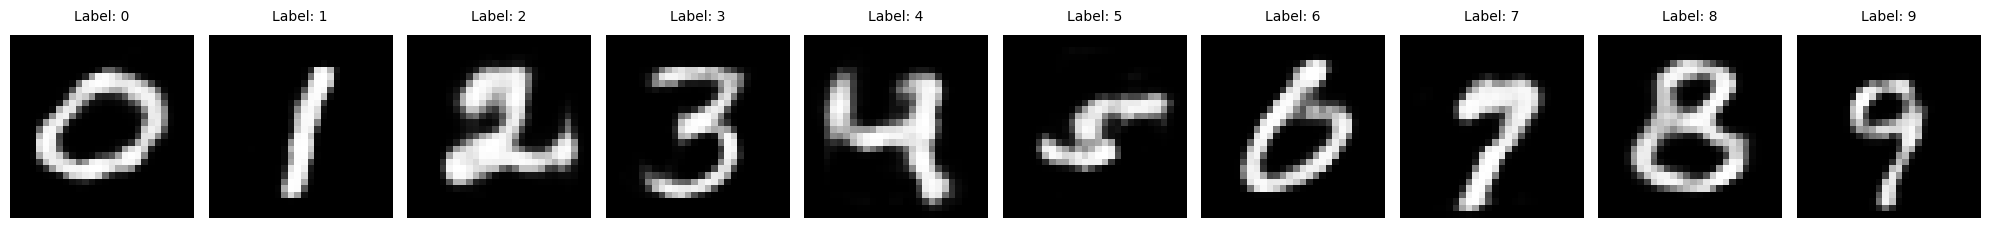

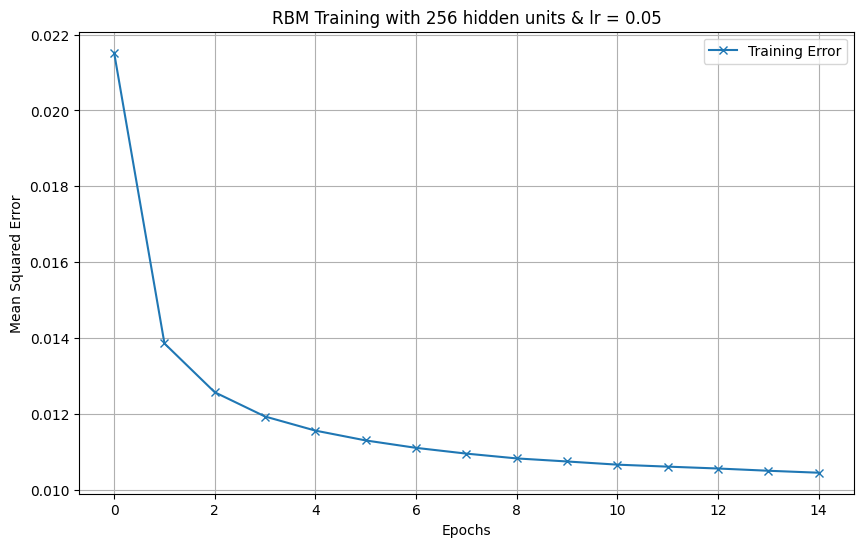

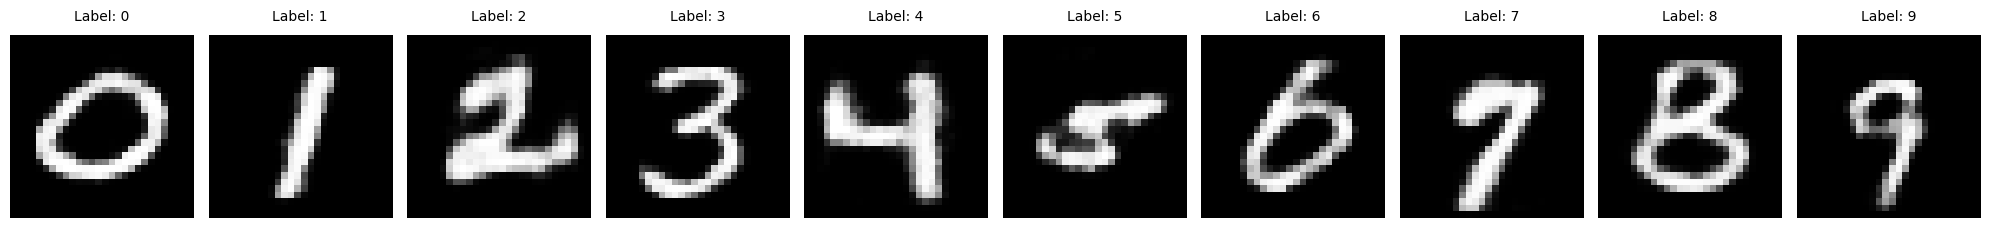

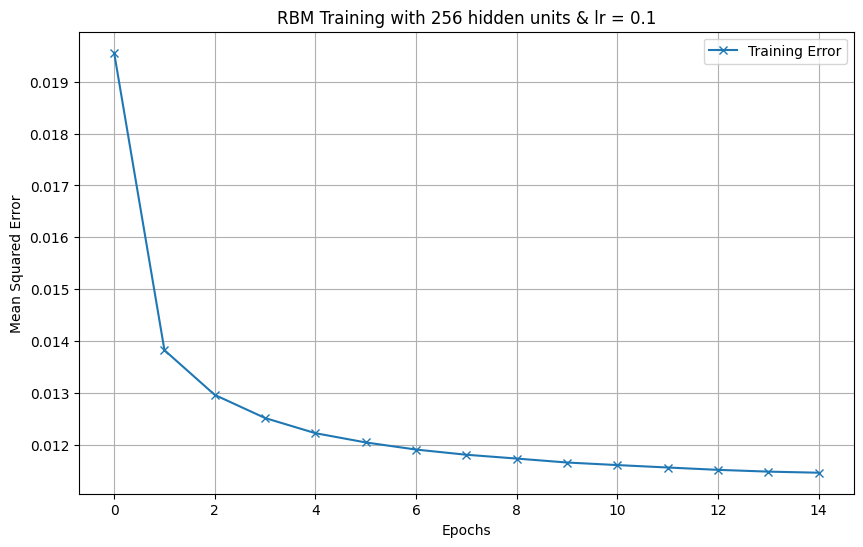

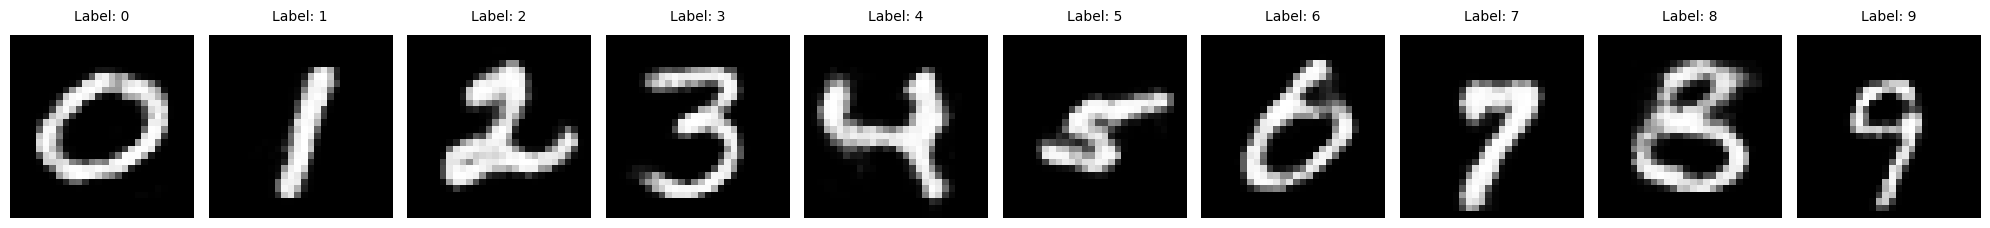

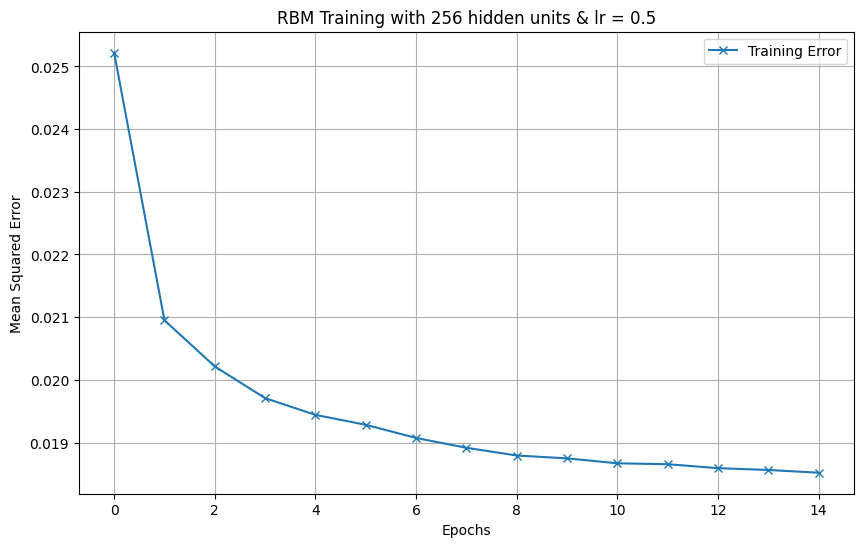

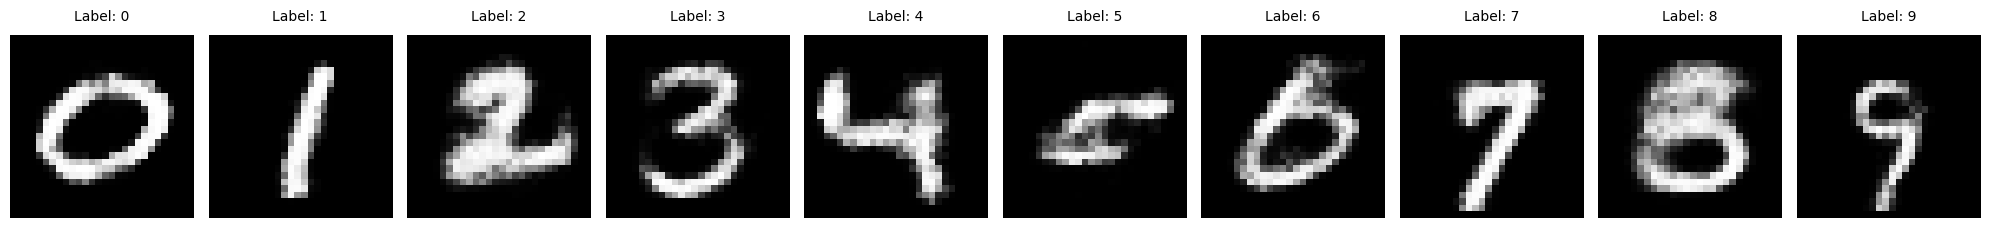

In [21]:
n_hidden = [64, 128, 256]
learning_rates = [0.01, 0.05, 0.1, 0.5]
for nh in n_hidden:
    for lr in learning_rates:
        reconstructions = plot_errors_rbm(X_train, X_test_sample, n_hidden=nh, learning_rate=lr, batch_size=10, max_epochs=15, title=f"RBM Training with {nh} hidden units & lr = {lr}")
        plot_images(reconstructions, Y_test_sample)

&ensp; Los resultados basados en esta simulación se presentan en la tabla que se visualiza a continuación.

<div align="center">

| Modelo | Unidades ocultas (`n_hidden`) | Tamaño de batch | $\eta$ | Máx. epochs | *MSE final* |
|:-------:|:-----------------------------:|:---------------:|:------:|:-----------:|:-----------:|
| *RBM*  | 64                            |       10        | 0.01   |     15      |      0.0204       |
| *RBM*  | 64                            |       10        | 0.05   |     15      |      0.0191       |
| *RBM*  | 64                            |       10        | 0.10   |     15      |      0.0197       |
| *RBM*  | 64                            |       10        | 0.50   |     15      |      0.0266       |
| *RBM*  | 128                           |       10        | 0.01   |     15      |      0.0138       |
| *RBM*  | 128                           |       10        | 0.05   |     15      |      0.0132       |
| *RBM*  | 128                           |       10        | 0.10   |     15      |      0.0140       |
| *RBM*  | 128                           |       10        | 0.50   |     15      |      0.0217       |
| *RBM*  | 256                           |       10        | 0.01   |     15      |      0.0108       |
| *RBM*  | 256                           |       10        | 0.05   |     15      |      0.0104       |
| *RBM*  | 256                           |       10        | 0.10   |     15      |      0.0115       |
| *RBM*  | 256                           |       10        | 0.50   |     15      |      0.0185       |

</div>

&ensp; Al observar la tabla de desempeño de la RBM, se ve una relación clara entre el *learning rate* y el error final. En términos generales, un $\eta$ más chico permite alcanzar errores menores porque las actualizaciones de pesos son más estables y evitan saltos bruscos durante el entrenamiento. Sin embargo, cuando el *learning rate* es demasiado pequeño, como en algunos casos con $\eta = 0.01$, el modelo tiende a estancarse y puede quedar atrapado en mínimos locales, lo que impide seguir mejorando el error. En contraste, valores grandes como $\eta = 0.50$ muestran errores notablemente más altos, indicando un entrenamiento peor y reconstrucciones de menor calidad. Por lo tanto, los valores intermedios, generalmente rondando un $\eta = 0.05$, logran el mejor equilibrio entre estabilidad y capacidad de aprendizaje.

&ensp; También se observa un patrón claro respecto al número de unidades ocultas. A medida que aumenta la cantidad de unidades ocultas, disminuye el error final. Con $64$ unidades ocultas, el error es mayor; con $128$ hay una mejora significativa; y con $256$ unidades ocultas se obtienen los mejores resultados del experimento. Esto es coherente con la idea de que una mayor capacidad representacional permite modelar mejor la estructura de los datos y, en consecuencia, reconstrucciones más precisas.

&ensp; En cuanto a la calidad visual de las reconstrucciones, en general las imágenes se reconstruyen bien y los dígitos resultan reconocibles. Sin embargo, cuando el error ronda valores cercanos a $0.02$ o superiores, aparecen confusiones típicas entre dígitos similares, como $6$ con $8$ o $5$ con $6$, lo que se refleja en bordes menos definidos y trazos más borrosos. Además, con menos unidades ocultas las reconstrucciones son claramente menos nítidas. Las mejores reconstrucciones se obtienen con $256$ unidades ocultas y *learning rate*s entre $0.01$ y $0.10$, lo cual coincide con los valores de error más bajos observados en la tabla.

&ensp; En síntesis, un *learning rate* pequeño tiende a producir errores menores, aunque puede trabarse en mínimos locales si es demasiado chico, mientras que uno demasiado grande empeora el desempeño. Las configuraciones óptimas del experimento se encuentran con $256$ unidades ocultas y valores de $\eta$ entre $0.05$ y $0.10$, logrando los menores errores y las reconstrucciones más nítidas.


---

<div style="text-align: left;">
  <h3><b>Base teórica – Redes Neuronales Convolucionales (CNNs)</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp; Las Redes Neuronales Convolucionales (CNNs, por sus siglas en inglés) constituyen una arquitectura diseñada para procesar datos con estructura espacial, como imágenes, videos o mapas de características. A diferencia de los modelos totalmente conectados, las CNN explotan la localidad, la estructura bidimensional y la correlación espacial presente en los datos, reduciendo la cantidad de parámetros y aprovechando patrones visuales repetitivos.

&ensp; Sus bases conceptuales se remontan al *Neocognitron* de Kunihiko Fukushima en $1980$, aunque su aplicación moderna fue impulsada por Yann LeCun a principios de los años $'90$ con la arquitectura LeNet-5, utilizada para reconocer dígitos manuscritos. Estos desarrollos establecieron el principio central de las CNN: aprender jerárquicamente características visuales, desde bordes simples hasta estructuras complejas.

&ensp;

<div style="text-align: left;">
  <h4><b>Operaciones fundamentales</b></h4>
</div>

&ensp; El funcionamiento de una CNN se basa en una secuencia de operaciones que transforman progresivamente la información visual.

- **Convolución y mapas de características:** la operación principal es la convolución, mediante la cual pequeños filtros o *kernels* se deslizan sobre la imagen para calcular respuestas locales. Para una entrada $I$ y un filtro $K$, se define:

    $$
    S(i,j) = \sum_m \sum_n I(i+m, j+n)\, K(m,n)
    $$

    Cada filtro comparte sus pesos en toda la imagen, lo que reduce drásticamente los parámetros y permite detectar la misma característica sin importar su posición. Cada kernel produce un mapa de características (feature map), y múltiples filtros generan múltiples mapas, aumentando la profundidad de la representación.

- **Función de activación:** tras la convolución, se aplica una función de activación, típicamente ReLU:

    $$
    \text{ReLU}(x) = \max(0,x)
    $$

    lo que introduce no linealidad y evita que la red se comporte como un modelo puramente lineal, permitiendo aprender relaciones visuales complejas.

- **Pooling:** las capas de *pooling* reducen la dimensión espacial de los mapas de características, reteniendo información esencial y otorgando cierta invariancia a traslaciones. La forma más común es el *max-pooling*:

    $$
    S(i,j) = \max_{(m,n)\in \Omega} I(i+m, j+n)
    $$

    lo que mejora la eficiencia computacional y contribuye a reducir el sobreajuste.

- **Capas totalmente conectadas:** en las etapas finales, los mapas de características se aplanan y se envían a una o más capas densas (*fully connected*), que combinan la representación aprendida y producen la salida final, por ejemplo, una clasificación mediante una función softmax.

&ensp; Estas operaciones conforman el núcleo del procesamiento en una CNN: primero se detectan patrones locales mediante convoluciones, luego se incorporan no linealidades a través de funciones de activación y, finalmente, se reduce la información espacial mediante *pooling* para conservar solo las características más relevantes. Al repetirse en múltiples etapas, este mecanismo permite construir representaciones jerárquicas cada vez más abstractas de la imagen original.

&ensp; De manera esquemática, este flujo puede visualizarse como una cadena de bloques que transforma progresivamente la entrada hasta obtener una representación compacta apta para tareas posteriores, como clasificación. La Figura $4$ ilustra esta estructura general y la relación entre las distintas operaciones que componen una CNN.

<center>
<figure> <img src="https://cdn.jsdelivr.net/gh/felipeperassi/Neural-Networks@9acd5afb38676865c25644a4c57b5565a8ae6314/NN-Models/ReportImages/CNNs.jpg" alt="Estructura de una CNN" width="900"> <figcaption><i>Figura 4.</i> Ejemplo de estructura de una CNN para MNIST.</figcaption> </figure>
</center>

&ensp; 

<div style="text-align: left;">
  <h4><b>Entrenamiento</b></h4>
</div>

&ensp; El entrenamiento sigue el esquema del aprendizaje supervisado basado en gradiente descendente. Tras el *forward pass*, se calcula una función de costo (como la entropía cruzada) y se aplica *backpropagation* para ajustar los parámetros. La diferencia clave respecto de las redes densas es que el algoritmo de *backpropagation* atraviesa operaciones de convolución y *pooling*, actualizando únicamente los filtros compartidos y sus *bias*, lo que hace a las CNNs más eficientes y escalables para tareas visuales.



---

<div style="text-align: left;">
  <h4><b>Ejercicio 6</b></h4>
</div>

**Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST. ¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos $90\%$ en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más pequeño que puede conseguir con la misma exactitud?**

&ensp; En este ejercicio se utiliza la librería $\texttt{PyTorch}$, por lo que se recurre directamente a la implementación de MNIST incluida en $\texttt{torchvision.datasets}$. Este módulo permite descargar automáticamente el conjunto de datos, separar las particiones de entrenamiento y prueba y aplicar una transformación inicial a las imágenes (en este caso, convertirlas a tensores normalizados en el rango $[0,1]$). A continuación se definen los datasets y los correspondientes $\texttt{DataLoader}$ para iterar en *minibatche*s sobre los datos, se visualizan algunas imágenes de ejemplo para verificar que la carga se haya realizado correctamente.

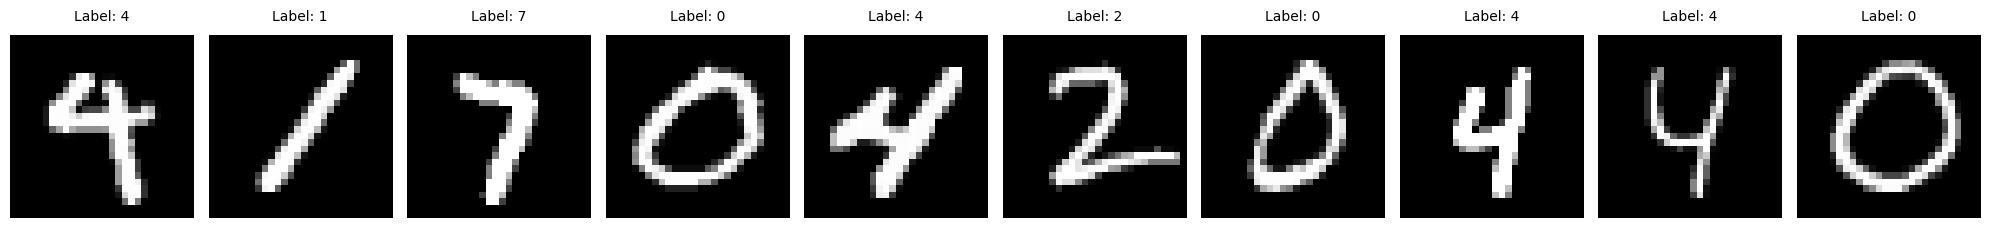

In [22]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Loaders to iterate over the datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 10 random images from the training set to verify the data loading
indices = np.random.choice(len(train_dataset), size=10, replace=False)
plot_images(train_dataset.data[indices], train_dataset.targets[indices])

display(HTML(f"<b>Training shapes:</b> {train_dataset.data.shape}"))
display(HTML(f"<b>Test shapes:</b> {test_dataset.data.shape}"))

&ensp; Con el conjunto de datos ya cargado a partir de las funciones de $\texttt{PyTorch}$, el siguiente paso consiste en definir una serie de funciones auxiliares que permiten modularizar el proceso de entrenamiento y evaluación de los distintos modelos convolucionales que se van a probar. De esta manera, es posible reutilizar la misma rutina de entrenamiento para diferentes arquitecturas y comparar su desempeño de forma ordenada. A continuación se describen brevemente las funciones implementadas:

- $\texttt{count\_params}$: calcula la cantidad total de parámetros entrenables del modelo, pero su interpretación depende del tipo de capa presente en una CNN. En particular:

  - **Capas convolucionales:** cada filtro tiene parámetros asociados al tamaño del kernel y a los canales de entrada. Para una capa con $C_{\text{in}}$ canales de entrada, $C_{\text{out}}$ filtros y un kernel de tamaño $k \times k$, la cantidad de parámetros es:
    $$
    n_\text{params} = \underbrace{k \cdot k \cdot C_{\text{in}} \cdot C_{\text{out}}}_{\text{pesos}} \;+\; \underbrace{C_{\text{out}}}_{\text{biases}}
    $$
    Cada filtro posee un bias, por lo que el número total crece con la cantidad de filtros, pero no con el tamaño espacial de la imagen.

  - **Capas de pooling:** no tienen parámetros entrenables, ya que solo realizan operaciones de reducción espacial (como máximo o promedio). Contribuyen a la arquitectura pero no suman pesos.

  - **Capas completamente conectadas:** si una capa recibe $N_{\text{in}}$ entradas y tiene $N_{\text{out}}$ neuronas, entonces:
    $$
    n_\text{params} = \underbrace{N_{\text{in}} \cdot N_{\text{out}}}_{\text{pesos}} \;+\; \underbrace{N_{\text{out}}}_{\text{biases}}
    $$
    Estas capas suelen concentrar la mayor cantidad de parámetros cuando las activaciones han sido aplanadas.

  De esta forma, esta función permite cuantificar el tamaño real de cada arquitectura y comparar qué tan compacta es una red capaz de alcanzar determinado rendimiento.

- $\texttt{train\_model}$: ejecuta una época completa de entrenamiento. Recorre los batches del `train_loader`, realiza el *forward pass*, calcula la pérdida, aplica $\texttt{backward}$ y actualiza los parámetros. Este proceso utiliza dos componentes clave:

  - **Optimizer Adam:** Adam es un método de gradiente descendente adaptativo. Ajusta la tasa de aprendizaje de cada parámetro en función de estimaciones de primer y segundo momento del gradiente, lo que acelera la convergencia y mejora la estabilidad frente a gradientes ruidosos. Se utiliza esta forma de actualización dado que permite tener menos parámetros entrenables, como se pide en la consigna.
  
  - **Cross-Entropy Loss:** es la función de pérdida estándar para clasificación multiclase. Mide la diferencia entre la distribución predicha por la red y la etiqueta verdadera. Para una muestra con etiqueta $y$ y salida del modelo $\hat{p}(y)$:
    $$
    L = -\log \hat{p}(y)
    $$
    Penaliza fuertemente predicciones con baja probabilidad para la clase correcta y favorece modelos con mayor confianza.

  La función devuelve la pérdida promedio al finalizar la época.

- $\texttt{test\_model}$: evalúa el modelo sobre el conjunto de prueba sin modificar los parámetros. Calcula la salida de la red, toma la clase con mayor probabilidad y calcula la exactitud total como porcentaje de aciertos. Aunque no realiza actualizaciones, refleja el desempeño real del modelo sobre datos no vistos.

- $\texttt{train\_and\_test\_model}$: combina entrenamiento y evaluación en un ciclo de varias *epochs*. Inicializa el modelo en CPU o GPU, define Adam como optimizador y *Cross-Entropy Loss* como función de costo. En cada época llama a $\texttt{train\_model}$ y $\texttt{test\_model}$, mostrando la evolución del error de entrenamiento y la exactitud en el conjunto de evaluación, lo que permite monitorear desempeño y detectar mejoras o estancamientos.

In [32]:
def count_params(model) -> int:
    """
    Count the number of trainable parameters in a model.
    """
    return sum(param.numel() for param in model.parameters() if param.requires_grad)

def train_model(model, train_loader, optimizer, criterion, device) -> float:
    """
    Train the given model using the provided data loader, optimizer, and loss criterion.
    """
    model.train()
    
    loss_batch = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        
        outputs = model(X)              # Forward pass
        loss = criterion(outputs, y)    # Compute loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

        loss_batch += loss.item()

    return loss_batch / len(train_loader)

def test_model(model, test_loader, device) -> float:
    """
    Test the given model using the provided test data loader, returning the accuracy.
    """
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1) # Predicted class
            
            correct += (preds == y).sum().item()
            total += y.size(0)
    
    return 100 * correct / total

def train_and_test_model(model, train_loader, test_loader, epochs=15, lr=1e-3) -> None:
    """
    Train & test the given model using the provided data loaders.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Better than SGD
    criterion = nn.CrossEntropyLoss()
    
    epoch = 0
    while epoch < epochs:
        train_loss = train_model(model, train_loader, optimizer, criterion, device)
        accuracy = test_model(model, test_loader, device)

        epoch += 1
        display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Loss: {train_loss:.2f} || Accuracy: {accuracy:.2f}%"))
        if accuracy > 90:
            epoch = epochs  # Early stopping if accuracy > 90%
        

&ensp; Luego de definir las funciones auxiliares, se procede a presentar las estructuras desarrolladas para obtener una *accuracy* de aproximadamente el $90 \%$ con la menor cantidad de **parámetros**.

- $\texttt{CNN946}$: este es el primer modelo desarrollado, utilizado como punto de partida para evaluar la relación entre cantidad de parámetros y desempeño. Se trata de una arquitectura CNN estándar con dos convoluciones seguidas de *max-pooling* y una capa totalmente conectada. Su objetivo est establecer una referencia para comparar arquitecturas más compactas sin sacrificar *accuracy*.

<div align="center">

|    **Capa**   |       **Tipo**      | **Kernel** | $C_\text{in} \rightarrow C_\text{out}$ | **Función**                       | **Parámetros** |
| :-------: | :-------------: | :----: | :--------------: | ----------------------------- | ---------: |
|    `c1`   |      Conv2D     |   5×5  |       1 → 6      | Detectar patrones básicos     |        156 |
| `maxpool` |     MaxPool     |   2×2  |       6 → 6      | Reducir resolución            |          0 |
|    `c2`   |      Conv2D     |   3×3  |      6 → 12      | Capturar rasgos más complejos |        660 |
|   `gap`   | Global Avg Pool |    —   |      12 → 12     | Resumir cada mapa en un valor |          0 |
|    `fc`   |      Linear     |    —   |      12 → 10     | Clasificación final           |        130 |
| **Total** |                 |        |                  |                               |    **946** |

</div>

- $\texttt{CNNBN538}$: con el fin de reducir la cantidad de parámetros sin perder capacidad, se evalua la arquitectura $\texttt{CNNBN538}$. Esta introduce una convolución $1\times1$ tipo *bottleneck*, cuyo rol es comprimir los canales antes de la segunda convolución, disminuyendo drásticamente el costo paramétrico. De esta manera, se logra mantener una estructura CNN similar a la original, pero con una reducción significativa hasta $538$ parámetros, conservando un desempeño competitivo.

<div align="center">

|  **Capa** |     **Tipo**    | **Kernel** | $C_\text{in} \rightarrow C_\text{out}$ | **Función**                    | **Parámetros** |
| :-------: | :-------------: | :--------: | :------------------------------------: | ------------------------------ | -------------: |
|    `c1`   |      Conv2D     |     5×5    |                  1 → 5                 | Extraer rasgos iniciales       |            130 |
| `maxpool` |     MaxPool     |     2×2    |                  5 → 5                 | Reducir tamaño espacial        |              0 |
|    `b1`   |    Conv2D 1×1   |     1×1    |                  5 → 3                 | Comprimir canales (*bottleneck*) |             18 |
|    `c2`   |      Conv2D     |     3×3    |                 3 → 10                 | Recuperar capacidad expresiva  |            280 |
|   `gap`   | Global Avg Pool |      —     |                 10 → 10                | Vectorizar características     |              0 |
|    `fc`   |      Linear     |      —     |                 10 → 10                | Clasificación final            |            110 |
| **Total** |                 |            |                                        |                                |        **538** |


</div>

- $\texttt{CNNDW556}$: buscando un enfoque alternativo, se estudia la arquitectura $\texttt{CNNDW556}$, que reemplaza una convolución estándar por un bloque *depthwise* sumado a uno *pointwise*. Este mecanismo, inspirado en arquitecturas eficientes como MobileNet, separa el filtrado espacial de la mezcla de canales, permitiendo reducir parámetros sin perder expresividad. Con este cambio estructural, la red alcanza $556$ parámetros.
<div align="center">

|  **Capa** |     **Tipo**    | **Kernel** | $C_\text{in} \rightarrow C_\text{out}$ | **Función**                           | **Parámetros** |
| :-------: | :-------------: | :--------: | :------------------------------------: | ------------------------------------- | -------------: |
|    `c1`   | Conv2D estándar |     5×5    |                  1 → 8                 | Extraer rasgos iniciales              |            208 |
| `maxpool` |     MaxPool     |     2×2    |                  8 → 8                 | Reducir tamaño espacial               |              0 |
|    `dw`   |  Depthwise Conv |     3×3    |            8 → 8 (por canal)           | Filtrar cada canal independientemente |             72 |
|    `pw`   |  Pointwise Conv |     1×1    |                 8 → 14                 | Mezclar canales y expandir capacidad  |            126 |
|   `gap`   | Global Avg Pool |      —     |                 14 → 14                | Convertir mapas en vector             |              0 |
|    `fc`   |      Linear     |      —     |                 14 → 10                | Clasificación final                   |            150 |
| **Total** |                 |            |                                        |                                       |        **556** |


</div>

- $\texttt{CNN443}$: finalmente, se propone esta arquitectura como una versión extremadamente reducida, cuyo objetivo es explorar el límite inferior en cantidad de parámetros sin utilizar *bottlenecks* ni convoluciones separables. Simplemente se redujeron los canales de las capas convolucionales, manteniendo la arquitectura más básica posible. Esto permitió alcanzar apenas $443$ parámetros, siendo la CNN más liviana del conjunto, destacándose por su simplicidad y mínima complejidad estructural.

<div align="center">

|  **Capa** |     **Tipo**    | **Kernel** | $C_\text{in} \rightarrow C_\text{out}$ | **Función**               | **Parámetros** |
| :-------: | :-------------: | :--------: | :------------------------------------: | ------------------------- | -------------: |
|    `c1`   |      Conv2D     |     5×5    |                  1 → 4                 | Detectar patrones básicos |            104 |
| `maxpool` |     MaxPool     |     2×2    |                  4 → 4                 | Reducir resolución        |              0 |
|    `c2`   |      Conv2D     |     3×3    |                  4 → 7                 | Aprender rasgos más finos |            259 |
|   `gap`   | Global Avg Pool |      —     |                  7 → 7                 | Resumir activaciones      |              0 |
|    `fc`   |      Linear     |      —     |                 7 → 10                 | Clasificación final       |             80 |
| **Total** |                 |            |                                        |                           |        **443** |


</div>

In [39]:
class CNN946(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.c2 = nn.Conv2d(6, 12, 3, padding=1, bias=True)            # 660
        self.fc = nn.Linear(12, 10, bias=True)                         # 130

    def forward(self, x):
        x = F.relu(self.c1(x))         
        x = F.max_pool2d(x, 2)         
        x = F.relu(self.c2(x))         
        x = x.mean(dim=(2,3))          
        return self.fc(x)                   
  
class CNNBN538(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 5, 5, stride=2, padding=2, bias=True)  
        self.b1 = nn.Conv2d(5, 3, 1, bias=True)                       
        self.c2 = nn.Conv2d(3, 10, 3, padding=1, bias=True)           
        self.fc = nn.Linear(10, 10, bias=True)                    

    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.b1(x))
        x = F.relu(self.c2(x))
        x = x.mean(dim=(2, 3))   
        return self.fc(x)
    
class CNNDW556(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 8, 5, stride=2, padding=2, bias=True)  
        self.dw = nn.Conv2d(8, 8, 3, padding=1, groups=8, bias=False)  
        self.pw = nn.Conv2d(8, 14, 1, bias=True)                       
        self.fc = nn.Linear(14, 10, bias=True)                         

    def forward(self, x):
        x = F.relu(self.c1(x))         
        x = F.max_pool2d(x, 2)         
        x = self.dw(x)                 
        x = F.relu(self.pw(x))         
        x = x.mean(dim=(2,3))          
        return self.fc(x)

class CNN443(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 4, 5, stride=2, padding=2, bias=True) 
        self.c2 = nn.Conv2d(4, 7, 3, padding=1, bias=True)           
        self.fc = nn.Linear(7, 10, bias=True)                        

    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = x.mean(dim=(2, 3))  
        return self.fc(x)

&ensp; En base a estas arquitecturas, se realiza el entrenamiento y el *testeo* correspondiente para visualizar que la *accuracy* dada en cada caso sea mayor al $90\%$.

In [40]:
models = {
    "CNN946": CNN946(),
    "CNNBN538": CNNBN538(),
    "CNNDW556": CNNDW556(),
    "CNN443": CNN443()
}
    
for name, model in models.items():
    display(HTML(f"<h3>Training model: {name} with {count_params(model)} trainable parameters</h3>"))
    train_and_test_model(model, train_loader, test_loader, epochs=15, lr=5e-3)
    

&ensp; Así, se obtienen los siguientes resultados:

<div align="center">

| **Modelo** | **Parámetros totales** | ***Epoch* en la que alcanza el 90%** | ***Accuracy* final reportado** |
| :--------: | :--------------------: | :-------------------------------: | :--------------------------: |
|  $\texttt{CNN946}$  |         946      |            3            |          90.79%         |
| $\texttt{CNNBN538}$ |         538      |            5            |          90.01%         |
| $\texttt{CNNDW556}$ |         556      |            4            |          90.03%         |
|  $\texttt{CNN443}$  |         443      |            6            |          90.47%         |


</div>

&ensp; Al analizar el comportamiento de las distintas arquitecturas, se observa que existe una relación directa entre la cantidad de parámetros y la velocidad de convergencia. Los modelos más grandes, como $\texttt{CNN946}$, alcanzan rápidamente una *accuracy* cercana al $90%$ debido a su mayor capacidad de representación. Sin embargo, este desempeño viene acompañado de un costo paramétrico elevado, lo cual implica mayor consumo de memoria y mayor complejidad del modelo. Aun así, su rapidez en el entrenamiento la posiciona como la opción más veloz, pero no necesariamente la más eficiente.

&ensp; Cuando se reducen los parámetros mediante distintas estrategias arquitectónicas, las redes $\texttt{CNNBN538}$ y $\texttt{CNNDW556}$ logran mantener un rendimiento competitivo. Si bien requieren más *epochs* para alcanzar el $90\%$, demuestran que es posible disminuir significativamente la cantidad de parámetros sin perder capacidad predictiva. Esto representa un compromiso intermedio entre velocidad y eficiencia, reduciendo el tamaño del modelo sin afectar de manera notable su desempeño.

&ensp; Finalmente, la arquitectura $\texttt{CNN443}$, diseñada únicamente reduciendo los canales sin aplicar técnicas adicionales, constituye el modelo más compacto del conjunto. Aunque necesita más tiempo de entrenamiento y recién alcanza el $90\%$ alrededor de la sexta *epoch*, demuestra que es posible cumplir el objetivo con el mínimo número de parámetros. Este resultado confirma que no es imprescindible contar con una arquitectura compleja para alcanzar una *accuracy* elevada.

&ensp; En consecuencia, la comparación evidencia que la elección óptima es el modelo más eficiente en términos de relación entre complejidad y desempeño. Por ello, se concluye que $\texttt{CNN443}$ es la mejor arquitectura, ya que ofrece la misma capacidad de clasificación que modelos más grandes, pero con el menor costo paramétrico. Esto la convierte en la alternativa más conveniente para la consigna planteada.

&ensp;

&ensp; Una vez obtenida la mejor arquitectura en relación cantidad de parámetros vs. accuracy, se procede a implementar una clase llamada $\texttt{MLP}$, que permite abordar la segunda parte de la consigna: entrenar un perceptrón multicapa que alcance aproximadamente un $90%$ de exactitud con una cantidad de parámetros acotada. Para ello se utiliza una arquitectura totalmente conectada mínima, con una sola capa oculta de tamaño variable, de manera de explorar explícitamente el compromiso entre capacidad del modelo y número de pesos entrenables.

&ensp; La clase $\texttt{MLP}$ recibe como entrada imágenes de MNIST de tamaño $28\times 28$, las aplana a un vector de dimensión $784$ y luego aplica dos capas lineales: una capa oculta de dimensión `hiden_dim` con activación $\texttt{ReLU}$ y una capa de salida de tamaño $10$ que produce los logits para cada dígito. La cantidad total de parámetros entrenables depende directamente del tamaño de la capa oculta, por lo que se evalúan distintos valores de la dimensión oculta (en este caso, $2$, $4$ y $6$) y se entrena cada modelo con la misma rutina $\texttt{train\_and\_test\_model}$ utilizada para las CNN, con 15 *epochs* y $\eta = 5 \times 10^{-3}$, a fin de comparar desempeños de forma consistente.

A continuación se resume la estructura de la arquitectura propuesta de $\texttt{MLP}$ de forma genérica, usando $H$ para denotar la dimensión oculta.

<div align="center">

|    **Capa**|   **Tipo**  |   **Dimensión entrada → salida**  | **Función**                 |                   **Parámetros** |
| :-------: | :-----: | :---------------------------: | ------------------------------------ |:---------------------------: |
| `flatten` | Flatten | $(1, 28, 28) \rightarrow 784$ | Aplanar la imagen en un vector       |                          $0$ |
|   `fc1`   |  Linear |      $784 \rightarrow H$      | Proyección al espacio de neuronas ocultas |     $$784 \cdot H + H = 785H$$ |
|   `fc2`   |  Linear |       $H \rightarrow 10$      | Capa de clasificación en 10 clases   | $$H \cdot 10 + 10 = 10H + 10$$ |
| **Total** |         |                               |                                      |                $$795H + 10$$ |

</div>

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=16, num_classes=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass of the MLP.
        """
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
hidden_dims = [2, 4, 6]
for dim in hidden_dims:
    display(HTML(f"<h3>Training MLP with {dim} hidden dimensions</h3>"))
    display(HTML(f"<b>Trainable parameters: {count_params(MLP(hidden_dim=dim))}</b>"))
    t1 = time.time()
    train_and_test_model(MLP(hidden_dim=dim), train_loader, test_loader, epochs=15, lr=5e-3)
    t2 = time.time()
    display(HTML(f"<b>Training & testing time: {t2 - t1:.2f} seconds</b>"))

&ensp; En la tabla que se ve a continuación, se resumen los resultados.

<div align="center">

| **Modelo (Hidden Dim)** | **Parámetros totales** | ***Accuracy* final** | **¿90%?** | ***Epochs***|**Tiempo total** |
| :---------------------: | :--------------------: | :----------------: | :---------: | :--------: |:--------------: |
|         $\texttt{MLP-2}$         |        1 600        |     70.71%     |      No      |    15  | 123.47 s     |
|         $\texttt{MLP-4}$         |        3 190        |     87.12%     |      No      |    15  | 189.23 s     |
|         $\texttt{MLP-6}$         |        4 780        |     90.24%     |      Si      |     2  | 44.28 s     |

</div>

&ensp; A partir de estos resultados, se observa claramente que aumentar la dimensión oculta mejora la capacidad del modelo para clasificar correctamente las imágenes. Mientras que $\texttt{MLP-2}$ y $\texttt{MLP-4}$ no logran alcanzar el umbral del $90%$, el modelo $\texttt{MLP-6}$ sí supera dicho valor, obteniendo un $90.24%$ de *accuracy* en tan solo dos *epochs*. Por lo tanto, se concluye que la mínima cantidad de parámetros necesaria para alcanzar un desempeño de aproximadamente $90%$ es de $4 780$ parámetros, correspondiente al modelo $\texttt{MLP-6}$. Esta arquitectura representa el punto en el cual el MLP logra cumplir con el objetivo de precisión manteniendo el menor costo paramétrico posible dentro de las opciones evaluadas.


---

<div style="text-align: left;">
  <h3><b>Base teórica – <i>Autoencoders</i></b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp; Un *autoencoder* es una red neuronal diseñada para aprender una representación comprimida de los datos, de modo tal que pueda reconstruir la entrada a partir de dicha representación. A diferencia de los modelos supervisados clásicos, el *autoencoder* no recibe etiquetas externas: su objetivo es reproducir la propia entrada, es decir,

$$
\hat{x} \approx x.
$$

&ensp; La motivación central es capturar las características más relevantes de los datos y descartar redundancias. Para lograrlo, la arquitectura se divide en dos bloques principales:

- **Encoder:** transforma la entrada $x$ en una representación latente de menor dimensión $z$.
  $$
   z = f_\theta(x)
   $$
   donde $f_\theta$ es típicamente una red neuronal que aplica transformaciones lineales y no lineales para mapear $x \in \mathbb{R}^n$ hacia $z \in \mathbb{R}^k$, con $k < n$ en el caso más común.

- **Decoder:** toma $z$ y genera una reconstrucción $\hat{x}$ lo más similar posible a la original.
  $$
   \hat{x} = g_\phi(z)
   $$
   donde $g_\phi$ intenta revertir la compresión y reconstruir $x$ a partir de la representación latente $z$.

La arquitectura completa puede expresarse como una composición:
$$
\hat{x} = g_\phi\big(f_\theta(x)\big)
$$

Las capas del *encoder* suelen reducir progresivamente la dimensionalidad, mientras que el *decoder* la expande en sentido inverso, generando una arquitectura simétrica como se ve a continuación.

<center>
<figure> <img src="https://cdn.jsdelivr.net/gh/felipeperassi/Neural-Networks@9acd5afb38676865c25644a4c57b5565a8ae6314/NN-Models/ReportImages/AEs.png" alt="Estructura de un autoencoder" width="900"> <figcaption><i>Figura 5.</i> Estructura de un <i>autoencoder</i>.</figcaption> </figure>
</center>

&ensp; Cuando la dimensión del espacio latente es menor que la de la entrada, el modelo está forzado a aprender una codificación compacta que retenga la información esencial. Este mecanismo constituye el denominado *bottleneck*, núcleo teórico del *autoencoder*.

&ensp; 

<div style="text-align: left;">
  <h4><b>Función de costo</b></h4>
</div>

&ensp; El entrenamiento busca minimizar la diferencia entre la entrada y su reconstrucción. Para datos continuos, la métrica más utilizada es el error cuadrático medio:

$$
\mathcal{L}(x, \hat{x}) = \frac{1}{N} \sum_{p=1}^{N} \big(x^{(p)} - \hat{x}^{(p)}\big)^2
$$

&ensp; En problemas de imágenes normalizadas o datos binarios, también puede emplearse la entropía cruzada. En cualquier caso, el objetivo global es encontrar parámetros $\theta$ y $\phi$ que minimicen:

$$
\min_{\theta,\phi} \; \mathbb{E}\big[\mathcal{L}(x, g_\phi(f_\theta(x)))\big]
$$

&ensp; 

<div style="text-align: left;">
  <h4><b>Entrenamiento</b></h4>
</div>

El proceso de aprendizaje sigue el mismo esquema que en otros modelos neuronales:

1. **Forward pass:** se calcula $z = f_\theta(x)$ y luego $\hat{x} = g_\phi(z)$.

2. **Cálculo del error:** se computa la función de costo $\mathcal{L}(x, \hat{x})$.

3. **Backpropagation:** se derivan los gradientes respecto de los parámetros del *encoder* y del *decoder*.

4. **Actualización de parámetros:** mediante gradiente descendente en sus variantes *batch*, *mini-batch* o *SGD*.

A diferencia de un clasificador, el *autoencoder* no modifica sus parámetros para aproximar una etiqueta externa, sino para reducir el error de reconstrucción.

&ensp;
<div style="text-align: left;">
  <h4><b>Representación latente</b></h4>
</div>

El vector $z$ constituye la representación latente aprendida. Si el modelo está correctamente entrenado, $z$ captura las características esenciales que permiten reconstruir $x$. Esta representación resulta útil para:

- Reducción de dimensionalidad.

- Visualización en espacios de baja dimensión.

- Clasificación posterior utilizando un MLP u otro modelo.

- Compresión de datos.

- Detección de anomalías.


---

<div style="text-align: left;">
  <h4><b>Ejercicio 7</b></h4>
</div>

**Entrene un *autoencoder* para obtener una representación de baja dimensionalidad de las imágenes de MNIST. Use dichas representaciones para entrenar un perceptrón multicapa como clasificador. ¿Cuál es el tiempo de entrenamiento y la exactitud del clasificador obtenido cuando parte de la representación del *autoencoder*, en comparación con lo obtenido usando las imágenes originales?**

&ensp; Una vez presentada la base teórica de los *autoencoders*, se implementa la clase $\texttt{Autoencoder}$, cuyo objetivo es aprender una representación latente de baja dimensión a partir de las imágenes de MNIST y reconstruirlas minimizando el error de reconstrucción. A continuación se describen sus métodos principales.

- $\texttt{\_\_init\_\_}$: define la estructura del modelo especificando las capas del *encoder* y del *decoder* según la dimensión latente `latent_dim`. Configura el cuello de botella que comprime la información y deja listo el modelo para comenzar el entrenamiento.


- $\texttt{encode}$: implementa el bloque de *encoder* $f_\theta(x)$. Recibe un batch de imágenes $\texttt{input}$ en formato $(N, 1, 28, 28)$, luego:

  1. Aplica $\texttt{flatten}$ para obtener vectores en $\mathbb{R}^{784}$.

  2. Propaga la información a través de tres capas lineales con activación ReLU:
     $$
     x \rightarrow 256 \rightarrow 128 \rightarrow 64.
     $$

  3. Proyecta sobre el espacio latente, obteniendo:
     $$
     ... ~ 64 \rightarrow z \Longrightarrow z = f_\theta(x) \in \mathbb{R}^{\texttt{latent\_dim}}.
     $$

  El resultado es la representación comprimida que concentra la información esencial de la imagen.


- $\texttt{decode}$: implementa el bloque de *decoder* $g_\phi(z)$. A partir de la representación latente $z$:

  1. La expande progresivamente mediante tres capas lineales con activación ReLU:
     $$
     z \rightarrow 64 \rightarrow 128 \rightarrow 256.
     $$

  2. Aplica una última capa lineal hacia $\mathbb{R}^{784}$ y una función sigmoide:
     $$
     ... ~ 256 \rightarrow \hat{x} \Longrightarrow \hat{x} = \sigma(\text{capa 256}(x)),
     $$
     adecuada para imágenes normalizadas en $[0,1]$.

  3. Reordena el vector reconstruido a formato imagen $(N, 1, 28, 28)$ mediante $\texttt{view}$.

  De esta forma se implementa la transformación $z \mapsto \hat{x}$ en el espacio original.

- $\texttt{forward}$: define el *forward pass* completo del *autoencoder* como la composición *encoder*–*decoder*:
  $$
  \hat{x} = g_\phi(f_\theta(x)).
  $$
  Llama internamente a $\texttt{encode}$ y luego a $\texttt{decode}$, devolviendo la reconstrucción $\hat{x}$. Se usa tanto en entrenamiento como en evaluación.

- $\texttt{train\_model}$: realiza un *epoch* completa de entrenamiento utilizando los datos de `train_loader`. Para cada *batch* calcula la reconstrucción $\hat{x}$ mediante el *forward pass*, evalúa el error de reconstrucción con la función de pérdida indicada, propaga los gradientes y actualiza los parámetros del *encoder* y *decoder* con el optimizador. Devuelve el MSE promedio de la *epoch*, reflejando qué tan bien el modelo está aprendiendo a reconstruir las entradas.

- $\texttt{test\_model}$: evalúa el desempeño del *autoencoder* sobre un conjunto de prueba sin modificar sus parámetros. Ejecuta el *forward pass* para obtener las reconstrucciones y calcula el error de reconstrucción mediante la misma función de pérdida utilizada en entrenamiento. Retorna el MSE promedio del conjunto de test, lo que permite medir la capacidad de generalización del modelo.


- $\texttt{train\_and\_test}$: coordina el proceso completo de entrenamiento a lo largo de varias *epochs*, configurando el optimizador (en este caso el Adam) y la función de pérdida y ejecutando sucesivamente $\texttt{train\_model}$. Si se proporciona un conjunto de *test*, también evalúa el modelo con $\texttt{test\_model}$ en cada *epoch* y reporta ambas pérdidas, permitiendo monitorear la evolución del entrenamiento y detectar *overfitting*.


- $\texttt{latent\_dataset}$: genera un nuevo conjunto de datos en el espacio latente aplicando el *encoder* a cada patrón del `data_loader`. Obtiene las representaciones comprimidas $z$ junto con sus etiquetas originales y las empaqueta en un $\texttt{TensorDataset}$, útil para tareas posteriores como clasificación sobre las características latentes.

De este modo, la clase $\texttt{Autoencoder}$ implementa de forma directa el esquema $x \mapsto z \mapsto \hat{x}$ descrito en la base teórica, junto con las rutinas de entrenamiento, evaluación y construcción de un dataset latente apto para modelos supervisados posteriores.


In [44]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()

        self.flatten = nn.Flatten()
        self.latent_dim = latent_dim

        # Encoder
        self.enc_fc1 = nn.Linear(784, 256)
        self.enc_fc2 = nn.Linear(256, 128)
        self.enc_fc3 = nn.Linear(128, 64)
        self.enc_fc4 = nn.Linear(64, self.latent_dim)

        # Decoder
        self.dec_fc1 = nn.Linear(self.latent_dim, 64)
        self.dec_fc2 = nn.Linear(64, 128)
        self.dec_fc3 = nn.Linear(128, 256)
        self.dec_fc4 = nn.Linear(256, 784)

    def encode(self, input) -> torch.Tensor:
        """
        Encode the input into the latent space.
        """
        x = self.flatten(input)
        x = F.relu(self.enc_fc1(x))
        x = F.relu(self.enc_fc2(x))
        x = F.relu(self.enc_fc3(x))
        z = self.enc_fc4(x)
        return z

    def decode(self, z) -> torch.Tensor:
        """
        Decode the latent representation back to the input space.
        """
        x = F.relu(self.dec_fc1(z))
        x = F.relu(self.dec_fc2(x))
        x = F.relu(self.dec_fc3(x))
        x_hat = torch.sigmoid(self.dec_fc4(x))
        return x_hat.view(-1, 1, 28, 28)

    def forward(self,input):
        """
        Forward pass through the autoencoder.
        """
        return self.decode(self.encode(input))
    
    def train_model(self, train_loader, optimizer, criterion, device) -> float:
        """
        Train the autoencoder on the given data loader.
        """
        self.train()
        self.to(device)

        loss_batch = 0
        for X, _ in train_loader:
            X = X.to(device)
            optimizer.zero_grad()

            X_hat = self.forward(X)
            loss = criterion(X_hat, X)
            loss.backward()
            optimizer.step()

            loss_batch += loss.item()

        return loss_batch / len(train_loader)

    def test_model(self, test_loader, criterion, device) -> float:
        """
        Test the autoencoder on the given data loader.
        """
        self.eval()

        loss_batch = 0
        with torch.no_grad():
            for X, _ in test_loader:
                X = X.to(device)
                
                X_hat = self.forward(X)
                loss = criterion(X_hat, X)
                loss_batch += loss.item()

        return loss_batch / len(test_loader)

    def train_and_test(self, train_loader, test_loader=None, epochs=10, lr=1e-3) -> None:
        """
        Train & test the autoencoder using the provided data loaders.
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        criterion = nn.MSELoss()

        epoch = 0
        while epoch < epochs:
            train_loss = self.train_model(train_loader, optimizer, criterion, device)
            epoch += 1
            
            if test_loader:
                test_loss = self.test_model(test_loader, criterion, device)
                display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Train Loss: {train_loss:.4f} || Test Loss: {test_loss:.4f}"))

            else:
                display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Loss: {train_loss:.4f}"))
            

    def latent_dataset(self, data_loader) -> torch.utils.data.TensorDataset:
        """
        Generate a dataset of latent representations from the input data loader.
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        self.eval()
        
        z = []
        latent_y = []
        with torch.no_grad():
            for X, y in data_loader:
                X, y = X.to(device), y.to(device)

                z.append(self.encode(X))
                latent_y.append(y)

        z = torch.cat(z, dim=0)
        latent_y = torch.cat(latent_y, dim=0)

        return torch.utils.data.TensorDataset(z, latent_y)

&ensp; Luego de entrenar el *autoencoder*, se evalúa cómo la dimensión latente afecta el rendimiento del clasificador. Para eso se entrenan tres modelos con dimensiones latentes de $16$, $32$ y $64$, obteniendo en cada caso una representación comprimida de las imágenes. A partir de estas representaciones, se construyen nuevos conjuntos de datos latentes para entrenamiento y prueba, que reemplazan a las imágenes originales de dimensión $784$ por vectores mucho más pequeños.

&ensp; Sobre cada uno de estos espacios latentes se entrena el mismo MLP con `hidden_dim = 6`, variando únicamente la dimensión de entrada según el tamaño del código latente. En cada caso se registra la cantidad de parámetros del MLP, la *accuracy* obtenida y el tiempo total de entrenamiento, lo que permite comparar directamente el costo y desempeño del clasificador cuando opera sobre datos comprimidos frente al entrenamiento original sobre imágenes completas.

In [45]:
latent_dims = [16, 32, 64]

for dim in latent_dims:
    display(HTML(f"<h2>Training Autoencoder with latent dimension: {dim}</h2>"))
    AE = Autoencoder(latent_dim=dim)
    AE.train_and_test(train_loader, test_loader, epochs=5, lr=1e-3)

    # Latent datasets
    latent_train_dataset = AE.latent_dataset(train_loader)
    latent_test_dataset = AE.latent_dataset(test_loader)

    # Latent data loaders
    latent_train_loader = DataLoader(latent_train_dataset, batch_size=64, shuffle=True)
    latent_test_loader  = DataLoader(latent_test_dataset, batch_size=64, shuffle=False)

    # MLP on latent space
    display(HTML(f"<h3>Training MLP on Latent Space with 6 hidden dimensions</h3>"))
    display(HTML(f"<b>Trainable parameters: {count_params(MLP(input_dim=AE.latent_dim, hidden_dim=6))}</b>"))
    t1 = time.time()
    train_and_test_model(MLP(input_dim=AE.latent_dim, hidden_dim=6), latent_train_loader, latent_test_loader, epochs=15, lr=1e-3)
    t2 = time.time()
    display(HTML(f"<b>Training & testing time: {t2 - t1:.2f} seconds</b>"))

&ensp; En la tabla que se ve a continuación se resumen los resultados obtenidos al entrenar un MLP con $6$ neuronas ocultas sobre distintas representaciones latentes producidas por el *autoencoder*.

<div align="center">

| **Dimensión latente** | **Parámetros MLP** | ***Accuracy*** | ***Epochs*** | **Tiempo total (s)** |
|:---------------------:|:------------------:|:-------------------:|:---------------------:|:--------------------:|
| 16                    | 172                | 86.17%              | 15                    | 64.23                |
| 32                    | 268                | 88.39%              | 15                    | 34.74                |
| 64                    | 460                | 90.15%              | 8                     | 33.23                |

</div>

&ensp; Los resultados muestran que, al aumentar la dimensión latente, el desempeño del clasificador mejora progresivamente hasta alcanzar el umbral del $90\%$. En particular, con `latent_dim = 64` el MLP logra una *accuracy* del $90.15\%$, lo que indica que la compresión no elimina información esencial para la tarea de clasificación. Además, el hecho de que los tres modelos se mantengan en un rango cercano al $85–90\%$ sugiere que incluso con una representación tan reducida como $16$ dimensiones, gran parte de la información relevante ya está contenida en el espacio comprimido, evidenciando la efectividad del autoencoder para preservar características significativas.

&ensp;  En términos computacionales, el entrenamiento sobre el espacio latente resulta notablemente más liviano que entrenar el MLP sobre las imágenes originales. Por ejemplo, con `latent_dim = 32`, el modelo completa $15$ *epochs* en $34.74$ segundos, mientras que el MLP sin compresión necesitó aproximadamente $10$ segundos más para recorrer solo $2$ *epochs*, lo que evidencia una reducción importante en el costo de procesamiento gracias a la compresión. Del mismo modo, con `latent_dim = 64`, el clasificador alcanza su máximo rendimiento en apenas $8$ *epochs* y con un tiempo total de $33.23$ segundos, unos $7$ segundos menos que el MLP original en solo $2$ *epochs*. Esto confirma que operar en un espacio latente reducido no solo mantiene la capacidad predictiva, sino que además acelera significativamente el entrenamiento, al trabajar con entradas mucho más compactas y menos costosas de procesar.

---

<div style="text-align: left;">
  <h3><b>Base teórica – <i>Simulated Annealing</i> en MLPs</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos generales</b></h4>
</div>

&ensp; A diferencia de los métodos tradicionales basados en gradientes como *backpropagation*, el algoritmo *Simulated Annealing* propone una estrategia de entrenamiento inspirada en procesos físicos de enfriamiento térmico. Su objetivo es minimizar la función de costo explorando el espacio de soluciones mediante perturbaciones aleatorias sobre los pesos y *bias* del MLP, evaluando en cada paso si la nueva configuración mejora o empeora el error. Esta idea introduce un mecanismo probabilístico que permite aceptar soluciones peores en etapas tempranas, promoviendo la exploración y evitando que la red quede atrapada prematuramente en mínimos locales.

&ensp; El comportamiento del algoritmo está controlado por un parámetro denominado temperatura $T$, que disminuye gradualmente según un calendario de enfriamiento (*cooling schedule*). Cuando $T$ es alta, el algoritmo acepta perturbaciones desfavorables con mayor probabilidad, favoreciendo una búsqueda amplia del espacio de parámetros. A medida que $T$ desciende, la aceptación de soluciones peores se vuelve poco probable, orientando el proceso hacia la explotación y estabilización en una región de bajo error. Este mecanismo puede resumirse en la siguiente regla de aceptación:

$$
P(\text{aceptar}) =
\begin{cases}
1, & \text{si } E_{\text{nuevo}} < E_{\text{actual}} \\
\exp\!\left(-\dfrac{E_{\text{nuevo}} - E_{\text{actual}}}{T}\right), & \text{si } E_{\text{nuevo}} \ge E_{\text{actual}}
\end{cases}
$$

donde $E$ representa la función de costo (en este caso, el MSE). De este modo, el *Simulated Annealing* no sigue gradientes, sino que basa su evolución en comparaciones directas del error, que lo vuelve útil en escenarios donde el gradiente es difícil de calcular, presenta oscilaciones o conduce a mínimos locales pronunciados.

&ensp; Aplicado a MLPs, el SA opera sobre los parámetros entrenables del modelo generando pequeñas modificaciones aleatorias sobre uno o varios de ellos en cada iteración. Si la nueva configuración disminuye el error, se acepta de manera determinística; si lo empeora, puede aceptarse solo con cierta probabilidad dependiente de la temperatura. El proceso continúa hasta que la temperatura alcanza un umbral mínimo o se cumple un número máximo de iteraciones. En contraste con *backpropagation*, que ajusta todos los parámetros mediante gradientes, el SA realiza búsquedas estocásticas sucesivas, lo que puede resultar en una convergencia más lenta pero con mayor capacidad para escapar de mínimos locales.

&ensp; En resumen, el *Simulated Annealing* constituye una alternativa de entrenamiento para MLPs, especialmente valiosa cuando la superficie de error es altamente no convexa o cuando se desea explorar configuraciones de pesos sin depender del cálculo del gradiente. Su eficacia depende fuertemente del esquema de enfriamiento, el tamaño de las perturbaciones y el criterio de parada, convirtiéndolo en un método flexible pero sensible a la configuración de sus hiperparámetros.

---

<div style="text-align: left;">
  <h4><b>Ejercicio 8</b></h4>
</div>

**Encontrar un perceptrón multicapa que resuelva una XOR de 2 entradas mediante *simulated annealing*. Graficar el error a lo largo del proceso de aprendizaje.**


&ensp; Para resolver la **XOR** con este enfoque, se modificó la clase $\texttt{MultiLayerPerceptron}$ incorporando, además del entrenamiento clásico por *backpropagation*, un nuevo método llamado $\texttt{simulated\_annealing}$. De este modo, la misma arquitectura MLP puede entrenarse tanto con gradiente descendente como mediante una búsqueda estocástica en el espacio de parámetros.

&ensp; El método $\texttt{simulated\_annealing}$ implementa un esquema alternativo de entrenamiento basado en *Simulated Annealing* sobre los pesos y *biases* del MLP. Este comienza calculando el error inicial del modelo con los parámetros actuales y lo toma como estado de partida. A partir de allí, en cada iteración:

  1. Se guardan copias de los pesos y *bias* actuales y se elige una capa al azar para cada uno.

  2. Se perturba un único peso y un único *bias*:
     $$
     W'_{ij} = W_{ij} + \Delta W, \qquad b'_k = b_k + \Delta b,
     $$
     donde las perturbaciones $\Delta W$ y $\Delta b$ se generan como muestras gaussianas escaladas por el parámetro `step_size`.

  3. Se realiza un *forward pass* con los parámetros perturbados y se calcula el nuevo error $E_{\text{nuevo}}$. La diferencia de error se define como:
     $$
     \Delta E = E_{\text{nuevo}} - E_{\text{actual}}.
     $$

  4. La nueva configuración se acepta incondicionalmenta si mejora el error. En caso contrario, se acepta con probabilidad:
     $$
     P(\text{aceptar}) = \exp\!\left(-\frac{\Delta E}{T}\right),
     $$
     donde $T$ es la temperatura actual. Si la perturbación es rechazada, se restauran `old_weights` y `old_biases`.

  5. Se registra el error actual, se actualiza la mejor solución encontrada y se reduce la temperatura según:
     $$
     T \leftarrow \alpha \, T, \qquad \alpha < 1.
     $$

&ensp; El bucle continúa hasta que el error mínimo `best_error` desciende por debajo de la tolerancia `tol` o se alcanza `max_epochs`. Al finalizar, se restauran los pesos y *bias* correspondientes a la mejor configuración encontrada. 

&ensp; Con el método $\texttt{simulated\_annealing}$ ya incorporado en la clase $\texttt{MultiLayerPerceptron}$, se probaron distintas arquitecturas de MLP para resolver la **XOR**, con el objetivo de evaluar cómo responde el algoritmo bajo diferentes configuraciones. Para ello, se variaron tanto el tamaño de la red como la función de activación utilizada.

&ensp; En una primera serie de pruebas se utilizaron modelos con activación $\tanh$ y diferentes arquitecturas. Luego, se repitieron los mismos diseños pero con activación *sigmoid*, permitiendo comparar el comportamiento del SA en ambos escenarios. En todos los casos se graficó la evolución del error, lo que permite observar cómo el algoritmo explora el espacio de pesos y converge sin necesidad de gradientes.


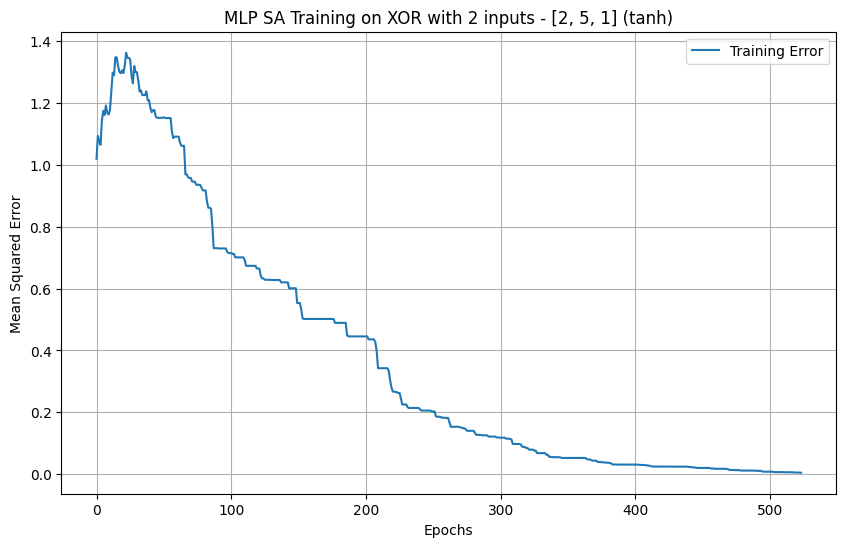

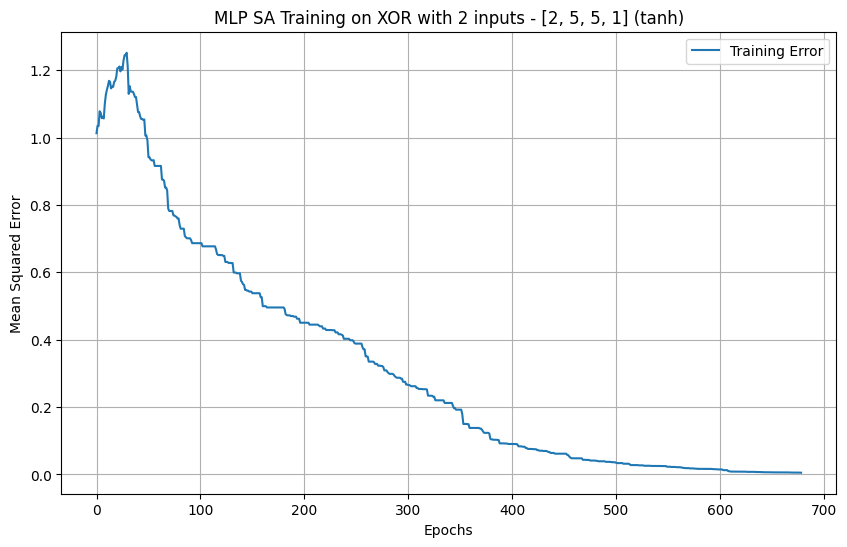

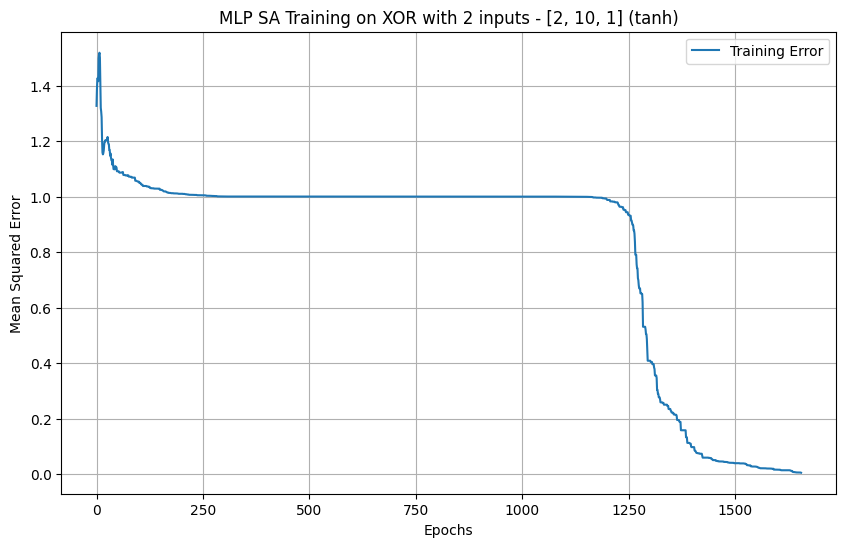

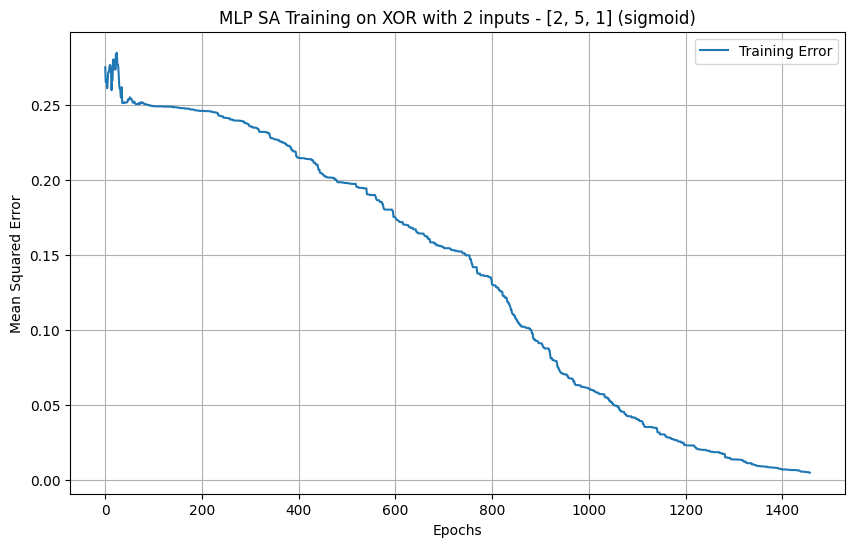

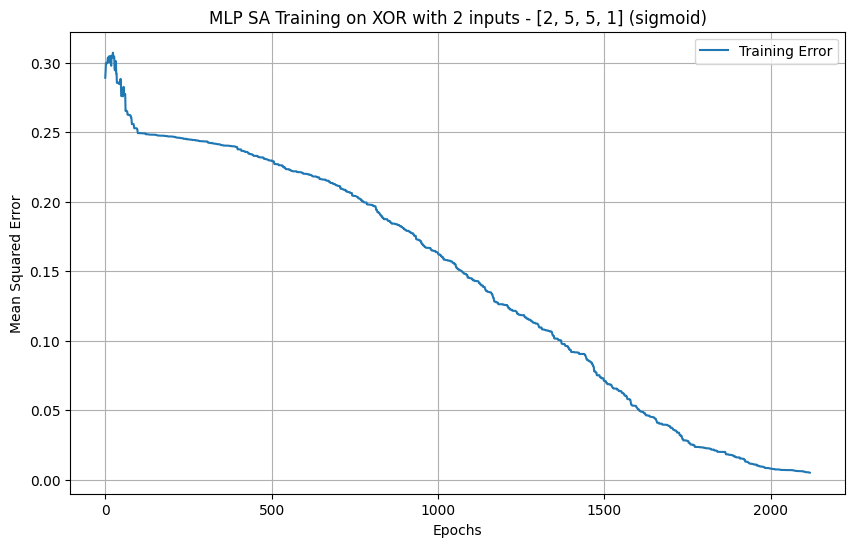

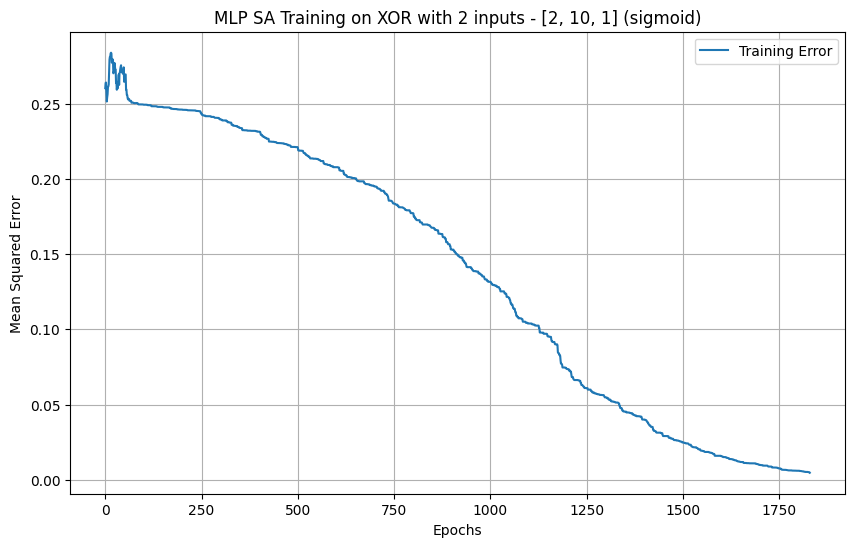

In [56]:
# MLP tanh for XOR with 2 inputs
MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP SA Training on XOR with 2 inputs - [2, 5, 1] (tanh)", sa=True)

MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 5, 5, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP SA Training on XOR with 2 inputs - [2, 5, 5, 1] (tanh)", sa=True)

MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 10, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP SA Training on XOR with 2 inputs - [2, 10, 1] (tanh)", sa=True)

# MLP sigmoid for XOR with 2 inputs
MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP SA Training on XOR with 2 inputs - [2, 5, 1] (sigmoid)", sa=True)

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP SA Training on XOR with 2 inputs - [2, 5, 5, 1] (sigmoid)", sa=True)

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 10, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP SA Training on XOR with 2 inputs - [2, 10, 1] (sigmoid)", sa=True)

&ensp; Así, se presentan los resultados obtenidos en la siguiente tabla:

<div align="center">

| **Arquitectura `layers_config`** | **Activación** | **Máx. epochs** | **Epochs utilizados** | **Error final** |
|:-------------------------------:|:--------------:|:---------------:|:----------------------:|:---------------:|
| [2, 5, 1]                       | tanh           | 10 000          |          524           |        0.0045        |
| [2, 5, 5, 1]                    | tanh           | 10 000          |         679            |        0.0050       |
| [2, 10, 1]                      | tanh           | 10 000          |         1 655            |       0.0048        |
| [2, 5, 1]                       | sigmoid        | 100 000         |         1 458            |       0.0050        |
| [2, 5, 5, 1]                    | sigmoid        | 100 000         |         2 118           |        0.0050        |
| [2, 10, 1]                      | sigmoid        | 100 000         |         1 830            |        0.0047        |

</div>

&ensp; Los resultados obtenidos con *Simulated Annealing* muestran una mejora clara frente al entrenamiento tradicional en *full batch*, ya que todas las arquitecturas evaluadas alcanzan errores del orden de $10^{-3}$–$10^{-2}$ en muchas menos iteraciones. Por ejemplo, configuraciones que con gradiente requerían miles o incluso decenas de miles de *epochs* (como el caso sigmoid con $12 894$ o $37 420$ iteraciones), bajo SA convergen en apenas unos cientos o pocos miles. Además, al observar las curvas de error, se aprecia claramente la naturaleza estocástica del método, ya que, el error no desciende de manera suave, sino que presenta subidas y bajadas debido a que el algoritmo puede aceptar soluciones peores con cierta probabilidad. Esta oscilación permite explorar mejor el espacio de pesos y evita quedar atrapado en mínimos locales, lo que explica por qué las arquitecturas logran soluciones válidas con mucho menor número de iteraciones que en el entrenamiento determinista por gradiente.

---
---

<div style="text-align: left;">
  <h3><b>Conclusiones</b></h3>
</div>

&ensp; A lo largo del trabajo se recorrió un conjunto variado de modelos neuronales: desde el perceptrón simple hasta los MLPs, las máquinas de Boltzmann restringidas (RBMs), los *autoencoders* y las redes convolucionales (CNNs). Aplicados a problemas distintos como: funciones lógicas, aproximación de funciones y clasificación de imágenes; estos modelos permitieron ver, en la práctica, cómo cambia la capacidad de aprendizaje cuando se pasa de estructuras lineales y básicas a arquitecturas más profundas y especializadas.

&ensp; En el caso del perceptrón simple, se comprobó que funciona bien cuando las clases pueden separarse linealmente, como en **AND** y **OR** de $2$ y $4$ entradas. Allí el modelo logra encontrar una frontera clara entre las categorías. Sin embargo, al aumentar la cantidad de patrones respecto del tamaño del problema, el rendimiento cae, dejando en evidencia su límite: solo puede manejar un número acotado de configuraciones antes de empezar a fallar.

&ensp; Con los perceptrones multicapa, la situación cambió de manera evidente. Problemas como **XOR**, imposibles para un perceptrón simple, pudieron resolverse sin dificultades gracias a la presencia de capas ocultas y funciones de activación no lineales. Además, se vio que las redes con activación $\tanh$ alcanzaron errores bajos en menos *epochs* que las que usaron *sigmoide*. Aun así, aumentar el tamaño de la red no siempre significó mejorar: en algunos casos solo hizo el entrenamiento más lento, reforzando la idea de que el diseño tiene que ser cuidadoso y no simplemente “más grande”.

&ensp; En la aproximación de funciones, los MLPs mostraron que pueden aprender relaciones más complejas, como $f(x,y,z)=\sin(x)+\cos(y)+z$, siempre que se entrene con datos suficientes. La comparación entre *full-batch*, *mini-batch* y *SGD* dejó claro que no existe un único esquema ideal: los lotes grandes dan una evolución más estable del error, mientras que los pequeños aceleran los cambios pero vuelven el proceso más irregular. En todos los casos, el modelo terminó convergiendo, aunque con ritmos diferentes.

&ensp; También se probó que existen métodos alternativos para entrenar redes, como *simulated annealing* y los algoritmos genéticos, aplicados nuevamente al problema **XOR**. Si bien pueden encontrar soluciones, requieren ajustes cuidadosos y son sensibles a la elección de parámetros como la temperatura o la tasa de actualización. Esto los vuelve más delicados y, en general, más aleatorios que el entrenamiento mediante *backpropagation*.

&ensp; En cuanto a las RBMs aplicadas a MNIST, se observó que el modelo es capaz de reconstruir dígitos y capturar la estructura general de los datos, aunque con ciertas limitaciones en los detalles finos dependiendo de los hiperparámetros. La reducción del error de reconstrucción a lo largo del entrenamiento mostró que la red aprendía progresivamente, pero también dejó claro que el costo computacional es mayor y que la calidad depende mucho de la cantidad de unidades ocultas y de la tasa de aprendizaje.

&ensp; Las CNNs, en cambio, se destacaron en la clasificación de imágenes: incluso con arquitecturas pequeñas lograron superar el $90\%$ de exactitud. Su capacidad para captar patrones locales las volvió más eficientes que los MLPs densos con un número similar de parámetros, mostrando por qué son una buena opción cuando se trabaja con datos visuales.

&ensp; Finalmente, los *autoencoders* permitieron comprimir las imágenes de MNIST en representaciones de menor dimensión y, aun así, entrenar clasificadores MLP efectivos. Al usar códigos de tamaño $16$, $32$ y $64$, la exactitud mejoró de aproximadamente $86\%$ a $88\%$, superando el $90\%$ en el caso de $64$ dimensiones. Esto demostró que una buena representación puede simplificar el modelo posterior y acelerar el entrenamiento sin perder rendimiento.

&ensp; En síntesis, el trabajo mostró un desarrollo claro: el perceptrón simple es útil pero limitado; los MLPs amplían notablemente lo que puede aprenderse; las RBMs y los *autoencoders* abren la puerta a representar y reconstruir información de manera más compacta; y las CNNs se consolidan como una opción eficiente para imágenes. Más allá de las diferencias, la conclusión general es que elegir la arquitectura correcta es clave para abordar cada problema y obtener resultados realmente sólidos.